# Parameter guide for fingerprinting
The user uploads their data and sets the target attribute.

Our process gives insights of:
- feature importance for the specified target
- robustness of a fingerprint per se (extraction rate)
- utility loss by change in mean and variance (todo: add more parameters)
- utility loss by loss in performance on ML classifiers 
- robustness against classical attacks 
for different gamma values 

In [1]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [2]:
import pickle

## 0. Upload the data 

In [3]:
data_path = "C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox/datasets/adult_full.csv"
target = ['income']

In [4]:
from parameter_guidelines.guidelines import *

In [5]:
# todo: get_full_insights <- this fingerprints the 100 datasets and compresses them later together with metadata

In [6]:
#get_insights(data=data_path, target=target, primary_key_attribute=primary_key)

## 1. Robustness

In [5]:
data = pd.read_csv('datasets/adult.csv', na_values='?')
# # to focus on real stuff, let's ignore missing values
data = data.dropna()

#data = Adult().preprocessed()

In [7]:
xi = 1
fplen = 32
numbuyers = 100
gammae = [1,2,3,4,5,6,10,12,15,18,20,25,30,35,40,50,60,70,80,100,200] # 35 40 50 60 70 80

In [8]:
# -------------------------------------------------#
            # ROBUSTNESS EVALUATION #
# ------------------------------------------------ #
def robustness_evaluation(attack, data, attack_string, gammae, attack_granularity=0.05, n_experiments=100, confidence_rate=0.9, 
                          target=None):
    try:
        target = data.get_target_attribute()
    except AttributeError:
        pass
    
    xi = 1
    fplen = 32
    numbuyers = 100
    
    if attack_string == 'vertical':
        file_string = 'robustness_{}_universal_c{}_e{}.pickle'.format(attack_string,
                                                                                format(confidence_rate,".2f")[-2:], 
                                                                                n_experiments)
    else:
        file_string = 'robustness_{}_universal_c{}_ag{}_e{}.pickle'.format(attack_string,
                                                                                    format(confidence_rate,".2f")[-2:], 
                                                                                    format(attack_granularity,".2f")[-2:], 
                                                                                    n_experiments)
    # check if results exist
    # ---------------------- #
    if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
        with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            resutls = pickle.load(infile)
    else:
        resutls = {}
    gammae_new = []
    for gamma in gammae:
        if gamma not in resutls.keys():
            gammae_new.append(gamma)
            print('Updating results with gamma={}'.format(gamma))
    # ---------------------- #

    for gamma in gammae_new:
        scheme = Universal(gamma=gamma, 
                            xi=xi, 
                            fingerprint_bit_length=fplen, 
                            number_of_recipients=numbuyers)
        # from how much remaining data can the fingerprint still be extracted?
        remaining = robustness(attack, scheme, exclude=[target], 
                                       attack_granularity=attack_granularity,
                                      n_experiments=n_experiments, 
                                      confidence_rate=confidence_rate)
        resutls[gamma] = remaining
    resutls =  dict(sorted(resutls.items()))
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(resutls, outfile)

In [10]:
# -------------------------------------------------#
            # ROBUSTNESS EVALUATION #
# ------------------------------------------------ #
def robustness_evaluation_fix(attack, data, attack_string, gammae, attack_granularity=0.05, n_experiments=100, confidence_rate=0.9, 
                          target=None):
    try:
        target = data.get_target_attribute()
    except AttributeError:
        pass
    
    xi = 1
    fplen = 32
    numbuyers = 100
    
    if attack_string == 'vertical':
        file_string = 'inverse_robustness_fix_{}_universal_c{}_e{}.pickle'.format(attack_string,
                                                                                format(confidence_rate,".2f")[-2:], 
                                                                                n_experiments)
    else:
        file_string = 'inverse_robustness_fix_{}_universal_c{}_ag{}_e{}.pickle'.format(attack_string,
                                                                                    format(confidence_rate,".2f")[-2:], 
                                                                                    format(attack_granularity,".2f")[-2:], 
                                                                                    n_experiments)
    # check if results exist
    # ---------------------- #
    if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
        with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            resutls = pickle.load(infile)
    else:
        resutls = {}
    gammae_new = []
    for gamma in gammae:
        if gamma not in resutls.keys():
            gammae_new.append(gamma)
            print('Updating results with gamma={}'.format(gamma))
    # ---------------------- #

    for gamma in gammae_new:
        scheme = Universal(gamma=gamma, 
                            xi=xi, 
                            fingerprint_bit_length=fplen, 
                            number_of_recipients=numbuyers)
        # from how much remaining data can the fingerprint still be extracted?
        remaining = inverse_robustness_fix(attack, scheme, exclude=[target], 
                                       attack_granularity=attack_granularity,
                                      n_experiments=n_experiments, 
                                      confidence_rate=confidence_rate)
        resutls[gamma] = remaining
    resutls =  dict(sorted(resutls.items()))
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(resutls, outfile)

### 1.1. Horizontal subset attack

In [8]:
attack = HorizontalSubsetAttack()

In [20]:
robustness_evaluation(attack, data, 'horizontal', [1,2,3,6,10,50], confidence_rate=0.70, n_experiments=2, target='income')

Updating results with gamma=1
Updating results with gamma=2
Updating results with gamma=3
Updating results with gamma=6
Updating results with gamma=10
Updating results with gamma=50
income
Subset attack runtime on 2261 out of 45222 entries: 0.0060040950775146484 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 83],
 [0, 77],
 [76, 0],
 [65, 0],
 [0, 69],
 [0, 52],
 [79, 0],
 [0, 57],
 [71, 0],
 [0, 70],
 [72, 0],
 [0, 64],
 [0, 86],
 [0, 68],
 [0, 68],
 [66, 0],
 [0, 74],
 [0, 80],
 [68, 0],
 [57, 0],
 [0, 86],
 [70, 0],
 [0, 64],
 [67, 0],
 [62, 0],
 [0, 73],
 [67, 0],
 [0, 69],
 [0, 68],
 [75, 0],
 [0, 71],
 [87, 0]]
Re

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


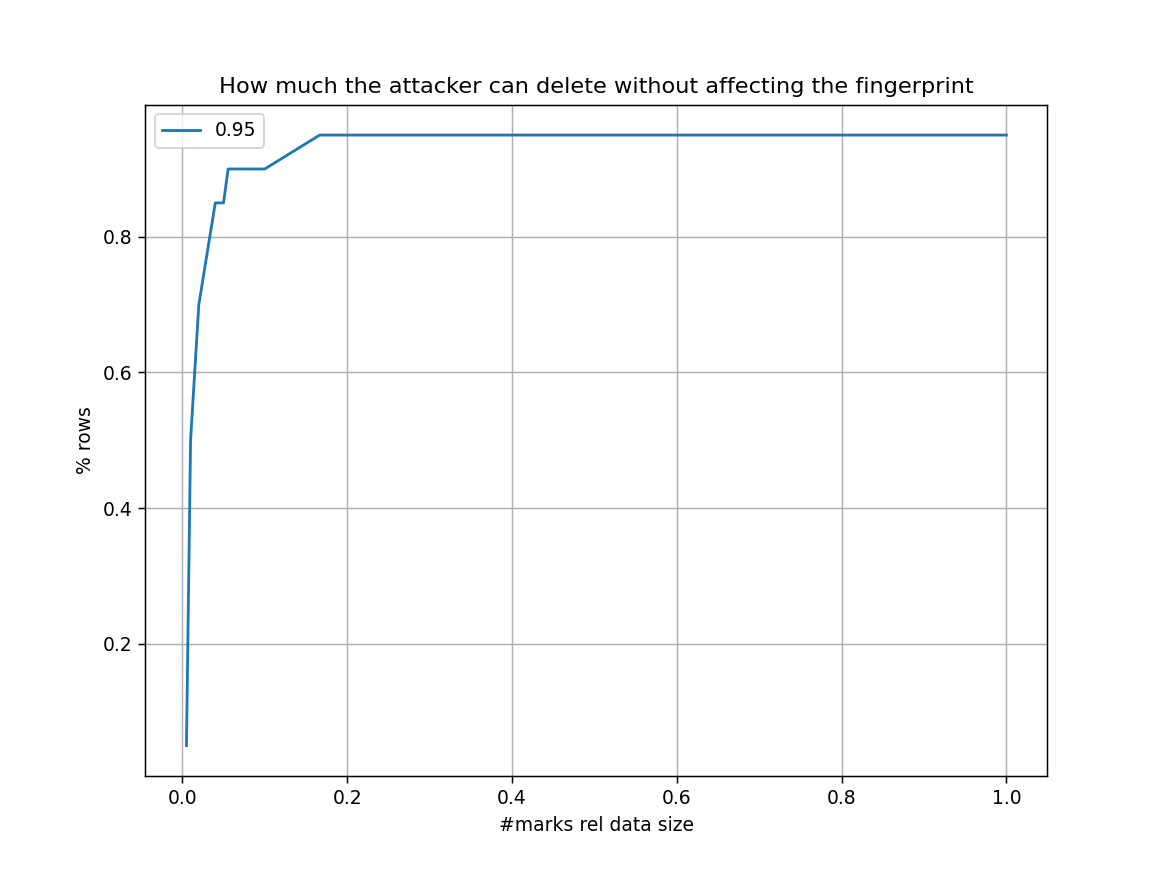

In [27]:
%matplotlib notebook
confidence_rates = [0.95] # [0.50, 0.95, 0.99]
attack_granularity = 0.05
n_experiments = 100
for confidence_rate in confidence_rates:
    file_string = 'inverse_robustness_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       format(attack_granularity,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

In [28]:
resutls

{1: 0.05,
 2: 0.05,
 3: 0.05,
 4: 0.05,
 5: 0.05,
 6: 0.05,
 10: 0.1,
 12: 0.1,
 15: 0.1,
 18: 0.1,
 20: 0.15,
 25: 0.15,
 30: 0.2,
 50: 0.3,
 100: 0.5,
 200: 0.95}

In [21]:
robustness_evaluation_fix(attack, data, 'horizontal', [1,2,3,6,12,50], confidence_rate=0.95, target='income')

Updating results with gamma=1
Updating results with gamma=2
Updating results with gamma=3
Updating results with gamma=6
Updating results with gamma=12
Updating results with gamma=50
Subset attack runtime on 2261 out of 45222 entries: 0.008042097091674805 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 83],
 [0, 77],
 [76, 0],
 [65, 0],
 [0, 69],
 [0, 52],
 [79, 0],
 [0, 57],
 [71, 0],
 [0, 70],
 [72, 0],
 [0, 64],
 [0, 86],
 [0, 68],
 [0, 68],
 [66, 0],
 [0, 74],
 [0, 80],
 [68, 0],
 [57, 0],
 [0, 86],
 [70, 0],
 [0, 64],
 [67, 0],
 [62, 0],
 [0, 73],
 [67, 0],
 [0, 69],
 [0, 68],
 [75, 0],
 [0, 71],
 [87, 0]]
Recipient 

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 68],
 [48, 0],
 [0, 71],
 [0, 71],
 [70, 0],
 [0, 67],
 [0, 85],
 [72, 0],
 [0, 63],
 [0, 68],
 [0, 75],
 [61, 0],
 [0, 87],
 [0, 69],
 [67, 0],
 [0, 85],
 [0, 85],
 [0, 56],
 [0, 66],
 [67, 0],
 [82, 0],
 [0, 56],
 [62, 0],
 [0, 70],
 [64, 0],
 [0, 67],
 [0, 71],
 [0, 91],
 [0, 72],
 [82, 0],
 [77, 0],
 [66, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005384683609008789 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 66],
 [68, 0],
 [0, 71],
 [63, 0],
 [0, 75],
 [69, 0],
 [0, 67],
 [0, 52

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[71, 0],
 [0, 74],
 [74, 0],
 [0, 71],
 [0, 68],
 [0, 61],
 [80, 0],
 [0, 73],
 [0, 80],
 [0, 66],
 [74, 0],
 [75, 0],
 [0, 81],
 [78, 0],
 [69, 0],
 [0, 59],
 [0, 65],
 [64, 0],
 [87, 0],
 [0, 70],
 [70, 0],
 [68, 0],
 [0, 79],
 [72, 0],
 [71, 0],
 [65, 0],
 [56, 0],
 [0, 67],
 [62, 0],
 [61, 0],
 [0, 76],
 [0, 74]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005997657775878906 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 59],
 [0, 58],
 [0, 80],
 [61, 0],
 [0, 73],
 [64, 0],
 [82, 0],
 [0, 65

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[77, 0],
 [59, 0],
 [0, 72],
 [70, 0],
 [74, 0],
 [79, 0],
 [66, 0],
 [0, 64],
 [0, 73],
 [0, 53],
 [66, 0],
 [0, 70],
 [0, 73],
 [0, 78],
 [0, 70],
 [0, 64],
 [74, 0],
 [0, 77],
 [0, 74],
 [63, 0],
 [0, 48],
 [75, 0],
 [0, 80],
 [0, 75],
 [0, 73],
 [82, 0],
 [75, 0],
 [0, 72],
 [0, 60],
 [73, 0],
 [80, 0],
 [0, 72]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006116151809692383 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 74],
 [66, 0],
 [61, 0],
 [0, 74],
 [63, 0],
 [0, 70],
 [0, 75],
 [0, 71

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 72],
 [67, 0],
 [0, 85],
 [70, 0],
 [61, 0],
 [75, 0],
 [0, 68],
 [78, 0],
 [0, 69],
 [0, 79],
 [69, 0],
 [0, 67],
 [0, 75],
 [57, 0],
 [69, 0],
 [0, 67],
 [0, 67],
 [65, 0],
 [72, 0],
 [83, 0],
 [0, 63],
 [59, 0],
 [0, 77],
 [0, 70],
 [0, 82],
 [65, 0],
 [84, 0],
 [0, 70],
 [66, 0],
 [0, 74],
 [67, 0],
 [69, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.010648012161254883 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 71],
 [0, 74],
 [83, 0],
 [78, 0],
 [0, 62],
 [0, 70],
 [0, 65],
 [71, 0

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[6, 56],
 [5, 64],
 [64, 7],
 [2, 62],
 [64, 2],
 [77, 9],
 [4, 71],
 [63, 9],
 [78, 6],
 [65, 7],
 [4, 58],
 [72, 5],
 [7, 60],
 [7, 69],
 [56, 2],
 [79, 1],
 [61, 5],
 [53, 2],
 [7, 66],
 [60, 1],
 [51, 9],
 [63, 1],
 [86, 6],
 [58, 2],
 [77, 2],
 [67, 7],
 [66, 6],
 [70, 5],
 [3, 63],
 [69, 5],
 [79, 5],
 [61, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006062507629394531 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 79],
 [0, 85],
 [65, 0],
 [67, 0],
 [0, 78],
 [0, 66],
 [0, 71],
 [0, 65

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[71, 0],
 [84, 0],
 [0, 55],
 [64, 0],
 [70, 0],
 [0, 62],
 [0, 66],
 [70, 0],
 [77, 0],
 [0, 75],
 [63, 0],
 [0, 86],
 [79, 0],
 [0, 72],
 [89, 0],
 [0, 66],
 [54, 0],
 [0, 70],
 [68, 0],
 [0, 68],
 [0, 60],
 [0, 75],
 [0, 77],
 [0, 74],
 [68, 0],
 [0, 69],
 [0, 59],
 [82, 0],
 [67, 0],
 [90, 0],
 [0, 66],
 [0, 65]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006005048751831055 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 71],
 [0, 68],
 [84, 0],
 [79, 0],
 [70, 0],
 [74, 0],
 [0, 65],
 [0, 80

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 61],
 [77, 0],
 [0, 62],
 [0, 81],
 [0, 80],
 [65, 0],
 [0, 77],
 [0, 72],
 [74, 0],
 [0, 61],
 [59, 0],
 [86, 0],
 [0, 56],
 [65, 0],
 [87, 0],
 [0, 64],
 [58, 0],
 [0, 64],
 [61, 0],
 [0, 78],
 [0, 68],
 [0, 62],
 [0, 82],
 [79, 0],
 [79, 0],
 [0, 84],
 [65, 0],
 [70, 0],
 [0, 59],
 [0, 68],
 [0, 83],
 [74, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005627870559692383 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[81, 0],
 [74, 0],
 [0, 70],
 [0, 72],
 [0, 64],
 [0, 61],
 [74, 0],
 [61, 0

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 64],
 [0, 84],
 [69, 0],
 [79, 0],
 [0, 73],
 [71, 0],
 [0, 78],
 [0, 80],
 [0, 73],
 [0, 73],
 [0, 71],
 [63, 0],
 [0, 72],
 [0, 71],
 [77, 0],
 [0, 72],
 [57, 0],
 [0, 80],
 [0, 72],
 [69, 0],
 [82, 0],
 [0, 77],
 [0, 75],
 [0, 70],
 [68, 0],
 [65, 0],
 [64, 0],
 [0, 58],
 [65, 0],
 [0, 68],
 [62, 0],
 [59, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006941556930541992 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[57, 2],
 [64, 2],
 [2, 70],
 [93, 2],
 [67, 2],
 [2, 65],
 [2, 77],
 [80, 2

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[78, 0],
 [83, 0],
 [0, 73],
 [59, 0],
 [0, 78],
 [66, 0],
 [0, 84],
 [67, 0],
 [0, 79],
 [0, 66],
 [63, 0],
 [73, 0],
 [79, 0],
 [0, 63],
 [63, 0],
 [0, 64],
 [61, 0],
 [69, 0],
 [0, 67],
 [0, 61],
 [0, 75],
 [0, 73],
 [0, 92],
 [59, 0],
 [57, 0],
 [75, 0],
 [0, 78],
 [0, 92],
 [0, 63],
 [76, 0],
 [73, 0],
 [52, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009034156799316406 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[72, 1],
 [1, 79],
 [74, 0],
 [0, 51],
 [60, 0],
 [66, 3],
 [1, 78],
 [1, 72

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 54],
 [63, 0],
 [0, 70],
 [72, 0],
 [71, 0],
 [76, 0],
 [93, 0],
 [0, 62],
 [75, 0],
 [68, 0],
 [67, 0],
 [73, 0],
 [0, 75],
 [75, 0],
 [0, 72],
 [88, 0],
 [0, 86],
 [0, 67],
 [0, 68],
 [73, 0],
 [61, 0],
 [69, 0],
 [0, 73],
 [65, 0],
 [71, 0],
 [0, 77],
 [68, 0],
 [0, 70],
 [0, 58],
 [0, 72],
 [66, 0],
 [63, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005982160568237305 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 43],
 [0, 47],
 [38, 0],
 [36, 0],
 [0, 37],
 [0, 24],
 [42, 0],
 [0, 29

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 36],
 [27, 0],
 [0, 37],
 [0, 28],
 [42, 0],
 [1, 30],
 [2, 53],
 [33, 4],
 [0, 30],
 [1, 34],
 [0, 43],
 [34, 1],
 [0, 30],
 [0, 35],
 [29, 0],
 [1, 40],
 [0, 35],
 [0, 24],
 [1, 31],
 [36, 0],
 [43, 1],
 [1, 32],
 [30, 0],
 [2, 39],
 [24, 0],
 [3, 32],
 [3, 31],
 [0, 50],
 [3, 36],
 [43, 1],
 [37, 0],
 [35, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006612062454223633 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[3, 36],
 [32, 3],
 [1, 29],
 [29, 1],
 [1, 33],
 [34, 1],
 [0, 39],
 [3, 20

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[42, 0],
 [0, 36],
 [46, 0],
 [0, 30],
 [0, 31],
 [0, 36],
 [42, 0],
 [0, 32],
 [0, 30],
 [0, 25],
 [41, 0],
 [35, 0],
 [0, 43],
 [38, 0],
 [33, 0],
 [0, 27],
 [0, 33],
 [39, 0],
 [48, 0],
 [0, 41],
 [34, 0],
 [39, 0],
 [0, 39],
 [39, 0],
 [38, 0],
 [28, 0],
 [31, 0],
 [0, 34],
 [30, 0],
 [31, 0],
 [0, 37],
 [0, 29]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.010931968688964844 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 29],
 [2, 27],
 [0, 39],
 [27, 1],
 [0, 36],
 [29, 0],
 [38, 1],
 [1, 24

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[31, 0],
 [26, 0],
 [0, 32],
 [34, 0],
 [39, 0],
 [44, 0],
 [30, 0],
 [0, 35],
 [0, 34],
 [0, 28],
 [29, 0],
 [0, 37],
 [0, 37],
 [0, 42],
 [0, 34],
 [0, 30],
 [35, 0],
 [0, 47],
 [0, 35],
 [34, 0],
 [0, 18],
 [30, 0],
 [0, 41],
 [0, 25],
 [0, 31],
 [43, 0],
 [43, 0],
 [0, 38],
 [0, 32],
 [34, 0],
 [51, 0],
 [0, 38]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007842540740966797 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[3, 29],
 [29, 3],
 [24, 2],
 [1, 31],
 [29, 5],
 [1, 36],
 [1, 37],
 [6, 34

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[2, 34],
 [26, 3],
 [1, 48],
 [36, 2],
 [24, 1],
 [34, 0],
 [1, 32],
 [43, 1],
 [2, 28],
 [4, 37],
 [32, 2],
 [2, 33],
 [1, 34],
 [29, 2],
 [44, 2],
 [2, 25],
 [1, 33],
 [33, 1],
 [39, 2],
 [41, 1],
 [2, 31],
 [33, 0],
 [1, 36],
 [2, 34],
 [4, 40],
 [31, 2],
 [47, 0],
 [2, 33],
 [27, 0],
 [2, 38],
 [41, 3],
 [38, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00669407844543457 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[2, 36],
 [0, 33],
 [43, 2],
 [43, 1],
 [1, 34],
 [0, 39],
 [1, 32],
 [33, 0]

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[3, 26],
 [1, 29],
 [33, 5],
 [0, 33],
 [36, 2],
 [33, 4],
 [3, 42],
 [31, 5],
 [35, 2],
 [35, 5],
 [1, 31],
 [31, 4],
 [3, 32],
 [4, 32],
 [21, 1],
 [42, 1],
 [33, 1],
 [29, 1],
 [3, 32],
 [25, 0],
 [19, 4],
 [34, 1],
 [45, 4],
 [36, 2],
 [43, 2],
 [33, 2],
 [32, 3],
 [37, 2],
 [2, 33],
 [32, 3],
 [45, 3],
 [27, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006016969680786133 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 33],
 [0, 40],
 [38, 0],
 [33, 0],
 [0, 44],
 [0, 36],
 [0, 40],
 [0, 34

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[41, 0],
 [44, 0],
 [0, 31],
 [35, 0],
 [39, 0],
 [0, 31],
 [0, 31],
 [35, 0],
 [40, 0],
 [0, 35],
 [27, 0],
 [0, 33],
 [43, 0],
 [0, 35],
 [39, 0],
 [0, 26],
 [30, 0],
 [0, 26],
 [34, 0],
 [0, 32],
 [0, 40],
 [0, 37],
 [0, 34],
 [0, 39],
 [33, 0],
 [0, 37],
 [0, 28],
 [40, 0],
 [32, 0],
 [46, 0],
 [0, 28],
 [0, 30]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006994724273681641 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 29],
 [2, 36],
 [47, 2],
 [38, 2],
 [37, 0],
 [38, 1],
 [0, 36],
 [0, 41

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[2, 27],
 [41, 1],
 [1, 31],
 [2, 39],
 [0, 36],
 [34, 1],
 [1, 34],
 [0, 39],
 [46, 0],
 [2, 34],
 [27, 0],
 [42, 2],
 [1, 27],
 [35, 0],
 [32, 1],
 [1, 27],
 [25, 1],
 [1, 39],
 [29, 2],
 [1, 42],
 [0, 30],
 [0, 28],
 [0, 34],
 [48, 1],
 [36, 0],
 [2, 37],
 [30, 0],
 [39, 2],
 [0, 26],
 [0, 37],
 [0, 37],
 [34, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0040090084075927734 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[43, 0],
 [30, 0],
 [0, 41],
 [0, 44],
 [0, 39],
 [0, 30],
 [45, 0],
 [29, 

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 29],
 [0, 38],
 [34, 0],
 [42, 3],
 [0, 30],
 [32, 0],
 [1, 42],
 [0, 39],
 [3, 32],
 [0, 37],
 [1, 42],
 [28, 1],
 [1, 33],
 [0, 33],
 [45, 1],
 [1, 28],
 [26, 0],
 [1, 32],
 [1, 35],
 [30, 1],
 [37, 0],
 [1, 43],
 [1, 38],
 [2, 33],
 [37, 1],
 [34, 1],
 [34, 1],
 [1, 31],
 [31, 0],
 [0, 36],
 [28, 0],
 [28, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.011008024215698242 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[35, 0],
 [37, 0],
 [0, 29],
 [50, 0],
 [42, 0],
 [0, 32],
 [0, 33],
 [41, 0

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[45, 4],
 [35, 1],
 [4, 33],
 [28, 4],
 [3, 32],
 [32, 3],
 [3, 37],
 [38, 1],
 [2, 32],
 [0, 28],
 [25, 2],
 [30, 1],
 [39, 4],
 [1, 31],
 [32, 2],
 [2, 31],
 [29, 2],
 [30, 5],
 [2, 33],
 [1, 26],
 [6, 33],
 [3, 29],
 [3, 50],
 [32, 2],
 [25, 3],
 [37, 1],
 [2, 32],
 [3, 49],
 [1, 29],
 [35, 3],
 [24, 0],
 [26, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0060155391693115234 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[35, 1],
 [0, 37],
 [33, 0],
 [0, 21],
 [32, 0],
 [32, 1],
 [1, 39],
 [1, 3

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 23],
 [28, 0],
 [1, 35],
 [38, 1],
 [37, 0],
 [35, 1],
 [36, 2],
 [0, 31],
 [35, 0],
 [33, 0],
 [35, 1],
 [45, 1],
 [3, 37],
 [35, 1],
 [1, 40],
 [43, 2],
 [0, 43],
 [1, 44],
 [0, 33],
 [35, 1],
 [34, 0],
 [34, 0],
 [0, 35],
 [29, 1],
 [30, 0],
 [2, 33],
 [35, 1],
 [0, 34],
 [0, 28],
 [2, 32],
 [24, 2],
 [34, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009341955184936523 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 22],
 [0, 35],
 [26, 0],
 [20, 0],
 [0, 15],
 [0, 12],
 [28, 0],
 [0, 20

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 27],
 [11, 0],
 [0, 21],
 [0, 27],
 [29, 0],
 [0, 19],
 [0, 34],
 [23, 0],
 [0, 19],
 [0, 23],
 [0, 18],
 [20, 0],
 [0, 33],
 [0, 21],
 [25, 0],
 [0, 27],
 [0, 30],
 [0, 13],
 [0, 20],
 [21, 0],
 [24, 0],
 [0, 23],
 [24, 0],
 [0, 23],
 [22, 0],
 [0, 14],
 [0, 26],
 [0, 39],
 [0, 29],
 [25, 0],
 [24, 0],
 [22, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005944490432739258 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[1, 27],
 [25, 0],
 [0, 24],
 [22, 0],
 [1, 20],
 [18, 0],
 [0, 18],
 [1, 16

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[21, 0],
 [0, 27],
 [23, 0],
 [0, 22],
 [0, 21],
 [0, 19],
 [22, 0],
 [1, 28],
 [0, 37],
 [0, 26],
 [23, 0],
 [18, 0],
 [0, 30],
 [29, 0],
 [23, 0],
 [0, 20],
 [0, 17],
 [30, 1],
 [32, 1],
 [0, 21],
 [29, 1],
 [22, 0],
 [0, 21],
 [29, 1],
 [33, 0],
 [25, 0],
 [15, 0],
 [0, 24],
 [26, 0],
 [19, 0],
 [1, 25],
 [0, 22]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00701141357421875 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 18],
 [0, 21],
 [0, 30],
 [22, 0],
 [0, 31],
 [23, 0],
 [24, 0],
 [0, 21]

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[25, 1],
 [19, 1],
 [0, 22],
 [21, 1],
 [30, 0],
 [22, 2],
 [24, 0],
 [1, 21],
 [0, 17],
 [0, 23],
 [18, 1],
 [1, 24],
 [0, 28],
 [0, 28],
 [0, 23],
 [1, 15],
 [26, 0],
 [0, 23],
 [0, 26],
 [23, 0],
 [0, 14],
 [23, 0],
 [1, 22],
 [0, 32],
 [1, 22],
 [22, 0],
 [29, 0],
 [0, 24],
 [0, 23],
 [24, 0],
 [27, 0],
 [1, 22]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0050046443939208984 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[1, 23],
 [21, 0],
 [22, 0],
 [0, 29],
 [20, 0],
 [0, 19],
 [0, 31],
 [0, 2

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 29],
 [18, 0],
 [0, 26],
 [20, 0],
 [19, 0],
 [31, 0],
 [0, 19],
 [21, 0],
 [0, 31],
 [0, 20],
 [22, 0],
 [0, 17],
 [0, 23],
 [23, 0],
 [26, 0],
 [0, 21],
 [0, 30],
 [23, 0],
 [21, 0],
 [23, 0],
 [0, 20],
 [27, 0],
 [0, 25],
 [0, 17],
 [0, 35],
 [28, 0],
 [34, 0],
 [0, 18],
 [17, 0],
 [0, 30],
 [19, 0],
 [24, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.012113571166992188 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[2, 22],
 [1, 21],
 [26, 0],
 [26, 0],
 [0, 20],
 [1, 19],
 [2, 18],
 [20, 0

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 23],
 [0, 19],
 [22, 1],
 [0, 16],
 [19, 0],
 [28, 2],
 [0, 25],
 [25, 2],
 [33, 0],
 [22, 1],
 [2, 16],
 [26, 0],
 [0, 20],
 [2, 27],
 [27, 0],
 [30, 0],
 [14, 2],
 [23, 0],
 [1, 24],
 [21, 0],
 [13, 0],
 [19, 0],
 [30, 0],
 [21, 1],
 [22, 1],
 [24, 1],
 [25, 1],
 [22, 1],
 [0, 24],
 [17, 1],
 [33, 0],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006004810333251953 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 33],
 [0, 26],
 [28, 1],
 [20, 0],
 [0, 28],
 [0, 22],
 [0, 26],
 [0, 22

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[21, 4],
 [29, 0],
 [1, 18],
 [14, 3],
 [27, 1],
 [2, 21],
 [2, 26],
 [17, 0],
 [21, 2],
 [2, 19],
 [16, 1],
 [0, 38],
 [25, 3],
 [2, 17],
 [29, 2],
 [3, 24],
 [20, 0],
 [0, 25],
 [21, 1],
 [1, 20],
 [1, 25],
 [2, 22],
 [1, 25],
 [1, 19],
 [26, 1],
 [3, 20],
 [1, 19],
 [27, 1],
 [22, 3],
 [32, 3],
 [2, 17],
 [0, 23]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00994563102722168 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[2, 17],
 [1, 23],
 [23, 1],
 [30, 0],
 [25, 1],
 [35, 0],
 [0, 28],
 [2, 28]

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 20],
 [20, 0],
 [2, 19],
 [0, 38],
 [2, 27],
 [23, 1],
 [0, 20],
 [1, 23],
 [31, 0],
 [1, 18],
 [20, 0],
 [25, 0],
 [0, 18],
 [17, 0],
 [33, 1],
 [0, 21],
 [12, 0],
 [0, 26],
 [23, 2],
 [0, 21],
 [1, 26],
 [1, 24],
 [1, 31],
 [22, 0],
 [28, 0],
 [1, 36],
 [26, 0],
 [17, 1],
 [0, 22],
 [2, 33],
 [0, 34],
 [26, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006095409393310547 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[23, 0],
 [28, 0],
 [0, 28],
 [0, 33],
 [0, 21],
 [0, 20],
 [21, 0],
 [16, 0

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 26],
 [0, 22],
 [21, 2],
 [23, 4],
 [1, 21],
 [26, 1],
 [1, 23],
 [0, 28],
 [2, 23],
 [0, 25],
 [3, 21],
 [18, 2],
 [2, 19],
 [2, 23],
 [28, 2],
 [4, 25],
 [18, 0],
 [2, 22],
 [1, 23],
 [20, 3],
 [28, 1],
 [5, 16],
 [0, 20],
 [1, 24],
 [17, 2],
 [17, 2],
 [20, 2],
 [0, 14],
 [16, 0],
 [0, 21],
 [19, 2],
 [13, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005988359451293945 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[23, 1],
 [15, 2],
 [1, 21],
 [29, 0],
 [18, 1],
 [1, 30],
 [1, 32],
 [30, 2

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[30, 0],
 [35, 0],
 [0, 29],
 [22, 0],
 [0, 25],
 [21, 0],
 [0, 24],
 [19, 0],
 [0, 20],
 [0, 29],
 [20, 0],
 [27, 0],
 [27, 0],
 [0, 22],
 [22, 0],
 [0, 17],
 [19, 0],
 [21, 0],
 [0, 25],
 [0, 11],
 [0, 30],
 [0, 27],
 [0, 32],
 [18, 0],
 [15, 0],
 [29, 0],
 [0, 26],
 [0, 31],
 [0, 18],
 [34, 0],
 [22, 0],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005915641784667969 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[14, 3],
 [3, 25],
 [21, 2],
 [0, 17],
 [22, 0],
 [15, 2],
 [1, 20],
 [0, 25

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 18],
 [20, 1],
 [0, 23],
 [17, 1],
 [21, 0],
 [28, 0],
 [28, 1],
 [0, 17],
 [23, 0],
 [19, 0],
 [22, 0],
 [24, 2],
 [0, 18],
 [24, 0],
 [0, 28],
 [27, 1],
 [0, 27],
 [1, 17],
 [0, 31],
 [19, 1],
 [17, 1],
 [23, 2],
 [1, 23],
 [29, 0],
 [23, 0],
 [0, 21],
 [27, 1],
 [0, 23],
 [0, 23],
 [0, 28],
 [25, 0],
 [19, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008200645446777344 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 13],
 [0, 25],
 [11, 0],
 [8, 0],
 [0, 6],
 [0, 4],
 [16, 0],
 [0, 11],


Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 16],
 [5, 0],
 [0, 13],
 [0, 9],
 [14, 1],
 [0, 9],
 [2, 18],
 [9, 2],
 [0, 11],
 [0, 10],
 [1, 12],
 [11, 0],
 [0, 11],
 [0, 8],
 [11, 0],
 [0, 9],
 [0, 12],
 [0, 5],
 [1, 13],
 [10, 0],
 [12, 0],
 [0, 17],
 [11, 1],
 [2, 10],
 [7, 1],
 [1, 6],
 [0, 11],
 [0, 20],
 [2, 18],
 [10, 1],
 [10, 2],
 [12, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008038997650146484 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[2, 12],
 [14, 1],
 [0, 9],
 [9, 1],
 [2, 7],
 [5, 1],
 [0, 8],
 [1, 4],
 [11, 0],
 [

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[12, 0],
 [0, 14],
 [11, 0],
 [1, 10],
 [0, 7],
 [0, 10],
 [9, 0],
 [0, 14],
 [0, 13],
 [0, 10],
 [16, 1],
 [8, 0],
 [0, 17],
 [14, 0],
 [12, 0],
 [0, 9],
 [0, 8],
 [19, 1],
 [16, 0],
 [0, 15],
 [17, 0],
 [13, 0],
 [1, 10],
 [16, 0],
 [18, 2],
 [8, 0],
 [10, 0],
 [1, 13],
 [14, 0],
 [6, 0],
 [0, 12],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006008625030517578 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 5],
 [0, 8],
 [1, 12],
 [11, 0],
 [2, 12],
 [12, 0],
 [14, 1],
 [0, 5],
 [11, 0]

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[7, 0],
 [10, 0],
 [1, 9],
 [6, 1],
 [18, 0],
 [12, 0],
 [11, 0],
 [0, 12],
 [0, 7],
 [0, 13],
 [6, 0],
 [0, 12],
 [0, 15],
 [0, 17],
 [1, 5],
 [1, 4],
 [15, 0],
 [0, 16],
 [0, 11],
 [11, 0],
 [0, 4],
 [11, 0],
 [1, 13],
 [0, 13],
 [0, 12],
 [11, 0],
 [15, 0],
 [1, 15],
 [0, 11],
 [10, 0],
 [20, 0],
 [1, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00800466537475586 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 13],
 [10, 0],
 [10, 0],
 [0, 15],
 [13, 1],
 [0, 11],
 [0, 22],
 [1, 15],
 [10, 

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 13],
 [7, 0],
 [0, 13],
 [11, 0],
 [5, 0],
 [13, 0],
 [0, 9],
 [8, 0],
 [2, 13],
 [1, 7],
 [11, 0],
 [1, 7],
 [0, 9],
 [13, 1],
 [15, 0],
 [1, 8],
 [1, 15],
 [10, 0],
 [16, 0],
 [14, 0],
 [1, 8],
 [16, 0],
 [0, 10],
 [1, 7],
 [2, 18],
 [13, 0],
 [21, 0],
 [0, 12],
 [7, 0],
 [2, 18],
 [10, 1],
 [13, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005997419357299805 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 12],
 [0, 10],
 [14, 0],
 [16, 0],
 [2, 11],
 [0, 8],
 [2, 9],
 [10, 0],
 [9, 1],
 

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 9],
 [0, 12],
 [11, 0],
 [0, 6],
 [10, 1],
 [12, 1],
 [0, 14],
 [14, 0],
 [12, 0],
 [6, 1],
 [1, 9],
 [15, 0],
 [0, 11],
 [1, 14],
 [11, 0],
 [18, 0],
 [7, 0],
 [12, 0],
 [0, 12],
 [10, 0],
 [6, 0],
 [10, 0],
 [17, 0],
 [12, 0],
 [11, 0],
 [8, 0],
 [12, 0],
 [12, 0],
 [0, 11],
 [11, 0],
 [15, 1],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009996891021728516 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[2, 11],
 [0, 6],
 [21, 1],
 [8, 0],
 [2, 15],
 [0, 14],
 [0, 14],
 [1, 11],
 [0, 1

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[12, 0],
 [17, 1],
 [0, 8],
 [9, 1],
 [14, 1],
 [1, 9],
 [2, 12],
 [7, 1],
 [12, 1],
 [1, 7],
 [6, 0],
 [0, 9],
 [16, 0],
 [1, 9],
 [12, 0],
 [2, 7],
 [11, 1],
 [1, 7],
 [10, 1],
 [0, 10],
 [2, 17],
 [0, 12],
 [1, 11],
 [0, 12],
 [9, 2],
 [0, 8],
 [2, 9],
 [12, 3],
 [11, 5],
 [16, 2],
 [0, 7],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0057735443115234375 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 7],
 [0, 14],
 [13, 1],
 [15, 1],
 [13, 0],
 [22, 0],
 [1, 15],
 [3, 12],
 [12, 0],
 [

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 9],
 [10, 0],
 [0, 9],
 [0, 21],
 [1, 15],
 [17, 0],
 [0, 10],
 [0, 14],
 [25, 0],
 [1, 12],
 [11, 0],
 [10, 0],
 [1, 8],
 [7, 0],
 [15, 0],
 [0, 10],
 [4, 0],
 [0, 14],
 [13, 0],
 [1, 12],
 [0, 10],
 [0, 11],
 [0, 15],
 [16, 0],
 [13, 0],
 [0, 15],
 [10, 0],
 [10, 0],
 [0, 9],
 [2, 18],
 [0, 12],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005999565124511719 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100102011111110
Counts:
[[11, 1],
 [10, 1],
 [3, 12],
 [2, 16],
 [2, 9],
 [1, 11],
 [9, 1],
 [7, 1],
 [3, 9

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 12],
 [0, 10],
 [11, 0],
 [9, 3],
 [0, 10],
 [11, 0],
 [0, 13],
 [0, 12],
 [1, 10],
 [0, 13],
 [1, 15],
 [11, 1],
 [0, 10],
 [0, 13],
 [16, 2],
 [1, 12],
 [10, 0],
 [1, 8],
 [0, 13],
 [9, 0],
 [14, 0],
 [1, 10],
 [0, 10],
 [0, 15],
 [8, 1],
 [13, 1],
 [10, 0],
 [0, 7],
 [8, 0],
 [0, 11],
 [8, 1],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.015994787216186523 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[19, 1],
 [10, 2],
 [1, 9],
 [12, 0],
 [11, 1],
 [0, 15],
 [1, 9],
 [17, 1],
 [17, 0

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[15, 1],
 [15, 1],
 [3, 14],
 [12, 0],
 [1, 9],
 [8, 0],
 [1, 10],
 [8, 1],
 [1, 8],
 [0, 9],
 [7, 2],
 [10, 0],
 [17, 2],
 [0, 13],
 [14, 1],
 [1, 8],
 [7, 2],
 [9, 2],
 [1, 11],
 [0, 5],
 [2, 15],
 [1, 10],
 [2, 18],
 [11, 1],
 [8, 1],
 [16, 0],
 [0, 9],
 [0, 19],
 [0, 10],
 [15, 2],
 [8, 0],
 [6, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005015134811401367 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[9, 1],
 [2, 10],
 [9, 1],
 [0, 7],
 [16, 0],
 [9, 2],
 [1, 9],
 [0, 14],
 [0, 8],
 [1, 12

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 10],
 [9, 0],
 [0, 14],
 [10, 0],
 [10, 0],
 [13, 0],
 [12, 0],
 [0, 8],
 [11, 0],
 [13, 0],
 [12, 0],
 [17, 0],
 [0, 10],
 [12, 0],
 [0, 16],
 [12, 0],
 [0, 15],
 [0, 14],
 [0, 12],
 [7, 0],
 [10, 0],
 [11, 0],
 [0, 10],
 [14, 0],
 [11, 0],
 [0, 11],
 [14, 1],
 [0, 12],
 [0, 12],
 [0, 12],
 [10, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007110595703125 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11002201010111101100101001011010
Counts:
[[1, 7],
 [0, 13],
 [5, 0],
 [2, 0],
 [1, 1],
 [1, 1],
 [7, 1],
 [2, 3],
 [6, 1],
 

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 8],
 [5, 0],
 [0, 7],
 [0, 2],
 [8, 1],
 [0, 6],
 [1, 14],
 [6, 0],
 [0, 5],
 [0, 4],
 [0, 5],
 [5, 0],
 [0, 7],
 [0, 5],
 [5, 0],
 [0, 3],
 [0, 4],
 [0, 2],
 [0, 6],
 [6, 0],
 [7, 0],
 [0, 7],
 [6, 0],
 [0, 7],
 [4, 0],
 [0, 2],
 [0, 2],
 [0, 9],
 [2, 11],
 [4, 0],
 [6, 1],
 [6, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006054878234863281 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 20101012000121110001010000110000
Counts:
[[3, 3],
 [6, 0],
 [0, 7],
 [5, 1],
 [1, 4],
 [2, 1],
 [0, 2],
 [1, 1],
 [6, 0],
 [7, 0],
 [4, 0],
 [1, 4]

Subset attack runtime on 2261 out of 45222 entries: 0.004583120346069336 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 3],
 [0, 3],
 [0, 6],
 [6, 0],
 [1, 8],
 [8, 1],
 [8, 0],
 [0, 1],
 [8, 0],
 [0, 10],
 [1, 4],
 [1, 10],
 [7, 0],
 [3, 0],
 [7, 0],
 [6, 0],
 [3, 1],
 [0, 8],
 [13, 1],
 [0, 4],
 [7, 0],
 [0, 7],
 [8, 0],
 [0, 7],
 [0, 6],
 [7, 1],
 [0, 9],
 [0, 4],
 [1, 6],
 [0, 4],
 [7, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007012605667114258 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from column

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[1, 8],
 [0, 12],
 [0, 8],
 [10, 0],
 [10, 0],
 [0, 17],
 [0, 14],
 [0, 9],
 [10, 1],
 [7, 1],
 [11, 1],
 [10, 0],
 [0, 12],
 [1, 6],
 [0, 13],
 [7, 1],
 [0, 10],
 [14, 0],
 [7, 0],
 [1, 12],
 [7, 0],
 [0, 6],
 [12, 1],
 [7, 0],
 [0, 12],
 [10, 1],
 [0, 11],
 [1, 9],
 [9, 0],
 [14, 1],
 [2, 11],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007876873016357422 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[10, 0],
 [0, 6],
 [13, 0],
 [15, 1],
 [0, 10],
 [14, 0],
 [0, 16],
 [14, 0],
 [14, 0],


Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[15, 1],
 [9, 1],
 [11, 0],
 [10, 0],
 [15, 0],
 [0, 22],
 [16, 2],
 [0, 17],
 [10, 0],
 [14, 0],
 [0, 18],
 [5, 1],
 [0, 10],
 [1, 17],
 [0, 12],
 [0, 13],
 [7, 0],
 [0, 6],
 [13, 0],
 [0, 11],
 [13, 1],
 [1, 11],
 [1, 11],
 [0, 17],
 [0, 11],
 [13, 1],
 [11, 0],
 [7, 0],
 [0, 10],
 [0, 3],
 [14, 0],
 [12, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0074079036712646484 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 11],
 [0, 14],
 [16, 0],
 [7, 0],
 [1, 11],
 [13, 0],
 [0, 18],
 [0, 13],
 [

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 12],
 [0, 12],
 [9, 0],
 [0, 13],
 [0, 10],
 [8, 0],
 [10, 0],
 [0, 16],
 [11, 0],
 [11, 0],
 [18, 0],
 [0, 15],
 [0, 20],
 [13, 0],
 [9, 0],
 [14, 0],
 [0, 9],
 [0, 14],
 [0, 9],
 [11, 0],
 [10, 0],
 [17, 0],
 [0, 14],
 [11, 0],
 [0, 13],
 [13, 0],
 [11, 0],
 [13, 0],
 [14, 0],
 [10, 0],
 [0, 12],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00807642936706543 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 16],
 [10, 1],
 [13, 0],
 [0, 12],
 [0, 15],
 [12, 0],
 [10, 2],
 [7, 1],
 [1

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[11, 2],
 [1, 13],
 [0, 9],
 [11, 2],
 [15, 1],
 [10, 1],
 [0, 19],
 [14, 0],
 [1, 8],
 [1, 11],
 [10, 1],
 [8, 0],
 [1, 10],
 [1, 11],
 [0, 7],
 [1, 12],
 [1, 11],
 [19, 0],
 [11, 0],
 [9, 0],
 [1, 5],
 [10, 1],
 [0, 13],
 [8, 0],
 [12, 2],
 [1, 15],
 [9, 1],
 [11, 0],
 [10, 0],
 [0, 12],
 [1, 11],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00608515739440918 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[15, 0],
 [21, 0],
 [20, 0],
 [13, 0],
 [0, 12],
 [16, 0],
 [11, 0],
 [5, 0],
 [0, 7]

Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 9],
 [0, 14],
 [7, 0],
 [13, 0],
 [13, 0],
 [0, 12],
 [10, 0],
 [0, 19],
 [0, 8],
 [0, 8],
 [19, 0],
 [10, 0],
 [0, 8],
 [8, 0],
 [11, 0],
 [10, 0],
 [19, 0],
 [16, 0],
 [9, 0],
 [0, 12],
 [11, 0],
 [14, 0],
 [13, 0],
 [11, 0],
 [10, 0],
 [0, 12],
 [0, 24],
 [10, 0],
 [0, 10],
 [0, 16],
 [0, 7],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.015048503875732422 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 7],
 [0, 24],
 [0, 12],
 [0, 8],
 [0, 11],
 [0, 15],
 [14, 0],
 [0, 5],
 [0, 8]

Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 13],
 [0, 14],
 [0, 11],
 [0, 12],
 [9, 0],
 [14, 0],
 [0, 9],
 [11, 0],
 [7, 0],
 [0, 5],
 [0, 5],
 [11, 0],
 [14, 0],
 [0, 11],
 [12, 0],
 [0, 14],
 [16, 0],
 [0, 10],
 [12, 0],
 [9, 0],
 [5, 0],
 [19, 0],
 [9, 0],
 [9, 0],
 [11, 0],
 [6, 0],
 [14, 0],
 [10, 0],
 [0, 16],
 [11, 0],
 [0, 7],
 [0, 18]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.01183462142944336 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110111011101010111110110011101
Counts:
[[8, 0],
 [13, 0],
 [0, 9],
 [0, 9],
 [7, 0],
 [0, 10],
 [0, 10],
 [0, 10],
 [11, 0],
 [

Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[18, 0],
 [0, 13],
 [12, 0],
 [0, 22],
 [0, 13],
 [13, 0],
 [0, 17],
 [9, 0],
 [9, 0],
 [0, 12],
 [0, 6],
 [20, 0],
 [11, 0],
 [0, 15],
 [0, 17],
 [9, 0],
 [0, 16],
 [14, 0],
 [15, 0],
 [0, 11],
 [11, 0],
 [0, 7],
 [14, 0],
 [0, 11],
 [0, 15],
 [0, 16],
 [0, 12],
 [10, 0],
 [0, 11],
 [0, 17],
 [0, 12],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007994890213012695 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[0, 14],
 [12, 0],
 [0, 15],
 [8, 0],
 [0, 10],
 [13, 0],
 [10, 0],
 [12, 0],
 [1

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 14],
 [0, 19],
 [0, 15],
 [12, 0],
 [0, 10],
 [8, 0],
 [8, 0],
 [14, 0],
 [0, 9],
 [17, 0],
 [0, 12],
 [0, 6],
 [12, 0],
 [15, 0],
 [9, 0],
 [0, 16],
 [0, 6],
 [0, 15],
 [6, 0],
 [10, 0],
 [0, 13],
 [7, 0],
 [0, 13],
 [14, 0],
 [0, 11],
 [0, 10],
 [16, 0],
 [13, 0],
 [8, 0],
 [21, 0],
 [0, 10],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.005999326705932617 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[10, 1],
 [10, 1],
 [1, 12],
 [11, 1],
 [0, 10],
 [2, 10],
 [0, 8],
 [0, 12],
 [0, 9]

Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 16],
 [0, 10],
 [0, 5],
 [14, 0],
 [11, 0],
 [7, 0],
 [15, 0],
 [1, 5],
 [16, 0],
 [0, 18],
 [10, 0],
 [12, 0],
 [12, 0],
 [18, 0],
 [13, 0],
 [0, 14],
 [16, 0],
 [13, 0],
 [0, 9],
 [0, 15],
 [0, 12],
 [0, 15],
 [12, 1],
 [0, 10],
 [14, 1],
 [18, 0],
 [18, 0],
 [8, 0],
 [1, 9],
 [0, 8],
 [1, 15],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00812530517578125 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[13, 1],
 [12, 0],
 [0, 17],
 [2, 12],
 [14, 1],
 [0, 15],
 [7, 0],
 [13, 0],
 [1, 1

Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[6, 0],
 [8, 0],
 [13, 1],
 [8, 0],
 [12, 2],
 [1, 11],
 [1, 17],
 [11, 0],
 [0, 12],
 [13, 0],
 [9, 1],
 [2, 16],
 [1, 20],
 [0, 14],
 [1, 6],
 [9, 0],
 [11, 0],
 [0, 11],
 [8, 0],
 [18, 1],
 [0, 16],
 [13, 0],
 [0, 5],
 [0, 13],
 [16, 0],
 [1, 15],
 [0, 13],
 [1, 12],
 [2, 19],
 [0, 6],
 [20, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007002592086791992 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[2, 7],
 [7, 2],
 [8, 0],
 [1, 8],
 [1, 16],
 [12, 1],
 [11, 1],
 [1, 12],
 [12, 2],


Potential fingerprint detected: 11001122012111121100101001011012
Counts:
[[0, 2],
 [0, 6],
 [4, 0],
 [3, 0],
 [0, 4],
 [0, 1],
 [0, 0],
 [1, 1],
 [2, 0],
 [0, 1],
 [1, 1],
 [0, 3],
 [0, 6],
 [0, 2],
 [0, 3],
 [1, 1],
 [0, 3],
 [0, 6],
 [3, 1],
 [2, 0],
 [1, 5],
 [1, 0],
 [0, 4],
 [1, 0],
 [2, 0],
 [1, 3],
 [1, 0],
 [0, 3],
 [0, 2],
 [3, 0],
 [0, 4],
 [1, 1]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007066488265991211 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 3],
 [0, 5],
 [0, 4],
 [4, 0],
 [3, 0],
 [1, 0],
 [0, 3],
 [4, 0],
 [1, 0],
 [0, 2],
 [0, 2],
 [3, 0],
 [5, 0],

Potential fingerprint detected: 00111010110002101110000110001001
Counts:
[[5, 0],
 [2, 0],
 [0, 8],
 [0, 5],
 [0, 2],
 [5, 0],
 [0, 5],
 [4, 0],
 [0, 8],
 [0, 8],
 [2, 0],
 [5, 0],
 [4, 0],
 [0, 0],
 [0, 5],
 [2, 0],
 [0, 2],
 [0, 4],
 [0, 4],
 [6, 0],
 [3, 0],
 [7, 0],
 [6, 0],
 [1, 4],
 [0, 5],
 [3, 0],
 [7, 0],
 [10, 1],
 [1, 2],
 [2, 1],
 [6, 0],
 [0, 4]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.010010957717895508 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000201010000101111011011
Counts:
[[5, 0],
 [0, 3],
 [0, 2],
 [6, 0],
 [0, 7],
 [0, 5],
 [0, 4],
 [0, 1],
 [4, 0],
 [4, 0],
 [5, 1],
 [1, 1],
 [7, 0]

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 5],
 [1, 4],
 [6, 0],
 [0, 1],
 [2, 7],
 [7, 2],
 [0, 2],
 [1, 7],
 [7, 1],
 [4, 0],
 [4, 0],
 [6, 0],
 [5, 2],
 [2, 0],
 [1, 4],
 [0, 6],
 [1, 4],
 [0, 6],
 [7, 1],
 [3, 6],
 [2, 0],
 [4, 1],
 [3, 0],
 [0, 3],
 [0, 7],
 [0, 10],
 [6, 1],
 [1, 7],
 [5, 0],
 [5, 0],
 [6, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00884103775024414 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000211101001010010110011
Counts:
[[0, 8],
 [0, 3],
 [0, 7],
 [3, 0],
 [7, 0],
 [0, 1],
 [1, 3],
 [0, 5],
 [3, 0],
 [1, 0],
 [10, 0],
 [1, 1],

Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[9, 0],
 [4, 0],
 [0, 11],
 [0, 8],
 [0, 4],
 [8, 0],
 [0, 8],
 [9, 0],
 [0, 8],
 [0, 14],
 [4, 0],
 [7, 0],
 [5, 0],
 [3, 1],
 [0, 6],
 [5, 0],
 [0, 6],
 [0, 7],
 [0, 7],
 [11, 0],
 [4, 0],
 [11, 0],
 [9, 0],
 [1, 6],
 [2, 9],
 [4, 0],
 [13, 0],
 [16, 2],
 [1, 4],
 [3, 1],
 [7, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.01004791259765625 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000201010000101111011011
Counts:
[[7, 0],
 [0, 5],
 [0, 5],
 [10, 1],
 [0, 9],
 [0, 7],
 [0, 4],
 [0, 3],
 [6, 0],
 [8, 0],
 [7, 1],
 [

Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[8, 0],
 [0, 12],
 [6, 0],
 [4, 0],
 [6, 0],
 [0, 5],
 [7, 0],
 [0, 9],
 [0, 5],
 [0, 7],
 [0, 7],
 [0, 9],
 [0, 9],
 [0, 5],
 [6, 0],
 [0, 8],
 [3, 0],
 [6, 0],
 [0, 10],
 [0, 5],
 [0, 5],
 [4, 0],
 [0, 6],
 [0, 8],
 [2, 0],
 [0, 5],
 [5, 0],
 [0, 5],
 [0, 6],
 [5, 0],
 [0, 9],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.01000833511352539 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 4],
 [7, 0],
 [9, 0],
 [3, 0],
 [7, 0],
 [0, 4],
 [0, 4],
 [5, 0],
 [4, 0],
 [6, 0],
 [0, 6],
 [6, 0]

Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[7, 0],
 [8, 0],
 [9, 0],
 [3, 0],
 [0, 4],
 [5, 0],
 [0, 5],
 [12, 0],
 [0, 7],
 [0, 7],
 [5, 0],
 [4, 0],
 [4, 0],
 [0, 10],
 [11, 0],
 [6, 0],
 [2, 0],
 [0, 7],
 [0, 6],
 [0, 10],
 [0, 5],
 [0, 10],
 [0, 6],
 [0, 8],
 [0, 7],
 [0, 3],
 [0, 8],
 [0, 6],
 [10, 0],
 [0, 8],
 [12, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.007004261016845703 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 8],
 [5, 0],
 [0, 4],
 [0, 7],
 [0, 6],
 [14, 0],
 [5, 0],
 [0, 5],
 [0, 8],
 [0, 4],
 [7, 0],


Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[7, 0],
 [0, 9],
 [5, 0],
 [0, 7],
 [7, 0],
 [4, 0],
 [5, 0],
 [9, 0],
 [0, 10],
 [9, 0],
 [0, 10],
 [7, 0],
 [12, 0],
 [8, 0],
 [0, 9],
 [0, 10],
 [6, 0],
 [4, 0],
 [0, 3],
 [8, 0],
 [8, 0],
 [0, 8],
 [6, 0],
 [0, 9],
 [0, 6],
 [0, 4],
 [5, 0],
 [0, 13],
 [6, 0],
 [4, 0],
 [0, 6],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.020009279251098633 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[4, 0],
 [0, 10],
 [0, 4],
 [5, 0],
 [0, 8],
 [0, 3],
 [5, 0],
 [10, 0],
 [0, 7],
 [6, 0],
 [2, 6],
 

Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[0, 8],
 [5, 0],
 [8, 0],
 [1, 6],
 [6, 1],
 [6, 0],
 [0, 6],
 [6, 0],
 [0, 5],
 [9, 0],
 [7, 1],
 [0, 6],
 [13, 1],
 [14, 1],
 [1, 5],
 [5, 0],
 [0, 5],
 [0, 5],
 [0, 7],
 [0, 6],
 [0, 7],
 [7, 1],
 [9, 1],
 [5, 0],
 [0, 4],
 [0, 5],
 [10, 0],
 [1, 4],
 [0, 7],
 [2, 1],
 [2, 10],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.014000177383422852 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011111000100100011101111011011
Counts:
[[0, 9],
 [0, 8],
 [7, 1],
 [1, 7],
 [0, 9],
 [2, 9],
 [0, 5],
 [1, 7],
 [5, 0],
 [7, 1],
 [5, 0],
 [0,

Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[1, 9],
 [5, 1],
 [12, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [1, 15],
 [3, 1],
 [0, 7],
 [4, 0],
 [0, 5],
 [4, 0],
 [4, 0],
 [1, 12],
 [2, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [6, 0],
 [0, 11],
 [7, 0],
 [0, 9],
 [0, 6],
 [0, 9],
 [10, 0],
 [8, 0],
 [6, 0],
 [4, 0],
 [6, 0],
 [0, 6],
 [7, 0],
 [2, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.010999679565429688 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10021101100011112101110110011010
Counts:
[[0, 9],
 [6, 0],
 [5, 0],
 [2, 2],
 [0, 7],
 [0, 13],
 [6, 0],
 [0, 5],
 [0, 6],
 [3, 0],
 [12, 1],
 

Subset attack runtime on 13566 out of 45222 entries: 0.010988235473632812 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[9, 0],
 [7, 0],
 [0, 6],
 [1, 6],
 [0, 11],
 [11, 0],
 [10, 1],
 [4, 0],
 [8, 1],
 [1, 6],
 [11, 1],
 [0, 7],
 [8, 1],
 [3, 0],
 [11, 1],
 [5, 0],
 [13, 0],
 [8, 0],
 [9, 2],
 [7, 0],
 [5, 1],
 [1, 8],
 [5, 2],
 [0, 8],
 [0, 9],
 [6, 1],
 [1, 10],
 [0, 11],
 [1, 6],
 [0, 6],
 [1, 7],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.028598785400390625 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint fro

Subset attack runtime on 13566 out of 45222 entries: 0.016885757446289062 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 13],
 [0, 10],
 [0, 5],
 [0, 9],
 [0, 6],
 [12, 0],
 [0, 5],
 [9, 0],
 [4, 0],
 [5, 0],
 [14, 0],
 [0, 5],
 [12, 0],
 [11, 0],
 [0, 6],
 [8, 0],
 [0, 9],
 [12, 0],
 [0, 5],
 [0, 9],
 [5, 0],
 [9, 0],
 [8, 0],
 [0, 7],
 [0, 7],
 [9, 0],
 [9, 0],
 [0, 11],
 [0, 12],
 [8, 0],
 [5, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.015564441680908203 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint fro

Subset attack runtime on 13566 out of 45222 entries: 0.017987489700317383 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 12],
 [5, 0],
 [0, 11],
 [0, 11],
 [0, 14],
 [0, 1],
 [9, 0],
 [0, 10],
 [0, 12],
 [11, 0],
 [0, 10],
 [8, 0],
 [9, 0],
 [0, 7],
 [0, 12],
 [13, 0],
 [6, 0],
 [0, 10],
 [0, 8],
 [0, 3],
 [6, 0],
 [11, 0],
 [17, 0],
 [11, 0],
 [0, 4],
 [0, 8],
 [10, 0],
 [0, 9],
 [0, 8],
 [0, 5],
 [6, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.011948347091674805 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerpri

Subset attack runtime on 13566 out of 45222 entries: 0.011993169784545898 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[6, 0],
 [0, 12],
 [13, 0],
 [7, 0],
 [12, 0],
 [10, 0],
 [0, 9],
 [9, 0],
 [0, 10],
 [0, 9],
 [0, 7],
 [11, 0],
 [7, 0],
 [15, 0],
 [0, 9],
 [5, 0],
 [7, 0],
 [7, 0],
 [10, 0],
 [8, 0],
 [0, 12],
 [0, 10],
 [5, 0],
 [0, 8],
 [12, 0],
 [5, 0],
 [0, 8],
 [6, 0],
 [10, 0],
 [9, 0],
 [4, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.008002519607543945 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint 

Subset attack runtime on 13566 out of 45222 entries: 0.00699925422668457 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[2, 8],
 [3, 0],
 [0, 6],
 [4, 0],
 [10, 0],
 [1, 7],
 [10, 0],
 [7, 1],
 [1, 3],
 [0, 5],
 [0, 10],
 [4, 8],
 [1, 9],
 [8, 0],
 [0, 7],
 [0, 7],
 [5, 1],
 [7, 0],
 [2, 10],
 [1, 12],
 [0, 5],
 [13, 0],
 [0, 10],
 [12, 0],
 [7, 0],
 [6, 1],
 [8, 0],
 [10, 0],
 [0, 7],
 [0, 9],
 [7, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 4 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.010938644409179688 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from

Subset attack runtime on 13566 out of 45222 entries: 0.011054039001464844 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[16, 0],
 [0, 7],
 [11, 0],
 [8, 0],
 [3, 0],
 [0, 6],
 [8, 0],
 [0, 10],
 [11, 0],
 [0, 6],
 [8, 0],
 [7, 0],
 [0, 6],
 [0, 7],
 [0, 7],
 [12, 0],
 [0, 5],
 [0, 6],
 [0, 14],
 [0, 9],
 [7, 0],
 [0, 4],
 [9, 0],
 [0, 10],
 [0, 8],
 [0, 11],
 [5, 0],
 [0, 12],
 [11, 0],
 [10, 0],
 [0, 4],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.011998891830444336 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint 

Subset attack runtime on 13566 out of 45222 entries: 0.01204824447631836 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[7, 0],
 [9, 0],
 [0, 6],
 [1, 9],
 [1, 5],
 [1, 9],
 [5, 0],
 [1, 10],
 [1, 8],
 [8, 0],
 [1, 6],
 [1, 5],
 [2, 0],
 [0, 4],
 [5, 1],
 [2, 13],
 [15, 0],
 [11, 1],
 [9, 0],
 [6, 0],
 [1, 7],
 [8, 0],
 [11, 0],
 [10, 0],
 [4, 0],
 [0, 6],
 [1, 10],
 [0, 13],
 [0, 8],
 [0, 13],
 [11, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.011013269424438477 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint fr

Subset attack runtime on 13566 out of 45222 entries: 0.012003421783447266 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000100111010101010000100101
Counts:
[[0, 10],
 [13, 0],
 [3, 0],
 [0, 12],
 [0, 11],
 [6, 0],
 [13, 0],
 [15, 0],
 [0, 5],
 [8, 0],
 [8, 0],
 [0, 11],
 [0, 5],
 [0, 4],
 [14, 0],
 [0, 10],
 [9, 0],
 [0, 6],
 [7, 0],
 [0, 7],
 [10, 0],
 [0, 10],
 [6, 0],
 [9, 0],
 [10, 0],
 [15, 0],
 [0, 12],
 [8, 0],
 [9, 0],
 [0, 6],
 [7, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.006620883941650391 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerpri

Subset attack runtime on 13566 out of 45222 entries: 0.006041049957275391 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100000001011011110010001101010
Counts:
[[8, 0],
 [0, 7],
 [1, 12],
 [8, 0],
 [10, 2],
 [6, 0],
 [10, 1],
 [10, 0],
 [3, 0],
 [6, 0],
 [1, 4],
 [5, 0],
 [0, 8],
 [0, 6],
 [5, 0],
 [0, 10],
 [0, 8],
 [0, 9],
 [1, 8],
 [9, 0],
 [14, 0],
 [1, 11],
 [6, 0],
 [10, 0],
 [10, 1],
 [0, 3],
 [0, 8],
 [4, 0],
 [0, 4],
 [10, 0],
 [0, 5],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.019004106521606445 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint fr

Subset attack runtime on 13566 out of 45222 entries: 0.013263463973999023 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10001101010111011010101101101101
Counts:
[[0, 9],
 [9, 1],
 [5, 0],
 [9, 0],
 [0, 15],
 [0, 12],
 [11, 0],
 [2, 7],
 [7, 0],
 [0, 9],
 [9, 0],
 [1, 3],
 [2, 4],
 [1, 15],
 [1, 0],
 [1, 8],
 [1, 8],
 [9, 0],
 [0, 11],
 [9, 0],
 [2, 9],
 [15, 1],
 [2, 8],
 [0, 6],
 [5, 1],
 [0, 8],
 [0, 8],
 [11, 0],
 [0, 9],
 [0, 7],
 [15, 1],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.010999679565429688 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from

<IPython.core.display.Javascript object>


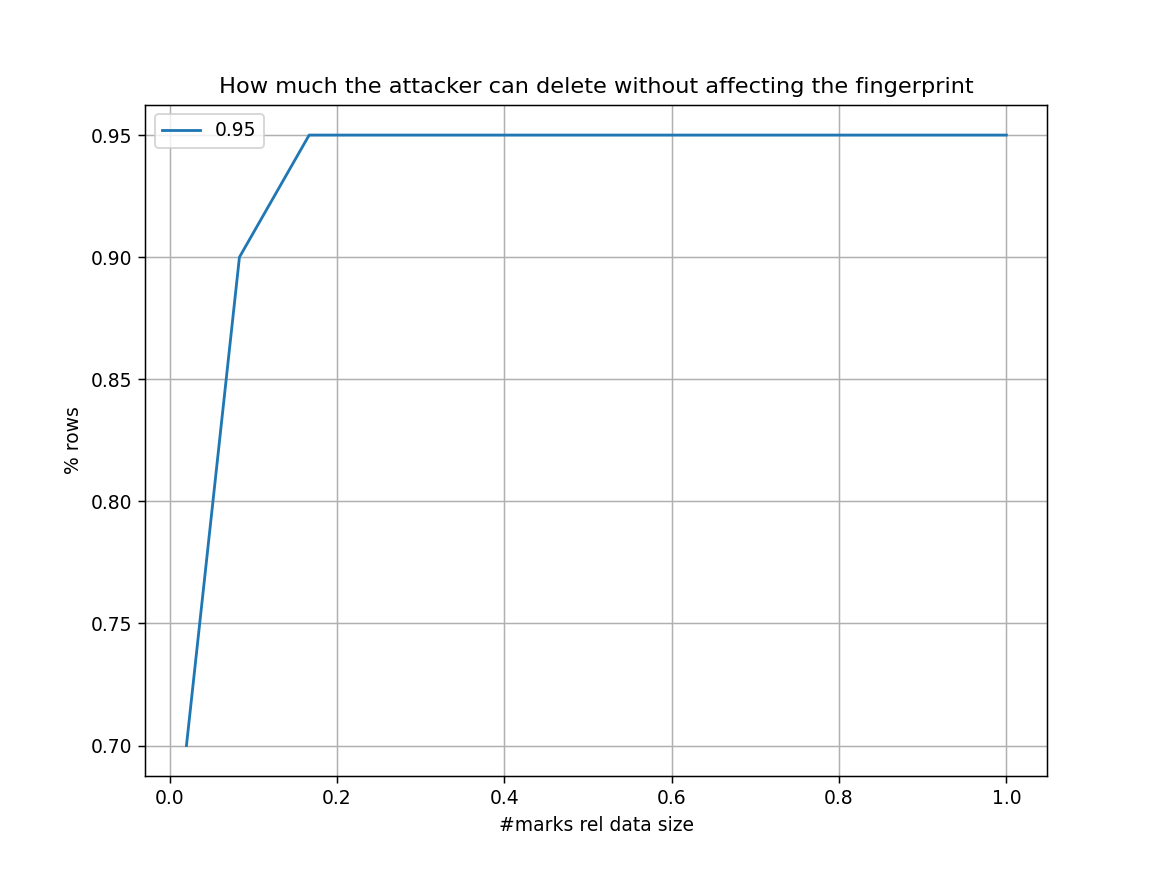

In [29]:
%matplotlib notebook
confidence_rates = [0.95]
attack_granularity = 0.05
n_experiments = 100
for confidence_rate in confidence_rates:
    file_string = 'inverse_robustness_fix_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       format(attack_granularity,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [inv_robustness for inv_robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

In [30]:
resutls

{1: 0.95, 2: 0.95, 3: 0.95, 6: 0.95, 12: 0.9, 50: 0.7}

### Vertical subset attack

In [9]:
attack = VerticalSubsetAttack()

In [10]:
robustness_evaluation(attack, data, 'vertical', gammae, confidence_rate=0.95, target='income', n_experiments=100) 

Updating results with gamma=1
Updating results with gamma=2
Updating results with gamma=3
Updating results with gamma=4
Updating results with gamma=5
Updating results with gamma=6
Updating results with gamma=10
Updating results with gamma=12
Updating results with gamma=15
Updating results with gamma=18
Updating results with gamma=20
Updating results with gamma=25
Updating results with gamma=30
Updating results with gamma=35
Updating results with gamma=40
Updating results with gamma=50
Updating results with gamma=60
Updating results with gamma=70
Updating results with gamma=80
Updating results with gamma=100
Updating results with gamma=200
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship', 'education-num']
Vertical subset attack runtime on 13 out of 14 columns: 0.004542350769042969 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecti

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[957, 476],
 [406, 902],
 [887, 459],
 [971, 459],
 [464, 974],
 [969, 482],
 [466, 944],
 [972, 461],
 [952, 487],
 [939, 450],
 [458, 908],
 [961, 459],
 [484, 940],
 [437, 968],
 [485, 947],
 [971, 475],
 [927, 439],
 [964, 432],
 [497, 1000],
 [473, 996],
 [483, 941],
 [958, 491],
 [912, 403],
 [958, 467],
 [453, 946],
 [465, 950],
 [485, 962],
 [465, 948],
 [444, 953],
 [933, 458],
 [943, 469],
 [472, 965]]
Recipient 1 is suspected.
Runtime: 4 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship', 'fnlwgt']
Vertical subset attack runtime 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[391, 1008],
 [435, 977],
 [1010, 416],
 [408, 1027],
 [406, 1032],
 [1021, 413],
 [1001, 380],
 [1009, 388],
 [1024, 350],
 [412, 991],
 [1020, 423],
 [994, 409],
 [392, 1003],
 [1026, 410],
 [405, 1050],
 [1052, 394],
 [1018, 428],
 [423, 1005],
 [395, 972],
 [397, 962],
 [1027, 408],
 [434, 1014],
 [441, 1049],
 [453, 1009],
 [407, 1044],
 [1030, 385],
 [378, 994],
 [938, 411],
 [980, 419],
 [410, 936],
 [416, 1023],
 [375, 964]]
Recipient 1 is suspected.
Runtime: 5 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt', 'capital-loss']
V

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[419, 973],
 [397, 1029],
 [994, 400],
 [400, 963],
 [429, 1072],
 [415, 1034],
 [990, 418],
 [416, 1019],
 [1012, 405],
 [982, 408],
 [390, 1023],
 [380, 991],
 [421, 1019],
 [994, 410],
 [970, 396],
 [396, 1007],
 [407, 1060],
 [1040, 421],
 [928, 380],
 [1006, 391],
 [1020, 418],
 [1019, 412],
 [429, 955],
 [1004, 393],
 [424, 999],
 [400, 1038],
 [399, 1066],
 [389, 1032],
 [990, 386],
 [957, 427],
 [1044, 372],
 [412, 1032]]
Recipient 1 is suspected.
Runtime: 9 sec.
['native-country', 'income', 'native-country', 'workclass', 'race', 'occupation', 'relationship', 'workclass', 'fnlwgt', 'occupation', 'education', 'occupation', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.0029976367950439453 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occ

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[316, 1072],
 [1066, 367],
 [1062, 361],
 [372, 1086],
 [1033, 361],
 [359, 1084],
 [335, 1090],
 [336, 1090],
 [1011, 343],
 [1093, 361],
 [365, 1009],
 [1016, 319],
 [337, 1062],
 [1066, 348],
 [1078, 383],
 [1114, 305],
 [375, 1094],
 [345, 1106],
 [324, 1073],
 [376, 1051],
 [362, 1063],
 [326, 1033],
 [374, 1079],
 [323, 1079],
 [355, 1069],
 [347, 1083],
 [1078, 346],
 [326, 1056],
 [1107, 338],
 [354, 1020],
 [1059, 343],
 [335, 1023]]
Recipient 1 is suspected.
Runtime: 6 sec.
['age', 'workclass', 'marital-status', 'capital-gain', 'fnlwgt', 'workclass', 'education', 'capital-loss', 'fnlwgt', 'capital-loss', 'sex', 'fnlwgt', 'race']
Verti

Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[1028, 341],
 [1065, 390],
 [1028, 347],
 [1094, 350],
 [334, 1088],
 [1037, 361],
 [1021, 347],
 [1018, 343],
 [348, 1054],
 [1048, 364],
 [1051, 330],
 [351, 1091],
 [373, 1078],
 [327, 1058],
 [1060, 337],
 [1055, 348],
 [381, 1093],
 [1070, 350],
 [1088, 356],
 [1056, 346],
 [1020, 378],
 [360, 1108],
 [353, 1097],
 [323, 1033],
 [1049, 346],
 [338, 1070],
 [1042, 327],
 [1056, 333],
 [1066, 404],
 [363, 1063],
 [347, 1097],
 [360, 1084]]
Recipient 1 is suspected.
Runtime: 10 sec.
['sex', 'occupation', 'capital-gain', 'age', 'capital-gain', 'marital-status', 'sex', 'fnlwgt', 'marital-status', 'education-num', 'education-num', 'capital-gain', 'relationship']
Vertical subset attack runtime on 13 out of 14 columns: 0.005999088287353516 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
     

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[420, 989],
 [1020, 437],
 [1005, 377],
 [389, 1073],
 [400, 950],
 [1000, 409],
 [1019, 407],
 [985, 399],
 [409, 1038],
 [390, 996],
 [389, 988],
 [1005, 401],
 [398, 1078],
 [371, 985],
 [407, 1030],
 [381, 1004],
 [979, 396],
 [424, 1049],
 [403, 992],
 [369, 995],
 [1038, 423],
 [1053, 404],
 [1002, 444],
 [366, 1010],
 [955, 433],
 [394, 1050],
 [403, 1023],
 [981, 401],
 [1034, 451],
 [391, 1002],
 [377, 1014],
 [1027, 390]]
Recipient 1 is suspected.
Runtime: 4 sec.
['native-country', 'marital-status', 'race', 'hours-per-week', 'education', 'relationship', 'race', 'income', 'age', 'workclass', 'education-num', 'hours-per-week', 'hours-pe

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[386, 971],
 [379, 986],
 [397, 981],
 [1040, 380],
 [383, 1072],
 [990, 425],
 [408, 1039],
 [381, 1013],
 [390, 1009],
 [435, 1002],
 [991, 380],
 [407, 1001],
 [406, 971],
 [1018, 439],
 [1082, 427],
 [426, 995],
 [402, 1019],
 [416, 1023],
 [412, 999],
 [981, 440],
 [376, 1020],
 [407, 1017],
 [1062, 394],
 [983, 410],
 [1033, 413],
 [407, 1050],
 [1020, 371],
 [980, 419],
 [987, 409],
 [402, 996],
 [1011, 385],
 [1004, 364]]
Recipient 1 is suspected.
Runtime: 4 sec.
['sex', 'native-country', 'occupation', 'capital-gain', 'income', 'relationship', 'capital-loss', 'capital-gain', 'hours-per-week', 'age', 'fnlwgt', 'income', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.003999948501586914 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status',

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[523, 949],
 [508, 925],
 [879, 521],
 [849, 500],
 [880, 503],
 [876, 521],
 [524, 969],
 [518, 919],
 [907, 522],
 [527, 921],
 [867, 530],
 [509, 954],
 [875, 518],
 [548, 918],
 [529, 915],
 [906, 457],
 [919, 559],
 [814, 552],
 [915, 507],
 [883, 497],
 [507, 882],
 [880, 496],
 [919, 512],
 [501, 855],
 [891, 495],
 [882, 539],
 [873, 479],
 [913, 534],
 [465, 851],
 [950, 499],
 [905, 558],
 [453, 970]]
Recipient 1 is suspected.
Runtime: 4 sec.
['relationship', 'race', 'hours-per-week', 'education-num', 'education-num', 'capital-gain', 'relationship', 'marital-status', 'occupation', 'education-num', 'fnlwgt', 'sex', 'native-country']
Ve

Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[450, 999],
 [975, 359],
 [409, 989],
 [943, 416],
 [427, 1014],
 [1008, 420],
 [993, 359],
 [975, 363],
 [1019, 383],
 [1017, 408],
 [399, 1002],
 [380, 1004],
 [998, 415],
 [412, 977],
 [444, 1007],
 [987, 411],
 [405, 997],
 [1008, 398],
 [998, 458],
 [392, 1019],
 [394, 992],
 [1026, 420],
 [973, 369],
 [397, 1035],
 [421, 1022],
 [411, 1021],
 [1025, 410],
 [1003, 436],
 [1040, 424],
 [410, 1056],
 [1047, 386],
 [1042, 425]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week', 'education-num', 'income', 'marital-status', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030007362365722656 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-st

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[1007, 424],
 [409, 1015],
 [417, 1034],
 [376, 1022],
 [394, 1013],
 [402, 1004],
 [1047, 380],
 [1056, 361],
 [1017, 364],
 [1009, 382],
 [978, 419],
 [1003, 401],
 [1033, 384],
 [991, 443],
 [351, 1013],
 [1011, 389],
 [414, 1010],
 [1000, 384],
 [417, 1046],
 [1008, 404],
 [972, 404],
 [1000, 411],
 [1007, 409],
 [425, 1017],
 [1021, 429],
 [977, 411],
 [423, 972],
 [382, 1035],
 [390, 1009],
 [399, 1043],
 [396, 1070],
 [384, 1004]]
Recipient 1 is suspected.
Runtime: 4 sec.
['marital-status', 'income', 'education', 'education-num', 'occupation', 'education', 'education-num', 'hours-per-week', 'relationship', 'workclass', 'hours-per-week', 

Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[506, 929],
 [908, 494],
 [495, 905],
 [917, 467],
 [919, 526],
 [543, 876],
 [939, 497],
 [839, 493],
 [473, 933],
 [927, 481],
 [926, 493],
 [547, 919],
 [492, 964],
 [886, 507],
 [523, 902],
 [481, 926],
 [497, 914],
 [886, 500],
 [976, 515],
 [941, 473],
 [901, 491],
 [480, 837],
 [913, 509],
 [892, 512],
 [938, 541],
 [478, 902],
 [940, 509],
 [473, 939],
 [507, 876],
 [874, 545],
 [924, 507],
 [486, 913]]
Recipient 1 is suspected.
Runtime: 4 sec.
['relationship', 'hours-per-week', 'workclass', 'marital-status', 'age', 'sex', 'fnlwgt', 'education-num', 'hours-per-week', 'age', 'fnlwgt', 'education-num', 'hours-per-week']
Vertical subset attack runtime on 13 out of 14 columns: 0.0029981136322021484 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', '

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[942, 519],
 [547, 923],
 [897, 507],
 [471, 890],
 [915, 504],
 [933, 469],
 [521, 884],
 [522, 899],
 [515, 908],
 [477, 903],
 [475, 936],
 [869, 484],
 [531, 920],
 [503, 921],
 [486, 913],
 [501, 886],
 [875, 483],
 [909, 473],
 [506, 895],
 [494, 900],
 [886, 509],
 [928, 514],
 [470, 926],
 [893, 547],
 [930, 527],
 [471, 877],
 [484, 908],
 [507, 928],
 [936, 534],
 [526, 910],
 [503, 896],
 [960, 546]]
Recipient 1 is suspected.
Runtime: 4 sec.
['workclass', 'fnlwgt', 'capital-gain', 'fnlwgt', 'income', 'hours-per-week', 'capital-loss', 'occupation', 'hours-per-week', 'education', 'sex', 'marital-status', 'relationship']
Vertical subset

Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[444, 919],
 [944, 466],
 [913, 437],
 [455, 953],
 [465, 961],
 [934, 482],
 [956, 427],
 [474, 907],
 [1025, 475],
 [471, 943],
 [974, 453],
 [951, 473],
 [412, 943],
 [400, 965],
 [951, 456],
 [973, 466],
 [1006, 459],
 [485, 995],
 [954, 447],
 [465, 998],
 [461, 949],
 [454, 957],
 [474, 928],
 [439, 961],
 [920, 442],
 [969, 462],
 [442, 981],
 [962, 438],
 [431, 1012],
 [468, 930],
 [950, 444],
 [1011, 460]]
Recipient 1 is suspected.
Runtime: 4 sec.
['marital-status', 'hours-per-week', 'marital-status', 'age', 'relationship', 'capital-gain', 'capital-gain', 'age', 'relationship', 'fnlwgt', 'age', 'income', 'capital-gain']
Vertical subset attack runtime on 13 out of 14 columns: 0.00399470329284668 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[178, 533],
 [200, 488],
 [558, 156],
 [187, 502],
 [168, 557],
 [531, 198],
 [175, 501],
 [175, 500],
 [543, 210],
 [527, 184],
 [558, 178],
 [547, 168],
 [526, 182],
 [549, 162],
 [177, 549],
 [168, 515],
 [159, 517],
 [181, 559],
 [549, 178],
 [209, 560],
 [524, 170],
 [520, 151],
 [542, 168],
 [174, 527],
 [159, 520],
 [171, 516],
 [576, 184],
 [185, 481],
 [500, 157],
 [521, 173],
 [513, 193],
 [522, 178]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'hours-per-week', 'relationship', 'education', 'age', 'sex', 'relationship', 'capital-loss', 'marital-status', 'capital-loss', 'education-num', 'hours-per-week', 'capital-gain']


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[492, 237],
 [204, 556],
 [482, 195],
 [489, 199],
 [513, 199],
 [217, 506],
 [514, 217],
 [195, 488],
 [193, 512],
 [193, 511],
 [204, 486],
 [176, 477],
 [207, 464],
 [216, 511],
 [486, 196],
 [201, 476],
 [540, 194],
 [518, 190],
 [208, 523],
 [209, 469],
 [203, 500],
 [513, 209],
 [202, 533],
 [205, 516],
 [503, 202],
 [223, 475],
 [478, 209],
 [208, 560],
 [190, 484],
 [541, 200],
 [203, 480],
 [201, 510]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'capital-gain', 'sex', 'income', 'education-num', 'education', 'capital-loss', 'sex', 'education-num', 'capital-gain', 'marital-status', 'capital-loss', 'workclass']
Vertical subset

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[449, 257],
 [457, 243],
 [255, 481],
 [432, 254],
 [450, 237],
 [232, 431],
 [234, 454],
 [276, 459],
 [435, 239],
 [264, 445],
 [260, 463],
 [275, 479],
 [454, 242],
 [467, 239],
 [252, 467],
 [408, 252],
 [248, 456],
 [453, 250],
 [269, 403],
 [268, 457],
 [275, 436],
 [256, 443],
 [238, 455],
 [459, 272],
 [464, 262],
 [249, 490],
 [251, 447],
 [228, 428],
 [213, 464],
 [436, 271],
 [295, 469],
 [233, 477]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'fnlwgt', 'age', 'income', 'fnlwgt', 'workclass', 'sex', 'marital-status', 'native-country', 'education', 'income', 'education-num', 'sex']
Vertical subset attack runtime on 13 out of 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[516, 187],
 [435, 194],
 [219, 516],
 [534, 209],
 [500, 206],
 [499, 200],
 [547, 208],
 [178, 501],
 [213, 483],
 [214, 499],
 [526, 178],
 [201, 491],
 [194, 507],
 [196, 469],
 [192, 498],
 [208, 486],
 [499, 192],
 [204, 529],
 [194, 489],
 [476, 213],
 [187, 497],
 [489, 192],
 [182, 489],
 [197, 526],
 [191, 521],
 [494, 197],
 [510, 201],
 [186, 475],
 [206, 495],
 [551, 210],
 [507, 230],
 [180, 502]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'education-num', 'age', 'sex', 'education', 'education', 'marital-status', 'sex', 'income', 'occupation', 'income', 'income', 'education']
Vertical subset attack runtime on 13 out of 14 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[513, 169],
 [539, 187],
 [509, 178],
 [555, 161],
 [177, 539],
 [518, 176],
 [520, 174],
 [495, 166],
 [170, 535],
 [549, 194],
 [527, 171],
 [166, 523],
 [193, 554],
 [165, 530],
 [532, 156],
 [505, 169],
 [203, 526],
 [540, 164],
 [526, 177],
 [531, 176],
 [484, 191],
 [174, 536],
 [167, 548],
 [167, 535],
 [532, 174],
 [188, 545],
 [500, 159],
 [571, 151],
 [534, 212],
 [176, 532],
 [175, 533],
 [203, 535]]
Recipient 1 is suspected.
Runtime: 3 sec.
['sex', 'occupation', 'capital-gain', 'age', 'capital-gain', 'marital-status', 'sex', 'fnlwgt', 'marital-status', 'education-num', 'education-num', 'capital-gain', 'relationship']
Vertical subset

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[212, 496],
 [508, 218],
 [523, 184],
 [207, 525],
 [205, 496],
 [510, 214],
 [521, 206],
 [514, 207],
 [204, 542],
 [175, 498],
 [192, 491],
 [500, 203],
 [177, 539],
 [199, 508],
 [214, 530],
 [167, 485],
 [477, 202],
 [214, 532],
 [203, 516],
 [180, 494],
 [530, 216],
 [510, 206],
 [517, 225],
 [197, 494],
 [463, 211],
 [198, 533],
 [200, 509],
 [477, 203],
 [538, 210],
 [186, 513],
 [202, 501],
 [484, 185]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'marital-status', 'race', 'hours-per-week', 'education', 'relationship', 'race', 'income', 'age', 'workclass', 'education-num', 'hours-per-week', 'hours-per-week']
Vertical sub

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[221, 459],
 [471, 235],
 [507, 226],
 [528, 241],
 [469, 223],
 [478, 221],
 [239, 512],
 [536, 232],
 [219, 498],
 [521, 228],
 [211, 485],
 [474, 220],
 [481, 221],
 [209, 461],
 [435, 203],
 [468, 222],
 [496, 229],
 [467, 250],
 [467, 231],
 [243, 489],
 [497, 208],
 [238, 475],
 [214, 503],
 [205, 451],
 [513, 197],
 [489, 237],
 [469, 220],
 [463, 216],
 [495, 245],
 [213, 491],
 [496, 223],
 [459, 224]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'fnlwgt', 'race', 'relationship', 'income', 'marital-status', 'occupation', 'race', 'marital-status', 'native-country', 'native-country', 'capital-gain', 'age']
Vertical subset

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[463, 250],
 [226, 444],
 [256, 461],
 [444, 278],
 [246, 457],
 [452, 240],
 [441, 253],
 [428, 258],
 [253, 487],
 [259, 466],
 [445, 246],
 [240, 493],
 [255, 440],
 [478, 269],
 [262, 459],
 [264, 475],
 [255, 447],
 [465, 247],
 [238, 411],
 [442, 240],
 [258, 417],
 [476, 265],
 [253, 454],
 [237, 441],
 [247, 462],
 [433, 264],
 [248, 436],
 [241, 427],
 [256, 482],
 [241, 451],
 [242, 434],
 [239, 426]]
Recipient 1 is suspected.
Runtime: 4 sec.
['native-country', 'fnlwgt', 'income', 'education', 'occupation', 'native-country', 'marital-status', 'relationship', 'fnlwgt', 'income', 'income', 'fnlwgt', 'workclass']
Vertical subset attack r

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[240, 473],
 [438, 312],
 [220, 468],
 [261, 418],
 [268, 445],
 [457, 236],
 [247, 447],
 [247, 511],
 [471, 237],
 [255, 450],
 [444, 250],
 [496, 262],
 [243, 473],
 [478, 236],
 [427, 258],
 [241, 438],
 [485, 245],
 [280, 482],
 [491, 209],
 [261, 480],
 [285, 486],
 [285, 440],
 [272, 448],
 [469, 258],
 [449, 228],
 [250, 442],
 [474, 237],
 [464, 228],
 [258, 400],
 [252, 420],
 [277, 439],
 [442, 270]]
Recipient 1 is suspected.
Runtime: 4 sec.
['native-country', 'education-num', 'occupation', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'race', 'capital-gain', 'occupation', 'marital-status', 'marital-status', 'workclass']
Vertical sub

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[208, 489],
 [225, 484],
 [203, 483],
 [476, 189],
 [198, 470],
 [489, 177],
 [493, 210],
 [543, 211],
 [186, 510],
 [527, 190],
 [183, 498],
 [173, 503],
 [536, 216],
 [501, 200],
 [490, 186],
 [204, 443],
 [206, 454],
 [210, 496],
 [498, 222],
 [537, 185],
 [223, 527],
 [506, 215],
 [223, 521],
 [480, 209],
 [238, 487],
 [187, 537],
 [498, 221],
 [526, 216],
 [486, 206],
 [542, 192],
 [224, 497],
 [525, 186]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-loss', 'education-num', 'education', 'hours-per-week', 'workclass', 'relationship', 'race', 'sex', 'fnlwgt', 'sex', 'relationship', 'hours-per-week', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030274391174316406 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationsh

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011001111001110010010110011110
Counts:
[[514, 250],
 [241, 468],
 [483, 243],
 [209, 443],
 [226, 512],
 [462, 231],
 [480, 204],
 [213, 487],
 [221, 465],
 [227, 470],
 [243, 479],
 [441, 241],
 [493, 212],
 [230, 498],
 [228, 481],
 [240, 488],
 [497, 233],
 [475, 219],
 [233, 457],
 [486, 217],
 [460, 223],
 [215, 505],
 [457, 224],
 [231, 476],
 [226, 492],
 [527, 229],
 [487, 237],
 [233, 464],
 [241, 477],
 [241, 440],
 [230, 478],
 [486, 207]]
Recipient 1 is suspected.
Runtime: 4 sec.
['fnlwgt', 'sex', 'workclass', 'native-country', 'fnlwgt', 'occupation', 'capital-loss', 'native-country', 'race', 'capital-gain', 'race', 'hours-per-week', 'education']
Vertical subset attack ru

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[619, 108],
 [542, 138],
 [587, 119],
 [146, 591],
 [591, 115],
 [137, 546],
 [134, 571],
 [578, 130],
 [110, 575],
 [584, 115],
 [537, 113],
 [141, 588],
 [113, 570],
 [607, 130],
 [541, 133],
 [571, 129],
 [129, 575],
 [575, 122],
 [127, 544],
 [588, 129],
 [562, 114],
 [616, 142],
 [132, 619],
 [631, 146],
 [608, 109],
 [604, 131],
 [120, 550],
 [535, 149],
 [591, 133],
 [566, 119],
 [588, 142],
 [563, 147]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'relationship', 'race', 'marital-status', 'workclass', 'marital-status', 'fnlwgt', 'workclass', 'fnlwgt', 'age', 'race', 'workclass', 'sex']
Vertical subset attack runtime on 1

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[126, 313],
 [152, 366],
 [357, 145],
 [361, 118],
 [131, 349],
 [130, 355],
 [313, 116],
 [134, 343],
 [339, 142],
 [139, 387],
 [360, 147],
 [129, 317],
 [131, 313],
 [127, 355],
 [116, 305],
 [331, 143],
 [158, 322],
 [135, 361],
 [323, 162],
 [323, 138],
 [127, 338],
 [361, 122],
 [125, 343],
 [337, 122],
 [325, 124],
 [147, 339],
 [313, 136],
 [146, 305],
 [133, 330],
 [298, 138],
 [132, 310],
 [343, 129]]
Recipient 1 is suspected.
Runtime: 4 sec.
['fnlwgt', 'hours-per-week', 'capital-loss', 'education', 'relationship', 'occupation', 'sex', 'capital-loss', 'workclass', 'age', 'hours-per-week', 'occupation', 'capital-loss']
Vertical subset 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[343, 126],
 [332, 111],
 [129, 338],
 [122, 337],
 [118, 348],
 [406, 114],
 [364, 115],
 [359, 121],
 [370, 111],
 [121, 386],
 [335, 122],
 [121, 372],
 [349, 133],
 [365, 120],
 [342, 109],
 [350, 128],
 [352, 123],
 [371, 122],
 [340, 132],
 [360, 128],
 [359, 109],
 [96, 339],
 [349, 131],
 [118, 343],
 [129, 342],
 [359, 102],
 [112, 351],
 [127, 340],
 [115, 352],
 [119, 349],
 [113, 356],
 [108, 332]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'marital-status', 'fnlwgt', 'hours-per-week', 'age', 'relationship', 'native-country', 'workclass', 'race', 'sex', 'age', 'marital-status', 'capital-gain']
Vertical subset attack ru

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[304, 142],
 [316, 170],
 [303, 172],
 [315, 162],
 [321, 171],
 [148, 321],
 [334, 146],
 [150, 322],
 [326, 190],
 [339, 174],
 [146, 327],
 [310, 146],
 [155, 312],
 [134, 344],
 [147, 333],
 [154, 317],
 [326, 137],
 [153, 329],
 [313, 153],
 [153, 314],
 [289, 159],
 [137, 313],
 [154, 315],
 [159, 334],
 [159, 327],
 [335, 165],
 [329, 171],
 [309, 153],
 [150, 304],
 [154, 285],
 [319, 158],
 [327, 149]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'hours-per-week', 'income', 'education-num', 'capital-loss', 'capital-gain', 'sex', 'workclass', 'age', 'marital-status', 'capital-loss', 'education', 'relationship']
Vertical su

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[99, 379],
 [371, 98],
 [97, 381],
 [97, 408],
 [92, 393],
 [378, 87],
 [392, 93],
 [95, 365],
 [108, 348],
 [87, 366],
 [385, 84],
 [370, 68],
 [408, 96],
 [375, 114],
 [341, 104],
 [351, 96],
 [380, 102],
 [103, 404],
 [102, 374],
 [97, 364],
 [362, 90],
 [396, 118],
 [101, 338],
 [104, 388],
 [372, 88],
 [113, 388],
 [376, 110],
 [380, 98],
 [383, 99],
 [394, 102],
 [352, 105],
 [362, 110]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'hours-per-week', 'education', 'native-country', 'sex', 'age', 'income', 'education', 'education-num', 'occupation', 'race', 'workclass']
Vertical subset attack runtime on 13 o

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[319, 125],
 [366, 141],
 [327, 147],
 [305, 120],
 [130, 348],
 [129, 357],
 [147, 339],
 [123, 337],
 [339, 130],
 [328, 150],
 [142, 335],
 [160, 362],
 [310, 126],
 [359, 96],
 [356, 132],
 [344, 138],
 [327, 128],
 [360, 121],
 [319, 141],
 [125, 347],
 [347, 110],
 [326, 152],
 [136, 357],
 [151, 307],
 [152, 335],
 [130, 342],
 [326, 119],
 [149, 325],
 [142, 327],
 [327, 132],
 [328, 142],
 [155, 326]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'sex', 'hours-per-week', 'education-num', 'sex', 'native-country', 'native-country', 'fnlwgt', 'sex', 'sex', 'relationship', 'income', 'relationship']
Vertical subset attack runtime on 13

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[115, 347],
 [90, 362],
 [373, 110],
 [367, 117],
 [129, 360],
 [114, 323],
 [130, 342],
 [338, 90],
 [351, 96],
 [128, 353],
 [374, 129],
 [378, 122],
 [351, 124],
 [113, 335],
 [354, 128],
 [355, 118],
 [118, 349],
 [139, 358],
 [330, 135],
 [349, 136],
 [121, 401],
 [321, 119],
 [347, 105],
 [129, 356],
 [381, 139],
 [125, 357],
 [368, 127],
 [352, 104],
 [133, 334],
 [331, 118],
 [372, 96],
 [125, 393]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'education', 'fnlwgt', 'native-country', 'race', 'capital-gain', 'race', 'marital-status', 'capital-gain', 'race', 'capital-loss', 'sex', 'hours-per-week']
Vertical subset attack r

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[160, 312],
 [314, 144],
 [148, 353],
 [313, 146],
 [331, 168],
 [165, 332],
 [321, 144],
 [314, 155],
 [166, 335],
 [160, 295],
 [157, 320],
 [148, 320],
 [177, 336],
 [346, 139],
 [138, 313],
 [149, 342],
 [292, 166],
 [322, 171],
 [150, 310],
 [146, 307],
 [150, 327],
 [328, 170],
 [166, 336],
 [323, 142],
 [293, 142],
 [345, 174],
 [305, 158],
 [313, 149],
 [156, 333],
 [153, 308],
 [334, 159],
 [165, 308]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'occupation', 'workclass', 'capital-loss', 'relationship', 'age', 'age', 'capital-loss', 'fnlwgt', 'capital-loss', 'sex', 'relationship', 'hours-per-week']
Vertical subset attack ru

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[130, 371],
 [130, 315],
 [117, 326],
 [117, 355],
 [345, 126],
 [330, 146],
 [146, 351],
 [350, 150],
 [338, 132],
 [125, 324],
 [121, 318],
 [367, 138],
 [357, 129],
 [127, 340],
 [350, 137],
 [114, 352],
 [335, 137],
 [131, 292],
 [302, 144],
 [308, 122],
 [325, 115],
 [364, 131],
 [325, 136],
 [353, 129],
 [362, 147],
 [340, 128],
 [334, 126],
 [318, 117],
 [125, 341],
 [347, 136],
 [118, 350],
 [142, 381]]
Recipient 1 is suspected.
Runtime: 3 sec.
['age', 'race', 'age', 'relationship', 'income', 'education-num', 'income', 'sex', 'native-country', 'age', 'capital-loss', 'relationship', 'sex']
Vertical subset attack runtime on 13 out of 14 c

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111100011011110111110101010011
Counts:
[[139, 346],
 [153, 278],
 [145, 306],
 [145, 299],
 [169, 306],
 [137, 328],
 [353, 163],
 [328, 143],
 [312, 164],
 [160, 315],
 [168, 331],
 [282, 151],
 [132, 292],
 [155, 323],
 [148, 293],
 [167, 324],
 [343, 164],
 [158, 297],
 [159, 320],
 [163, 327],
 [152, 323],
 [168, 303],
 [277, 125],
 [158, 334],
 [315, 149],
 [153, 338],
 [328, 132],
 [138, 363],
 [299, 155],
 [290, 147],
 [163, 270],
 [155, 297]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'education-num', 'hours-per-week', 'occupation', 'relationship', 'race', 'marital-status', 'sex', 'native-country', 'workclass', 'race', 'education', 'sex']
Vertical subset attack 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[364, 73],
 [377, 86],
 [421, 96],
 [93, 356],
 [376, 83],
 [389, 86],
 [98, 429],
 [373, 85],
 [363, 78],
 [84, 414],
 [79, 392],
 [379, 80],
 [69, 356],
 [76, 411],
 [74, 374],
 [395, 91],
 [93, 411],
 [374, 96],
 [361, 88],
 [420, 65],
 [378, 89],
 [373, 77],
 [416, 85],
 [365, 66],
 [393, 83],
 [86, 370],
 [92, 368],
 [96, 371],
 [68, 379],
 [389, 80],
 [386, 112],
 [404, 74]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'relationship', 'race', 'occupation', 'race', 'relationship', 'relationship', 'education', 'workclass', 'education', 'capital-loss', 'age', 'marital-status']
Vertical subset attack runtime on 13 out of 14 col

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[139, 314],
 [143, 348],
 [335, 151],
 [312, 146],
 [125, 332],
 [291, 116],
 [128, 335],
 [144, 327],
 [163, 338],
 [125, 326],
 [153, 302],
 [320, 148],
 [141, 340],
 [143, 355],
 [356, 135],
 [134, 319],
 [329, 125],
 [121, 336],
 [150, 349],
 [354, 133],
 [323, 140],
 [142, 325],
 [137, 319],
 [122, 337],
 [310, 132],
 [306, 140],
 [308, 147],
 [155, 312],
 [324, 151],
 [147, 327],
 [324, 140],
 [336, 157]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'capital-gain', 'income', 'marital-status', 'relationship', 'marital-status', 'race', 'hours-per-week', 'income', 'native-country', 'income', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.002015829086303711 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'rel

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[365, 151],
 [339, 139],
 [144, 339],
 [135, 335],
 [327, 142],
 [156, 325],
 [305, 134],
 [331, 135],
 [151, 340],
 [324, 134],
 [336, 149],
 [130, 352],
 [330, 155],
 [333, 133],
 [332, 130],
 [321, 141],
 [308, 127],
 [147, 374],
 [131, 310],
 [316, 120],
 [329, 125],
 [362, 148],
 [332, 135],
 [303, 147],
 [155, 310],
 [134, 332],
 [342, 152],
 [352, 111],
 [147, 301],
 [140, 324],
 [342, 148],
 [133, 342]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'fnlwgt', 'native-country', 'sex', 'relationship', 'capital-gain', 'hours-per-week', 'capital-gain', 'fnlwgt', 'income', 'workclass', 'fnlwgt', 'fnlwgt']
Vertical subset attack

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[108, 331],
 [339, 135],
 [102, 404],
 [356, 117],
 [127, 379],
 [114, 346],
 [372, 120],
 [326, 115],
 [110, 349],
 [354, 120],
 [119, 344],
 [352, 123],
 [103, 344],
 [117, 355],
 [343, 103],
 [327, 119],
 [117, 362],
 [387, 124],
 [358, 119],
 [320, 126],
 [121, 360],
 [363, 112],
 [106, 383],
 [359, 116],
 [128, 350],
 [379, 142],
 [351, 121],
 [126, 345],
 [360, 106],
 [360, 117],
 [115, 335],
 [116, 347]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'marital-status', 'education', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation', 'education-num', 'education', 'marital-status', 'educati

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[274, 87],
 [272, 93],
 [79, 290],
 [85, 253],
 [82, 270],
 [273, 77],
 [87, 252],
 [284, 94],
 [88, 253],
 [78, 277],
 [262, 80],
 [274, 97],
 [260, 82],
 [252, 101],
 [81, 272],
 [272, 123],
 [92, 254],
 [77, 272],
 [83, 267],
 [251, 83],
 [258, 92],
 [255, 95],
 [292, 92],
 [92, 265],
 [97, 270],
 [245, 92],
 [264, 73],
 [231, 78],
 [97, 280],
 [273, 86],
 [274, 83],
 [88, 257]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'workclass', 'marital-status', 'fnlwgt', 'age', 'occupation', 'native-country', 'hours-per-week', 'capital-loss', 'education', 'race', 'education-num', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 co

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[235, 121],
 [108, 252],
 [227, 104],
 [227, 104],
 [235, 119],
 [244, 107],
 [208, 144],
 [133, 222],
 [97, 214],
 [108, 238],
 [236, 126],
 [108, 248],
 [244, 125],
 [119, 237],
 [109, 266],
 [254, 106],
 [221, 112],
 [131, 223],
 [112, 218],
 [256, 116],
 [145, 234],
 [243, 116],
 [242, 110],
 [251, 96],
 [229, 106],
 [96, 233],
 [134, 229],
 [276, 125],
 [228, 107],
 [113, 219],
 [110, 243],
 [118, 258]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'sex', 'fnlwgt', 'age', 'marital-status', 'education-num', 'hours-per-week', 'capital-gain', 'sex', 'race', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 co

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[260, 100],
 [96, 260],
 [241, 86],
 [106, 250],
 [103, 270],
 [112, 250],
 [226, 117],
 [116, 249],
 [92, 256],
 [96, 262],
 [249, 97],
 [286, 117],
 [113, 289],
 [227, 92],
 [256, 90],
 [89, 246],
 [90, 252],
 [239, 112],
 [257, 104],
 [97, 248],
 [246, 100],
 [242, 96],
 [92, 244],
 [237, 112],
 [255, 75],
 [252, 104],
 [278, 115],
 [91, 229],
 [259, 90],
 [284, 102],
 [86, 251],
 [99, 235]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'capital-gain', 'capital-loss', 'native-country', 'education', 'sex', 'native-country', 'native-country', 'race', 'fnlwgt', 'occupation', 'income', 'workclass']
Vertical subset attack runtime o

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[144, 212],
 [219, 134],
 [231, 114],
 [123, 222],
 [124, 207],
 [228, 129],
 [232, 123],
 [231, 121],
 [189, 124],
 [210, 132],
 [250, 133],
 [222, 116],
 [128, 228],
 [125, 214],
 [245, 116],
 [148, 266],
 [214, 141],
 [123, 235],
 [240, 113],
 [112, 195],
 [222, 128],
 [234, 131],
 [241, 106],
 [220, 127],
 [236, 119],
 [104, 221],
 [124, 248],
 [127, 226],
 [196, 135],
 [232, 137],
 [199, 129],
 [224, 135]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'workclass', 'race', 'fnlwgt', 'workclass', 'occupation', 'occupation', 'education', 'marital-status', 'hours-per-week', 'workclass', 'fnlwgt', 'age']
Vertical subset attack runtime

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[292, 92],
 [252, 97],
 [94, 272],
 [253, 96],
 [91, 281],
 [252, 93],
 [73, 249],
 [253, 89],
 [264, 73],
 [85, 266],
 [271, 83],
 [82, 286],
 [94, 248],
 [105, 283],
 [89, 275],
 [293, 82],
 [251, 88],
 [96, 240],
 [83, 263],
 [84, 265],
 [74, 265],
 [266, 103],
 [265, 97],
 [81, 227],
 [108, 277],
 [79, 278],
 [91, 246],
 [266, 79],
 [272, 95],
 [73, 240],
 [242, 89],
 [109, 268]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'income', 'income', 'native-country', 'capital-loss', 'native-country', 'age', 'sex', 'education', 'capital-gain', 'occupation', 'race', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.00

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[130, 235],
 [224, 106],
 [257, 109],
 [117, 227],
 [236, 114],
 [182, 128],
 [136, 260],
 [266, 110],
 [108, 229],
 [203, 118],
 [251, 121],
 [132, 230],
 [232, 116],
 [239, 107],
 [110, 256],
 [255, 95],
 [102, 226],
 [119, 277],
 [121, 253],
 [119, 237],
 [93, 206],
 [232, 130],
 [251, 107],
 [210, 113],
 [120, 233],
 [117, 209],
 [254, 108],
 [125, 209],
 [123, 254],
 [230, 130],
 [106, 265],
 [133, 198]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'hours-per-week', 'fnlwgt', 'education', 'age', 'workclass', 'age', 'fnlwgt', 'relationship', 'income', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 13

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[236, 112],
 [102, 219],
 [254, 114],
 [110, 238],
 [231, 101],
 [229, 123],
 [266, 128],
 [98, 251],
 [251, 109],
 [234, 116],
 [244, 110],
 [239, 124],
 [124, 231],
 [208, 112],
 [254, 109],
 [218, 119],
 [225, 115],
 [235, 101],
 [106, 252],
 [117, 222],
 [112, 220],
 [241, 129],
 [115, 230],
 [121, 215],
 [259, 129],
 [221, 101],
 [143, 245],
 [241, 108],
 [96, 227],
 [245, 105],
 [227, 113],
 [138, 191]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'age', 'capital-gain', 'relationship', 'income', 'occupation', 'native-country', 'fnlwgt', 'income', 'occupation', 'fnlwgt', 'marital-status', 'sex']
Vertical subset attack runtime on 13

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[255, 102],
 [279, 109],
 [103, 261],
 [293, 105],
 [245, 120],
 [99, 229],
 [96, 254],
 [276, 96],
 [280, 118],
 [95, 264],
 [267, 96],
 [100, 277],
 [234, 112],
 [120, 258],
 [232, 106],
 [96, 236],
 [246, 102],
 [114, 264],
 [246, 115],
 [105, 257],
 [99, 270],
 [116, 212],
 [83, 259],
 [109, 237],
 [243, 101],
 [87, 257],
 [114, 266],
 [247, 113],
 [298, 96],
 [268, 93],
 [87, 218],
 [97, 242]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'education', 'hours-per-week', 'relationship', 'education-num', 'native-country', 'capital-loss', 'hours-per-week', 'sex', 'fnlwgt', 'marital-status', 'education']
Vertical subset at

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[106, 265],
 [262, 88],
 [98, 248],
 [228, 114],
 [111, 274],
 [243, 89],
 [250, 92],
 [229, 82],
 [258, 93],
 [229, 106],
 [108, 264],
 [102, 248],
 [234, 105],
 [106, 217],
 [130, 255],
 [259, 106],
 [89, 252],
 [256, 87],
 [250, 99],
 [105, 269],
 [94, 221],
 [222, 97],
 [246, 100],
 [82, 281],
 [104, 270],
 [97, 249],
 [278, 105],
 [265, 118],
 [260, 99],
 [108, 267],
 [264, 85],
 [237, 103]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week', 'education-num', 'income', 'marital-status', 'race']
Vertical subset attack runtime

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[270, 111],
 [102, 262],
 [99, 275],
 [103, 246],
 [99, 252],
 [113, 256],
 [269, 90],
 [261, 90],
 [264, 72],
 [269, 113],
 [221, 99],
 [262, 108],
 [256, 105],
 [237, 118],
 [95, 263],
 [230, 95],
 [103, 275],
 [252, 88],
 [105, 240],
 [253, 104],
 [266, 98],
 [270, 110],
 [251, 103],
 [96, 272],
 [236, 112],
 [238, 94],
 [108, 253],
 [98, 277],
 [104, 258],
 [101, 248],
 [98, 246],
 [97, 256]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'income', 'education', 'education-num', 'occupation', 'education', 'education-num', 'hours-per-week', 'relationship', 'workclass', 'hours-per-week', 'education', 'capital-loss']
Vertical subs

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[249, 113],
 [275, 102],
 [109, 262],
 [102, 244],
 [106, 224],
 [94, 255],
 [87, 282],
 [246, 95],
 [110, 247],
 [254, 97],
 [100, 272],
 [260, 99],
 [221, 101],
 [291, 102],
 [232, 104],
 [100, 253],
 [240, 106],
 [251, 99],
 [228, 113],
 [250, 118],
 [85, 245],
 [101, 262],
 [270, 99],
 [263, 107],
 [92, 245],
 [106, 237],
 [88, 229],
 [257, 97],
 [87, 254],
 [132, 283],
 [90, 256],
 [230, 96]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'native-country', 'age', 'age', 'income', 'education-num', 'fnlwgt', 'relationship', 'race', 'capital-loss', 'sex', 'race', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 colum

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[141, 203],
 [213, 132],
 [221, 131],
 [239, 122],
 [223, 128],
 [241, 113],
 [108, 233],
 [215, 135],
 [115, 230],
 [210, 133],
 [210, 124],
 [130, 220],
 [123, 252],
 [119, 212],
 [247, 131],
 [128, 211],
 [135, 243],
 [130, 223],
 [244, 130],
 [242, 133],
 [199, 142],
 [219, 123],
 [120, 213],
 [240, 128],
 [217, 121],
 [221, 139],
 [123, 214],
 [192, 135],
 [242, 125],
 [233, 143],
 [245, 144],
 [257, 137]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'race', 'race', 'hours-per-week', 'income', 'capital-gain', 'hours-per-week', 'race', 'relationship', 'hours-per-week', 'income', 'race']
Vertical subset attack runtime on 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[110, 261],
 [228, 105],
 [130, 239],
 [249, 104],
 [254, 137],
 [232, 117],
 [267, 114],
 [120, 240],
 [242, 111],
 [232, 120],
 [244, 107],
 [257, 114],
 [100, 226],
 [237, 107],
 [114, 257],
 [268, 112],
 [123, 237],
 [105, 249],
 [123, 233],
 [239, 107],
 [237, 113],
 [256, 113],
 [110, 241],
 [220, 103],
 [258, 117],
 [119, 264],
 [243, 121],
 [110, 234],
 [97, 269],
 [112, 236],
 [264, 106],
 [230, 112]]
Recipient 1 is suspected.
Runtime: 3 sec.
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship', 'education-nu

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[191, 90],
 [88, 183],
 [167, 71],
 [186, 96],
 [86, 215],
 [198, 103],
 [98, 198],
 [198, 82],
 [179, 88],
 [193, 89],
 [100, 169],
 [197, 74],
 [96, 206],
 [83, 183],
 [109, 193],
 [196, 110],
 [187, 91],
 [186, 87],
 [85, 216],
 [100, 175],
 [99, 203],
 [202, 104],
 [184, 81],
 [207, 90],
 [87, 184],
 [97, 212],
 [93, 196],
 [87, 172],
 [84, 190],
 [192, 100],
 [158, 89],
 [92, 213]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[78, 180],
 [85, 202],
 [190, 78],
 [91, 190],
 [71, 207],
 [198, 89],
 [213, 80],
 [214, 79],
 [219, 70],
 [76, 211],
 [209, 85],
 [192, 75],
 [66, 191],
 [234, 78],
 [90, 210],
 [201, 82],
 [223, 80],
 [88, 188],
 [82, 212],
 [86, 184],
 [186, 68],
 [82, 205],
 [85, 224],
 [97, 180],
 [96, 240],
 [200, 77],
 [79, 195],
 [177, 71],
 [175, 91],
 [61, 189],
 [91, 199],
 [82, 158]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[180, 92],
 [220, 87],
 [187, 70],
 [192, 72],
 [88, 188],
 [188, 73],
 [87, 165],
 [217, 89],
 [86, 190],
 [76, 224],
 [192, 79],
 [183, 88],
 [197, 84],
 [98, 212],
 [203, 77],
 [224, 75],
 [191, 87],
 [66, 183],
 [84, 192],
 [92, 185],
 [83, 216],
 [88, 187],
 [84, 193],
 [55, 186],
 [72, 196],
 [61, 217],
 [80, 198],
 [87, 221],
 [209, 90],
 [95, 229],
 [184, 95],
 [67, 215]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss', 'occupation']
Vertical subset attack runtime on 13 out of 1

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[173, 83],
 [182, 88],
 [202, 91],
 [81, 185],
 [194, 85],
 [195, 76],
 [107, 204],
 [177, 95],
 [196, 96],
 [85, 189],
 [188, 76],
 [193, 98],
 [166, 92],
 [107, 204],
 [86, 195],
 [92, 188],
 [216, 76],
 [176, 86],
 [190, 77],
 [88, 169],
 [96, 181],
 [189, 89],
 [187, 104],
 [196, 80],
 [90, 190],
 [90, 205],
 [104, 179],
 [187, 98],
 [77, 190],
 [82, 202],
 [101, 206],
 [188, 79]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'education', 'education-num', 'native-country', 'relationship', 'capital-gain', 'workclass', 'relationship', 'hours-per-week', 'relationship', 'income', 'native-country', 'marital-status']
Vertical subset att

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[99, 193],
 [186, 93],
 [89, 201],
 [204, 93],
 [195, 101],
 [196, 78],
 [83, 181],
 [187, 75],
 [80, 188],
 [107, 202],
 [204, 97],
 [82, 177],
 [80, 167],
 [202, 103],
 [185, 89],
 [94, 182],
 [98, 181],
 [217, 73],
 [191, 81],
 [163, 74],
 [82, 193],
 [186, 92],
 [74, 171],
 [81, 192],
 [81, 197],
 [186, 76],
 [213, 70],
 [100, 206],
 [186, 92],
 [76, 191],
 [178, 81],
 [187, 86]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'native-country', 'age', 'education-num', 'income', 'sex', 'workclass', 'marital-status', 'native-country', 'occupation', 'age', 'native-country', 'workclass']
Vertical subset attack runtime on 13 out of 14 c

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[70, 231],
 [61, 214],
 [70, 229],
 [60, 232],
 [66, 227],
 [59, 219],
 [248, 59],
 [51, 245],
 [61, 215],
 [221, 56],
 [63, 207],
 [222, 71],
 [207, 67],
 [207, 58],
 [240, 74],
 [67, 223],
 [209, 54],
 [57, 243],
 [59, 225],
 [220, 50],
 [62, 260],
 [65, 218],
 [216, 69],
 [209, 73],
 [206, 46],
 [58, 224],
 [52, 198],
 [220, 48],
 [195, 58],
 [58, 215],
 [240, 61],
 [209, 61]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'workclass', 'capital-gain', 'education-num', 'income', 'fnlwgt', 'capital-loss', 'fnlwgt', 'income', 'native-country', 'workclass', 'sex', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.0019974

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[195, 96],
 [99, 170],
 [75, 207],
 [85, 177],
 [89, 202],
 [91, 199],
 [191, 91],
 [96, 197],
 [155, 92],
 [85, 217],
 [88, 208],
 [172, 99],
 [214, 112],
 [187, 85],
 [171, 87],
 [90, 199],
 [95, 187],
 [178, 93],
 [96, 178],
 [90, 177],
 [157, 81],
 [83, 185],
 [100, 208],
 [192, 88],
 [172, 96],
 [183, 91],
 [90, 192],
 [101, 203],
 [198, 84],
 [71, 187],
 [85, 188],
 [84, 194]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'race', 'relationship', 'relationship', 'capital-loss', 'income', 'occupation', 'education', 'marital-status', 'workclass', 'sex', 'income', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.0

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[183, 105],
 [226, 97],
 [101, 163],
 [96, 181],
 [191, 103],
 [85, 193],
 [189, 85],
 [193, 89],
 [101, 207],
 [94, 224],
 [85, 204],
 [186, 81],
 [214, 109],
 [208, 100],
 [207, 93],
 [105, 197],
 [94, 199],
 [81, 188],
 [90, 179],
 [87, 176],
 [96, 208],
 [195, 92],
 [91, 195],
 [90, 174],
 [194, 104],
 [102, 233],
 [193, 64],
 [106, 195],
 [103, 197],
 [201, 71],
 [83, 183],
 [80, 179]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'occupation', 'native-country', 'age', 'income', 'capital-gain', 'hours-per-week', 'hours-per-week', 'education', 'hours-per-week', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[207, 78],
 [74, 183],
 [223, 87],
 [223, 72],
 [220, 79],
 [73, 211],
 [213, 89],
 [195, 85],
 [84, 191],
 [202, 76],
 [186, 80],
 [91, 211],
 [73, 181],
 [78, 201],
 [212, 63],
 [77, 198],
 [79, 188],
 [79, 198],
 [212, 97],
 [219, 75],
 [211, 81],
 [76, 207],
 [78, 197],
 [218, 98],
 [80, 208],
 [85, 202],
 [86, 211],
 [80, 202],
 [204, 64],
 [76, 200],
 [228, 81],
 [87, 195]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'race', 'income', 'marital-status', 'race', 'marital-status', 'capital-loss', 'capital-gain', 'race', 'income', 'capital-gain', 'marital-status', 'marital-status']
Vertical subset attack runtime on 13 out of 14 co

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[83, 184],
 [96, 220],
 [209, 83],
 [218, 78],
 [86, 210],
 [173, 65],
 [93, 196],
 [74, 209],
 [86, 204],
 [72, 213],
 [80, 199],
 [181, 77],
 [83, 225],
 [74, 183],
 [231, 87],
 [66, 210],
 [190, 63],
 [92, 210],
 [86, 194],
 [207, 73],
 [189, 71],
 [82, 188],
 [73, 191],
 [77, 182],
 [178, 90],
 [221, 95],
 [206, 81],
 [99, 201],
 [190, 78],
 [70, 213],
 [180, 96],
 [194, 99]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'capital-gain', 'income', 'marital-status', 'relationship', 'marital-status', 'race', 'hours-per-week', 'income', 'native-country', 'income', 'age']
Vertical subset attack runtime on 13 out of 14 colum

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[213, 72],
 [203, 78],
 [85, 214],
 [90, 228],
 [207, 87],
 [82, 196],
 [201, 91],
 [212, 91],
 [96, 201],
 [206, 77],
 [200, 97],
 [89, 184],
 [198, 87],
 [186, 78],
 [187, 92],
 [203, 76],
 [205, 94],
 [80, 220],
 [79, 205],
 [189, 72],
 [195, 73],
 [215, 87],
 [191, 79],
 [204, 78],
 [89, 197],
 [71, 200],
 [188, 83],
 [202, 84],
 [82, 191],
 [83, 197],
 [203, 93],
 [73, 211]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'fnlwgt', 'native-country', 'sex', 'relationship', 'capital-gain', 'hours-per-week', 'capital-gain', 'fnlwgt', 'income', 'workclass', 'fnlwgt', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[73, 217],
 [205, 66],
 [54, 228],
 [224, 74],
 [75, 226],
 [60, 204],
 [221, 60],
 [185, 75],
 [91, 198],
 [205, 68],
 [72, 190],
 [188, 57],
 [73, 230],
 [77, 192],
 [223, 57],
 [217, 79],
 [79, 211],
 [216, 77],
 [203, 70],
 [201, 68],
 [79, 212],
 [223, 73],
 [63, 209],
 [220, 65],
 [61, 211],
 [233, 84],
 [225, 78],
 [64, 214],
 [243, 75],
 [232, 83],
 [77, 216],
 [69, 204]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'marital-status', 'education', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation', 'education-num', 'education', 'marital-status', 'education-num']
Vertical subset attack 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[186, 52],
 [158, 57],
 [51, 185],
 [61, 153],
 [63, 180],
 [183, 55],
 [69, 185],
 [180, 69],
 [51, 195],
 [51, 175],
 [197, 57],
 [186, 66],
 [189, 60],
 [191, 60],
 [65, 202],
 [167, 76],
 [70, 176],
 [51, 182],
 [61, 182],
 [182, 62],
 [147, 68],
 [179, 62],
 [186, 51],
 [55, 203],
 [56, 161],
 [175, 50],
 [176, 55],
 [165, 56],
 [62, 197],
 [181, 56],
 [159, 58],
 [56, 168]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'workclass', 'marital-status', 'fnlwgt', 'age', 'occupation', 'native-country', 'hours-per-week', 'capital-loss', 'education', 'race', 'education-num', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 colu

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[152, 91],
 [75, 177],
 [168, 74],
 [159, 81],
 [164, 92],
 [169, 72],
 [140, 83],
 [77, 155],
 [61, 162],
 [68, 153],
 [149, 86],
 [65, 159],
 [158, 71],
 [86, 177],
 [81, 147],
 [179, 60],
 [168, 77],
 [91, 167],
 [79, 155],
 [168, 79],
 [84, 141],
 [171, 73],
 [160, 67],
 [156, 62],
 [170, 73],
 [73, 159],
 [82, 157],
 [173, 84],
 [179, 57],
 [71, 167],
 [86, 173],
 [74, 172]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'sex', 'fnlwgt', 'age', 'marital-status', 'education-num', 'hours-per-week', 'capital-gain', 'sex', 'race', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.002999544143676758 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[184, 78],
 [76, 181],
 [161, 63],
 [75, 184],
 [62, 169],
 [61, 165],
 [162, 81],
 [73, 150],
 [66, 188],
 [56, 163],
 [181, 55],
 [177, 69],
 [57, 174],
 [155, 61],
 [163, 72],
 [62, 165],
 [66, 163],
 [182, 75],
 [159, 74],
 [78, 169],
 [180, 57],
 [155, 58],
 [71, 166],
 [178, 80],
 [179, 60],
 [165, 54],
 [186, 76],
 [62, 190],
 [172, 74],
 [173, 64],
 [64, 180],
 [65, 168]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'capital-gain', 'capital-loss', 'native-country', 'education', 'sex', 'native-country', 'native-country', 'race', 'fnlwgt', 'occupation', 'income', 'workclass']
Vertical subset attack runtime on 13 out of 14 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[76, 161],
 [156, 95],
 [165, 79],
 [91, 152],
 [95, 133],
 [157, 81],
 [160, 71],
 [175, 73],
 [125, 94],
 [142, 95],
 [149, 85],
 [153, 80],
 [86, 149],
 [86, 169],
 [139, 89],
 [106, 153],
 [146, 107],
 [79, 163],
 [130, 94],
 [88, 123],
 [147, 97],
 [162, 83],
 [163, 72],
 [156, 100],
 [150, 74],
 [85, 147],
 [78, 146],
 [70, 162],
 [141, 98],
 [157, 83],
 [149, 70],
 [142, 92]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'workclass', 'race', 'fnlwgt', 'workclass', 'occupation', 'occupation', 'education', 'marital-status', 'hours-per-week', 'workclass', 'fnlwgt', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.0

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[193, 68],
 [176, 55],
 [54, 178],
 [187, 77],
 [73, 184],
 [189, 59],
 [63, 179],
 [195, 50],
 [182, 58],
 [60, 197],
 [189, 59],
 [65, 209],
 [56, 147],
 [69, 159],
 [55, 187],
 [205, 53],
 [174, 51],
 [58, 186],
 [60, 177],
 [58, 181],
 [43, 172],
 [194, 70],
 [169, 68],
 [60, 162],
 [73, 192],
 [64, 193],
 [60, 174],
 [165, 55],
 [163, 59],
 [59, 138],
 [152, 71],
 [61, 170]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'income', 'income', 'native-country', 'capital-loss', 'native-country', 'age', 'sex', 'education', 'capital-gain', 'occupation', 'race', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.002996

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[86, 152],
 [156, 65],
 [176, 83],
 [67, 157],
 [167, 67],
 [155, 80],
 [73, 170],
 [175, 90],
 [72, 161],
 [154, 78],
 [161, 94],
 [79, 174],
 [145, 83],
 [150, 88],
 [77, 151],
 [188, 67],
 [60, 147],
 [74, 181],
 [81, 185],
 [83, 171],
 [72, 158],
 [165, 79],
 [172, 86],
 [149, 84],
 [78, 163],
 [73, 144],
 [172, 61],
 [81, 162],
 [88, 182],
 [160, 90],
 [73, 171],
 [78, 167]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'hours-per-week', 'fnlwgt', 'education', 'age', 'workclass', 'age', 'fnlwgt', 'relationship', 'income', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 0.00200128

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[142, 78],
 [61, 165],
 [168, 55],
 [73, 164],
 [159, 75],
 [145, 71],
 [167, 98],
 [75, 153],
 [159, 78],
 [162, 84],
 [157, 79],
 [161, 82],
 [75, 172],
 [143, 74],
 [170, 82],
 [150, 81],
 [165, 66],
 [163, 72],
 [73, 165],
 [89, 165],
 [78, 144],
 [185, 85],
 [75, 149],
 [70, 123],
 [166, 83],
 [165, 54],
 [88, 163],
 [171, 65],
 [73, 138],
 [160, 63],
 [175, 87],
 [87, 147]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'age', 'capital-gain', 'relationship', 'income', 'occupation', 'native-country', 'fnlwgt', 'income', 'occupation', 'fnlwgt', 'marital-status', 'sex']
Vertical subset attack runtime on 13 out of 14 columns: 0.00200295

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[176, 64],
 [178, 70],
 [75, 203],
 [172, 71],
 [167, 75],
 [73, 160],
 [50, 162],
 [176, 74],
 [183, 63],
 [59, 173],
 [169, 61],
 [68, 175],
 [161, 74],
 [68, 176],
 [153, 79],
 [68, 156],
 [145, 73],
 [85, 162],
 [158, 62],
 [72, 182],
 [75, 179],
 [79, 153],
 [55, 170],
 [66, 149],
 [179, 76],
 [63, 206],
 [71, 164],
 [160, 65],
 [178, 70],
 [182, 59],
 [53, 149],
 [74, 156]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'education', 'hours-per-week', 'relationship', 'education-num', 'native-country', 'capital-loss', 'hours-per-week', 'sex', 'fnlwgt', 'marital-status', 'education']
Vertical subset attack runtime on 13 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[69, 172],
 [165, 50],
 [79, 170],
 [144, 66],
 [72, 171],
 [149, 71],
 [181, 71],
 [171, 52],
 [160, 51],
 [180, 69],
 [60, 173],
 [71, 163],
 [160, 64],
 [60, 166],
 [84, 147],
 [172, 78],
 [49, 171],
 [163, 61],
 [172, 84],
 [57, 169],
 [68, 180],
 [157, 81],
 [165, 68],
 [68, 183],
 [61, 183],
 [77, 187],
 [165, 67],
 [171, 85],
 [182, 63],
 [81, 184],
 [159, 55],
 [166, 64]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week', 'education-num', 'income', 'marital-status', 'race']
Vertical subset attack runtime on 13 out of 14 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[171, 78],
 [59, 158],
 [66, 198],
 [60, 161],
 [58, 157],
 [67, 167],
 [166, 66],
 [194, 70],
 [163, 56],
 [162, 57],
 [154, 62],
 [172, 80],
 [186, 70],
 [161, 91],
 [54, 163],
 [176, 71],
 [74, 177],
 [168, 76],
 [78, 169],
 [170, 74],
 [178, 53],
 [179, 72],
 [161, 62],
 [72, 160],
 [179, 63],
 [146, 71],
 [85, 148],
 [72, 156],
 [73, 165],
 [63, 171],
 [63, 171],
 [63, 182]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'income', 'education', 'education-num', 'occupation', 'education', 'education-num', 'hours-per-week', 'relationship', 'workclass', 'hours-per-week', 'education', 'capital-loss']
Vertical subset attack runtime

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[169, 75],
 [195, 59],
 [67, 163],
 [62, 174],
 [66, 147],
 [71, 165],
 [76, 184],
 [164, 59],
 [68, 181],
 [196, 59],
 [71, 162],
 [163, 59],
 [154, 64],
 [173, 61],
 [182, 60],
 [72, 174],
 [144, 78],
 [176, 69],
 [153, 73],
 [156, 79],
 [65, 160],
 [55, 169],
 [164, 72],
 [164, 72],
 [66, 157],
 [62, 177],
 [70, 152],
 [169, 61],
 [64, 175],
 [85, 159],
 [70, 184],
 [156, 59]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'native-country', 'age', 'age', 'income', 'education-num', 'fnlwgt', 'relationship', 'race', 'capital-loss', 'sex', 'race', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.003001928329

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[105, 139],
 [144, 77],
 [145, 85],
 [148, 64],
 [159, 72],
 [161, 86],
 [74, 172],
 [162, 88],
 [82, 137],
 [133, 79],
 [137, 85],
 [70, 163],
 [90, 164],
 [78, 154],
 [165, 85],
 [90, 149],
 [89, 152],
 [84, 141],
 [152, 82],
 [172, 109],
 [141, 80],
 [150, 86],
 [92, 150],
 [149, 74],
 [137, 78],
 [117, 92],
 [71, 133],
 [150, 87],
 [142, 75],
 [135, 84],
 [168, 92],
 [168, 80]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'race', 'race', 'hours-per-week', 'income', 'capital-gain', 'hours-per-week', 'race', 'relationship', 'hours-per-week', 'income', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.004035

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[81, 188],
 [144, 87],
 [98, 146],
 [176, 62],
 [182, 94],
 [163, 81],
 [150, 75],
 [65, 163],
 [147, 78],
 [175, 80],
 [169, 68],
 [169, 76],
 [73, 154],
 [144, 74],
 [93, 153],
 [157, 88],
 [90, 150],
 [78, 160],
 [69, 154],
 [168, 68],
 [172, 77],
 [168, 79],
 [77, 174],
 [149, 75],
 [155, 77],
 [71, 165],
 [157, 88],
 [72, 138],
 [61, 171],
 [82, 166],
 [153, 69],
 [154, 87]]
Recipient 1 is suspected.
Runtime: 3 sec.
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship', 'education-num']
Vertical subset attack runt

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[86, 54],
 [43, 77],
 [84, 31],
 [91, 44],
 [46, 105],
 [104, 54],
 [49, 100],
 [104, 35],
 [94, 39],
 [92, 43],
 [45, 84],
 [101, 40],
 [48, 108],
 [35, 85],
 [57, 104],
 [92, 57],
 [87, 42],
 [94, 43],
 [47, 115],
 [48, 81],
 [39, 105],
 [106, 52],
 [91, 40],
 [100, 51],
 [49, 94],
 [43, 104],
 [46, 87],
 [41, 82],
 [44, 102],
 [102, 44],
 [75, 42],
 [41, 100]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.003032684326171875 sec.

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[45, 106],
 [43, 104],
 [99, 40],
 [35, 86],
 [28, 95],
 [101, 37],
 [112, 37],
 [93, 40],
 [111, 43],
 [31, 98],
 [104, 41],
 [95, 37],
 [30, 92],
 [120, 49],
 [47, 94],
 [96, 36],
 [107, 43],
 [50, 90],
 [50, 92],
 [44, 92],
 [103, 34],
 [32, 107],
 [52, 107],
 [53, 77],
 [56, 125],
 [111, 46],
 [37, 88],
 [98, 31],
 [97, 47],
 [28, 84],
 [48, 98],
 [39, 88]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030016899108886

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[81, 43],
 [103, 37],
 [97, 31],
 [104, 31],
 [40, 90],
 [94, 42],
 [40, 80],
 [110, 40],
 [52, 103],
 [41, 117],
 [102, 42],
 [103, 47],
 [98, 37],
 [40, 93],
 [101, 27],
 [117, 40],
 [98, 48],
 [35, 94],
 [42, 82],
 [60, 88],
 [39, 119],
 [42, 102],
 [43, 97],
 [31, 92],
 [33, 109],
 [32, 102],
 [43, 88],
 [44, 101],
 [118, 47],
 [52, 121],
 [79, 55],
 [28, 107]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.00

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[81, 36],
 [92, 45],
 [83, 53],
 [30, 95],
 [102, 45],
 [92, 39],
 [57, 101],
 [81, 44],
 [111, 53],
 [50, 88],
 [96, 49],
 [98, 44],
 [69, 43],
 [49, 101],
 [41, 103],
 [36, 92],
 [113, 46],
 [91, 47],
 [89, 37],
 [42, 99],
 [54, 90],
 [90, 48],
 [98, 53],
 [108, 42],
 [51, 91],
 [42, 112],
 [48, 93],
 [88, 58],
 [33, 96],
 [36, 92],
 [56, 97],
 [95, 41]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'education', 'education-num', 'native-country', 'relationship', 'capital-gain', 'workclass', 'relationship', 'hours-per-week', 'relationship', 'income', 'native-country', 'marital-status']
Vertical subset attack runtime on 13 out of 14 c

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[46, 106],
 [88, 44],
 [46, 108],
 [103, 53],
 [102, 50],
 [98, 37],
 [50, 100],
 [84, 38],
 [41, 94],
 [46, 106],
 [106, 43],
 [40, 84],
 [40, 77],
 [107, 41],
 [89, 55],
 [48, 95],
 [45, 94],
 [111, 41],
 [89, 40],
 [87, 42],
 [41, 99],
 [101, 42],
 [34, 90],
 [37, 85],
 [48, 99],
 [104, 36],
 [117, 36],
 [53, 91],
 [91, 42],
 [36, 108],
 [87, 34],
 [82, 47]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'native-country', 'age', 'education-num', 'income', 'sex', 'workclass', 'marital-status', 'native-country', 'occupation', 'age', 'native-country', 'workclass']
Vertical subset attack runtime on 13 out of 14 columns: 0.0039994716644

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[37, 120],
 [38, 101],
 [36, 130],
 [31, 112],
 [27, 127],
 [33, 107],
 [109, 35],
 [25, 113],
 [33, 89],
 [122, 20],
 [30, 103],
 [104, 32],
 [110, 32],
 [103, 27],
 [124, 46],
 [37, 114],
 [90, 29],
 [24, 133],
 [28, 120],
 [101, 24],
 [28, 127],
 [31, 110],
 [108, 40],
 [105, 44],
 [117, 24],
 [26, 97],
 [23, 108],
 [112, 18],
 [95, 25],
 [30, 102],
 [121, 29],
 [111, 30]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'workclass', 'capital-gain', 'education-num', 'income', 'fnlwgt', 'capital-loss', 'fnlwgt', 'income', 'native-country', 'workclass', 'sex', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.00199937820

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[106, 49],
 [55, 94],
 [37, 110],
 [49, 76],
 [46, 95],
 [51, 111],
 [85, 40],
 [48, 87],
 [77, 46],
 [48, 109],
 [45, 116],
 [81, 40],
 [106, 60],
 [91, 44],
 [82, 40],
 [42, 102],
 [48, 88],
 [82, 46],
 [52, 89],
 [48, 87],
 [85, 41],
 [46, 98],
 [54, 99],
 [102, 51],
 [84, 44],
 [86, 39],
 [47, 87],
 [53, 94],
 [102, 49],
 [34, 97],
 [41, 102],
 [54, 86]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'race', 'relationship', 'relationship', 'capital-loss', 'income', 'occupation', 'education', 'marital-status', 'workclass', 'sex', 'income', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.002996683120727539 sec.
St

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[87, 55],
 [116, 49],
 [53, 82],
 [48, 76],
 [97, 53],
 [46, 97],
 [78, 51],
 [93, 42],
 [47, 104],
 [47, 110],
 [43, 98],
 [94, 40],
 [117, 59],
 [96, 44],
 [104, 49],
 [43, 100],
 [51, 91],
 [37, 84],
 [53, 83],
 [46, 92],
 [50, 103],
 [95, 41],
 [38, 91],
 [44, 96],
 [94, 51],
 [55, 117],
 [90, 37],
 [56, 84],
 [52, 110],
 [95, 36],
 [35, 95],
 [37, 96]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'occupation', 'native-country', 'age', 'income', 'capital-gain', 'hours-per-week', 'hours-per-week', 'education', 'hours-per-week', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.0019974708557128906

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[113, 32],
 [30, 84],
 [121, 37],
 [106, 44],
 [110, 30],
 [39, 98],
 [103, 45],
 [94, 52],
 [45, 104],
 [115, 34],
 [96, 39],
 [40, 103],
 [34, 87],
 [36, 90],
 [103, 32],
 [36, 107],
 [46, 103],
 [44, 104],
 [106, 53],
 [94, 32],
 [99, 40],
 [38, 101],
 [38, 104],
 [92, 49],
 [43, 92],
 [26, 108],
 [49, 102],
 [43, 126],
 [103, 39],
 [37, 104],
 [123, 40],
 [32, 84]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'race', 'income', 'marital-status', 'race', 'marital-status', 'capital-loss', 'capital-gain', 'race', 'income', 'capital-gain', 'marital-status', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 0.00

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[40, 90],
 [54, 112],
 [101, 52],
 [112, 36],
 [47, 103],
 [86, 35],
 [52, 107],
 [34, 95],
 [45, 111],
 [33, 113],
 [43, 105],
 [95, 39],
 [46, 119],
 [31, 89],
 [120, 51],
 [32, 111],
 [91, 29],
 [44, 122],
 [39, 97],
 [112, 40],
 [92, 40],
 [37, 90],
 [37, 91],
 [30, 87],
 [91, 50],
 [104, 53],
 [106, 39],
 [44, 104],
 [91, 46],
 [38, 110],
 [96, 51],
 [99, 59]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'capital-gain', 'income', 'marital-status', 'relationship', 'marital-status', 'race', 'hours-per-week', 'income', 'native-country', 'income', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.001998901

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[92, 43],
 [96, 37],
 [45, 118],
 [38, 109],
 [99, 46],
 [42, 101],
 [102, 41],
 [103, 42],
 [44, 103],
 [107, 33],
 [99, 43],
 [50, 84],
 [101, 42],
 [99, 40],
 [95, 46],
 [107, 44],
 [105, 54],
 [39, 113],
 [32, 105],
 [99, 38],
 [90, 32],
 [108, 46],
 [83, 34],
 [95, 37],
 [45, 99],
 [39, 105],
 [97, 42],
 [108, 46],
 [34, 94],
 [38, 102],
 [113, 39],
 [39, 101]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'fnlwgt', 'native-country', 'sex', 'relationship', 'capital-gain', 'hours-per-week', 'capital-gain', 'fnlwgt', 'income', 'workclass', 'fnlwgt', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030019283

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[43, 107],
 [98, 25],
 [26, 112],
 [116, 51],
 [35, 109],
 [29, 103],
 [105, 32],
 [95, 34],
 [46, 89],
 [108, 37],
 [43, 98],
 [96, 35],
 [41, 125],
 [37, 106],
 [104, 34],
 [117, 44],
 [38, 105],
 [108, 40],
 [103, 36],
 [113, 30],
 [36, 112],
 [120, 31],
 [28, 102],
 [98, 29],
 [34, 109],
 [113, 34],
 [122, 36],
 [32, 121],
 [123, 42],
 [106, 41],
 [35, 98],
 [41, 102]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'marital-status', 'education', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation', 'education-num', 'education', 'marital-status', 'education-num']
Vertical subset attack runtime

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[97, 22],
 [76, 29],
 [28, 96],
 [27, 80],
 [27, 84],
 [90, 24],
 [31, 81],
 [96, 37],
 [20, 106],
 [22, 91],
 [95, 18],
 [92, 31],
 [99, 25],
 [99, 33],
 [38, 105],
 [91, 48],
 [29, 94],
 [25, 98],
 [31, 98],
 [100, 25],
 [74, 31],
 [78, 32],
 [94, 31],
 [34, 102],
 [32, 72],
 [84, 24],
 [91, 27],
 [83, 28],
 [32, 111],
 [88, 23],
 [99, 23],
 [23, 81]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'workclass', 'marital-status', 'fnlwgt', 'age', 'occupation', 'native-country', 'hours-per-week', 'capital-loss', 'education', 'race', 'education-num', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.002000570297241211 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[78, 38],
 [36, 89],
 [79, 34],
 [88, 36],
 [72, 33],
 [77, 37],
 [67, 45],
 [43, 74],
 [23, 73],
 [38, 76],
 [64, 36],
 [29, 86],
 [84, 40],
 [39, 86],
 [36, 86],
 [91, 33],
 [84, 43],
 [53, 77],
 [37, 73],
 [88, 37],
 [38, 69],
 [84, 36],
 [68, 35],
 [76, 32],
 [84, 31],
 [35, 74],
 [47, 70],
 [90, 44],
 [76, 33],
 [36, 88],
 [37, 84],
 [38, 87]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'sex', 'fnlwgt', 'age', 'marital-status', 'education-num', 'hours-per-week', 'capital-gain', 'sex', 'race', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030355453491210938 sec.
Start detection algorithm..

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[85, 42],
 [35, 91],
 [71, 30],
 [40, 90],
 [28, 83],
 [36, 79],
 [77, 42],
 [43, 77],
 [25, 83],
 [25, 88],
 [85, 27],
 [87, 40],
 [30, 95],
 [77, 33],
 [88, 31],
 [26, 83],
 [29, 80],
 [84, 34],
 [75, 40],
 [36, 74],
 [85, 29],
 [68, 28],
 [31, 90],
 [77, 33],
 [83, 32],
 [80, 31],
 [98, 38],
 [35, 83],
 [90, 37],
 [83, 39],
 [29, 94],
 [31, 84]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'capital-gain', 'capital-loss', 'native-country', 'education', 'sex', 'native-country', 'native-country', 'race', 'fnlwgt', 'occupation', 'income', 'workclass']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020334720611572266 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[38, 80],
 [66, 45],
 [78, 37],
 [48, 74],
 [51, 65],
 [78, 36],
 [85, 39],
 [85, 34],
 [59, 55],
 [74, 55],
 [80, 51],
 [73, 38],
 [49, 86],
 [45, 67],
 [70, 46],
 [59, 76],
 [73, 52],
 [39, 81],
 [71, 48],
 [43, 63],
 [71, 42],
 [82, 48],
 [79, 28],
 [86, 44],
 [72, 34],
 [34, 76],
 [46, 78],
 [37, 77],
 [66, 57],
 [76, 47],
 [76, 43],
 [74, 45]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'workclass', 'race', 'fnlwgt', 'workclass', 'occupation', 'occupation', 'education', 'marital-status', 'hours-per-week', 'workclass', 'fnlwgt', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030317306518554688 sec.
Start detec

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[108, 32],
 [93, 28],
 [24, 90],
 [82, 45],
 [34, 92],
 [97, 35],
 [27, 83],
 [94, 27],
 [88, 23],
 [27, 94],
 [94, 28],
 [30, 106],
 [27, 85],
 [34, 85],
 [29, 94],
 [93, 30],
 [82, 28],
 [28, 80],
 [30, 86],
 [29, 87],
 [20, 99],
 [94, 33],
 [81, 36],
 [30, 77],
 [39, 93],
 [31, 90],
 [24, 78],
 [76, 26],
 [82, 30],
 [24, 68],
 [77, 26],
 [37, 76]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'income', 'income', 'native-country', 'capital-loss', 'native-country', 'age', 'sex', 'education', 'capital-gain', 'occupation', 'race', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.003002166748046875 sec.
Start detect

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[46, 81],
 [72, 38],
 [84, 41],
 [40, 61],
 [82, 37],
 [70, 41],
 [42, 87],
 [95, 44],
 [32, 77],
 [60, 38],
 [82, 45],
 [47, 73],
 [67, 39],
 [72, 44],
 [33, 80],
 [101, 32],
 [28, 75],
 [39, 94],
 [40, 97],
 [46, 77],
 [30, 72],
 [81, 42],
 [86, 41],
 [66, 44],
 [40, 74],
 [35, 63],
 [99, 33],
 [36, 76],
 [47, 87],
 [64, 52],
 [37, 94],
 [45, 66]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'hours-per-week', 'fnlwgt', 'education', 'age', 'workclass', 'age', 'fnlwgt', 'relationship', 'income', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 0.002001047134399414 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[81, 39],
 [31, 72],
 [88, 28],
 [38, 71],
 [69, 37],
 [72, 35],
 [87, 46],
 [31, 80],
 [75, 42],
 [77, 34],
 [91, 47],
 [81, 46],
 [41, 83],
 [69, 36],
 [92, 40],
 [74, 45],
 [74, 34],
 [78, 37],
 [33, 89],
 [42, 85],
 [37, 72],
 [89, 45],
 [38, 76],
 [37, 60],
 [86, 43],
 [72, 24],
 [50, 81],
 [97, 29],
 [34, 67],
 [82, 35],
 [89, 44],
 [44, 60]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'age', 'capital-gain', 'relationship', 'income', 'occupation', 'native-country', 'fnlwgt', 'income', 'occupation', 'fnlwgt', 'marital-status', 'sex']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020318031311035156 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[96, 28],
 [102, 32],
 [42, 96],
 [85, 35],
 [74, 44],
 [44, 81],
 [23, 83],
 [93, 33],
 [100, 36],
 [30, 86],
 [96, 32],
 [39, 89],
 [78, 41],
 [42, 81],
 [69, 41],
 [31, 76],
 [64, 38],
 [48, 85],
 [76, 32],
 [43, 91],
 [30, 88],
 [47, 70],
 [23, 83],
 [32, 76],
 [79, 36],
 [30, 87],
 [35, 85],
 [83, 40],
 [94, 34],
 [96, 33],
 [29, 71],
 [32, 88]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'education', 'hours-per-week', 'relationship', 'education-num', 'native-country', 'capital-loss', 'hours-per-week', 'sex', 'fnlwgt', 'marital-status', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.002001762

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[35, 90],
 [92, 29],
 [39, 95],
 [69, 33],
 [31, 84],
 [72, 34],
 [84, 39],
 [79, 31],
 [86, 19],
 [81, 37],
 [31, 97],
 [36, 86],
 [93, 37],
 [35, 77],
 [50, 84],
 [87, 43],
 [27, 75],
 [82, 26],
 [86, 32],
 [33, 95],
 [32, 74],
 [76, 40],
 [84, 34],
 [25, 99],
 [34, 94],
 [36, 84],
 [88, 35],
 [91, 43],
 [104, 29],
 [40, 93],
 [80, 28],
 [79, 27]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week', 'education-num', 'income', 'marital-status', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.003999233245849609 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[99, 40],
 [31, 83],
 [36, 104],
 [38, 74],
 [30, 75],
 [28, 87],
 [88, 28],
 [91, 36],
 [89, 21],
 [82, 32],
 [68, 25],
 [82, 35],
 [101, 36],
 [80, 51],
 [24, 82],
 [82, 32],
 [39, 100],
 [73, 36],
 [39, 77],
 [87, 37],
 [96, 26],
 [97, 41],
 [76, 38],
 [29, 76],
 [90, 35],
 [77, 37],
 [37, 71],
 [36, 87],
 [37, 86],
 [32, 83],
 [34, 82],
 [37, 89]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'income', 'education', 'education-num', 'occupation', 'education', 'education-num', 'hours-per-week', 'relationship', 'workclass', 'hours-per-week', 'education', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.0

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[89, 38],
 [94, 29],
 [39, 93],
 [25, 91],
 [35, 68],
 [33, 72],
 [38, 98],
 [77, 29],
 [32, 94],
 [96, 36],
 [38, 85],
 [86, 29],
 [78, 33],
 [94, 32],
 [84, 26],
 [39, 87],
 [66, 34],
 [93, 39],
 [76, 32],
 [88, 40],
 [36, 80],
 [29, 84],
 [91, 29],
 [85, 33],
 [35, 81],
 [29, 94],
 [30, 72],
 [84, 33],
 [28, 90],
 [49, 80],
 [31, 92],
 [66, 28]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'native-country', 'age', 'age', 'income', 'education-num', 'fnlwgt', 'relationship', 'race', 'capital-loss', 'sex', 'race', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030019283294677734 sec.
Start detection alg

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[56, 67],
 [79, 38],
 [81, 45],
 [71, 31],
 [78, 35],
 [83, 41],
 [37, 86],
 [78, 48],
 [33, 72],
 [67, 46],
 [69, 47],
 [47, 82],
 [45, 74],
 [39, 70],
 [88, 38],
 [49, 78],
 [44, 82],
 [44, 67],
 [82, 43],
 [89, 44],
 [73, 40],
 [73, 40],
 [46, 72],
 [76, 43],
 [65, 40],
 [60, 50],
 [30, 75],
 [69, 44],
 [68, 41],
 [61, 39],
 [85, 54],
 [93, 40]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'race', 'race', 'hours-per-week', 'income', 'capital-gain', 'hours-per-week', 'race', 'relationship', 'hours-per-week', 'income', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.0040035247802734375 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[41, 92],
 [76, 38],
 [49, 73],
 [80, 38],
 [92, 54],
 [78, 36],
 [85, 34],
 [26, 86],
 [71, 46],
 [78, 32],
 [77, 40],
 [81, 35],
 [28, 61],
 [67, 37],
 [45, 77],
 [94, 42],
 [45, 87],
 [33, 82],
 [35, 78],
 [79, 30],
 [80, 36],
 [93, 34],
 [40, 87],
 [70, 30],
 [75, 37],
 [39, 97],
 [72, 45],
 [29, 62],
 [32, 100],
 [43, 74],
 [81, 43],
 [70, 40]]
Recipient 1 is suspected.
Runtime: 3 sec.
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship', 'education-num']
Vertical subset attack runtime on 13 out of 14 columns: 0.

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[53, 27],
 [31, 64],
 [57, 30],
 [68, 29],
 [28, 78],
 [67, 38],
 [32, 75],
 [57, 29],
 [50, 33],
 [60, 25],
 [35, 62],
 [67, 18],
 [36, 73],
 [31, 67],
 [40, 71],
 [53, 29],
 [66, 35],
 [64, 31],
 [38, 67],
 [35, 66],
 [35, 75],
 [74, 28],
 [65, 24],
 [61, 29],
 [27, 57],
 [29, 75],
 [32, 79],
 [29, 57],
 [25, 60],
 [57, 32],
 [61, 30],
 [34, 81]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.003002643585205078 sec.
Start detectio

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[24, 52],
 [24, 59],
 [63, 31],
 [26, 55],
 [21, 73],
 [60, 40],
 [63, 26],
 [74, 29],
 [77, 24],
 [19, 61],
 [73, 32],
 [56, 20],
 [21, 67],
 [94, 23],
 [29, 69],
 [68, 27],
 [81, 23],
 [33, 67],
 [36, 66],
 [27, 55],
 [64, 16],
 [24, 71],
 [26, 83],
 [37, 50],
 [28, 68],
 [66, 22],
 [30, 59],
 [58, 20],
 [55, 29],
 [14, 60],
 [33, 71],
 [28, 61]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.004001140594482422 sec.
Start

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[62, 32],
 [69, 34],
 [58, 16],
 [55, 21],
 [27, 65],
 [57, 21],
 [32, 63],
 [60, 37],
 [26, 60],
 [29, 77],
 [54, 28],
 [63, 24],
 [78, 27],
 [33, 73],
 [65, 24],
 [66, 26],
 [71, 28],
 [32, 52],
 [37, 63],
 [25, 50],
 [27, 81],
 [24, 64],
 [32, 56],
 [16, 64],
 [19, 66],
 [27, 68],
 [24, 58],
 [25, 66],
 [72, 32],
 [30, 76],
 [55, 28],
 [20, 80]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.005002737045288086 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[55, 27],
 [64, 30],
 [69, 33],
 [31, 57],
 [63, 24],
 [69, 27],
 [37, 80],
 [69, 31],
 [55, 34],
 [35, 61],
 [58, 23],
 [67, 37],
 [58, 22],
 [39, 76],
 [19, 63],
 [29, 66],
 [82, 30],
 [61, 34],
 [68, 24],
 [25, 58],
 [43, 61],
 [63, 34],
 [52, 37],
 [72, 21],
 [36, 51],
 [29, 68],
 [37, 58],
 [58, 32],
 [30, 68],
 [27, 69],
 [40, 72],
 [51, 26]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'education', 'education-num', 'native-country', 'relationship', 'capital-gain', 'workclass', 'relationship', 'hours-per-week', 'relationship', 'income', 'native-country', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[33, 67],
 [54, 26],
 [25, 76],
 [74, 32],
 [67, 42],
 [78, 36],
 [30, 63],
 [62, 24],
 [24, 61],
 [33, 63],
 [64, 28],
 [28, 50],
 [27, 67],
 [73, 35],
 [59, 35],
 [34, 55],
 [38, 68],
 [65, 27],
 [60, 25],
 [49, 18],
 [25, 57],
 [81, 29],
 [29, 57],
 [30, 61],
 [18, 76],
 [71, 21],
 [64, 19],
 [25, 61],
 [73, 37],
 [28, 57],
 [58, 21],
 [59, 36]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'native-country', 'age', 'education-num', 'income', 'sex', 'workclass', 'marital-status', 'native-country', 'occupation', 'age', 'native-country', 'workclass']
Vertical subset attack runtime on 13 out of 14 columns: 0.003000497817993164 sec.
St

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[28, 71],
 [22, 58],
 [24, 77],
 [25, 87],
 [18, 65],
 [20, 66],
 [67, 18],
 [18, 80],
 [25, 73],
 [70, 18],
 [12, 61],
 [81, 26],
 [68, 26],
 [73, 18],
 [73, 26],
 [22, 76],
 [71, 18],
 [21, 82],
 [18, 72],
 [78, 13],
 [17, 105],
 [18, 84],
 [71, 20],
 [62, 25],
 [70, 10],
 [19, 86],
 [17, 69],
 [78, 12],
 [81, 15],
 [14, 66],
 [81, 29],
 [59, 24]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'workclass', 'capital-gain', 'education-num', 'income', 'fnlwgt', 'capital-loss', 'fnlwgt', 'income', 'native-country', 'workclass', 'sex', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.002003908157348633 sec.
Start detectio

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[60, 33],
 [30, 66],
 [27, 62],
 [30, 60],
 [32, 61],
 [32, 65],
 [68, 23],
 [32, 56],
 [57, 33],
 [25, 77],
 [26, 64],
 [62, 29],
 [76, 38],
 [50, 29],
 [62, 36],
 [33, 54],
 [26, 69],
 [60, 36],
 [27, 66],
 [24, 58],
 [62, 22],
 [33, 55],
 [23, 72],
 [71, 23],
 [58, 32],
 [59, 30],
 [31, 65],
 [33, 56],
 [57, 28],
 [35, 60],
 [26, 51],
 [22, 59]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'race', 'relationship', 'relationship', 'capital-loss', 'income', 'occupation', 'education', 'marital-status', 'workclass', 'sex', 'income', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020034313201904297 sec.
Start detec

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[58, 34],
 [70, 24],
 [33, 54],
 [42, 66],
 [59, 40],
 [28, 62],
 [65, 34],
 [65, 22],
 [26, 76],
 [30, 95],
 [26, 61],
 [49, 21],
 [68, 38],
 [69, 30],
 [66, 23],
 [33, 62],
 [30, 61],
 [20, 67],
 [33, 56],
 [33, 58],
 [34, 67],
 [64, 37],
 [33, 57],
 [34, 60],
 [51, 38],
 [33, 90],
 [56, 19],
 [40, 57],
 [35, 65],
 [63, 19],
 [27, 57],
 [36, 68]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'occupation', 'native-country', 'age', 'income', 'capital-gain', 'hours-per-week', 'hours-per-week', 'education', 'hours-per-week', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020360946655273438 sec.
Sta

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[83, 19],
 [25, 45],
 [71, 29],
 [72, 21],
 [67, 33],
 [35, 62],
 [66, 30],
 [67, 24],
 [30, 77],
 [68, 28],
 [59, 27],
 [25, 74],
 [17, 64],
 [30, 71],
 [69, 24],
 [23, 69],
 [28, 66],
 [36, 68],
 [63, 32],
 [69, 27],
 [68, 33],
 [24, 74],
 [25, 60],
 [87, 38],
 [18, 73],
 [31, 62],
 [16, 73],
 [17, 68],
 [72, 27],
 [20, 63],
 [81, 21],
 [30, 63]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'race', 'income', 'marital-status', 'race', 'marital-status', 'capital-loss', 'capital-gain', 'race', 'income', 'capital-gain', 'marital-status', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 0.0029985904693603516 sec

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[33, 58],
 [30, 78],
 [75, 29],
 [82, 33],
 [31, 71],
 [63, 14],
 [31, 69],
 [29, 75],
 [31, 80],
 [22, 68],
 [32, 57],
 [53, 29],
 [20, 71],
 [23, 69],
 [69, 28],
 [24, 67],
 [66, 17],
 [28, 70],
 [36, 69],
 [69, 29],
 [58, 26],
 [27, 69],
 [20, 59],
 [25, 54],
 [62, 23],
 [64, 23],
 [68, 27],
 [35, 55],
 [66, 31],
 [25, 71],
 [58, 26],
 [66, 42]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'capital-gain', 'income', 'marital-status', 'relationship', 'marital-status', 'race', 'hours-per-week', 'income', 'native-country', 'income', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030019283294677734 sec.
S

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[75, 25],
 [70, 26],
 [28, 71],
 [30, 83],
 [57, 28],
 [35, 69],
 [68, 30],
 [69, 30],
 [37, 67],
 [62, 23],
 [63, 34],
 [33, 66],
 [69, 28],
 [62, 28],
 [63, 27],
 [54, 17],
 [71, 31],
 [38, 84],
 [25, 64],
 [62, 22],
 [61, 18],
 [78, 31],
 [50, 27],
 [74, 23],
 [29, 65],
 [24, 63],
 [65, 26],
 [74, 26],
 [29, 51],
 [30, 60],
 [65, 37],
 [25, 71]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'fnlwgt', 'native-country', 'sex', 'relationship', 'capital-gain', 'hours-per-week', 'capital-gain', 'fnlwgt', 'income', 'workclass', 'fnlwgt', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.002000570297241211 sec.
Star

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[22, 75],
 [64, 27],
 [18, 71],
 [67, 22],
 [34, 84],
 [21, 79],
 [86, 23],
 [57, 24],
 [35, 62],
 [68, 26],
 [27, 72],
 [78, 20],
 [21, 67],
 [24, 68],
 [63, 15],
 [62, 18],
 [22, 65],
 [78, 21],
 [69, 26],
 [62, 29],
 [21, 73],
 [74, 27],
 [25, 81],
 [72, 24],
 [26, 63],
 [73, 28],
 [60, 28],
 [20, 70],
 [86, 24],
 [82, 31],
 [24, 72],
 [23, 63]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'marital-status', 'education', 'hours-per-week', 'capital-loss', 'capital-gain', 'age', 'occupation', 'education-num', 'education', 'marital-status', 'education-num']
Vertical subset attack runtime on 13 out of 14 columns:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[63, 21],
 [53, 18],
 [13, 61],
 [18, 55],
 [20, 54],
 [56, 15],
 [28, 52],
 [69, 27],
 [17, 79],
 [16, 57],
 [64, 16],
 [55, 25],
 [65, 19],
 [69, 19],
 [19, 69],
 [57, 23],
 [24, 65],
 [23, 65],
 [20, 61],
 [51, 18],
 [34, 19],
 [62, 29],
 [59, 16],
 [14, 67],
 [16, 54],
 [49, 14],
 [50, 11],
 [59, 19],
 [20, 56],
 [56, 19],
 [46, 20],
 [21, 61]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'workclass', 'marital-status', 'fnlwgt', 'age', 'occupation', 'native-country', 'hours-per-week', 'capital-loss', 'education', 'race', 'education-num', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.002037525177001953 sec.
S

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[52, 33],
 [24, 60],
 [60, 24],
 [59, 21],
 [52, 35],
 [54, 27],
 [41, 34],
 [30, 56],
 [15, 51],
 [22, 48],
 [53, 28],
 [25, 46],
 [58, 23],
 [33, 55],
 [35, 54],
 [54, 23],
 [54, 28],
 [25, 62],
 [25, 52],
 [62, 27],
 [35, 48],
 [42, 18],
 [56, 27],
 [46, 25],
 [73, 22],
 [23, 51],
 [23, 51],
 [56, 36],
 [63, 16],
 [23, 61],
 [30, 55],
 [28, 71]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'sex', 'sex', 'fnlwgt', 'age', 'marital-status', 'education-num', 'hours-per-week', 'capital-gain', 'sex', 'race', 'sex', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.002007007598876953 sec.
Start detection algorithm...

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[71, 26],
 [19, 62],
 [54, 13],
 [22, 60],
 [11, 59],
 [23, 61],
 [49, 32],
 [24, 53],
 [14, 70],
 [23, 50],
 [53, 17],
 [66, 24],
 [19, 56],
 [52, 20],
 [45, 28],
 [18, 53],
 [15, 53],
 [61, 28],
 [43, 25],
 [29, 50],
 [53, 24],
 [51, 19],
 [27, 57],
 [58, 27],
 [54, 28],
 [61, 9],
 [55, 27],
 [19, 74],
 [70, 20],
 [53, 23],
 [22, 63],
 [19, 58]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'capital-gain', 'capital-loss', 'native-country', 'education', 'sex', 'native-country', 'native-country', 'race', 'fnlwgt', 'occupation', 'income', 'workclass']
Vertical subset attack runtime on 13 out of 14 columns: 0.0029556751251220703 se

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[23, 50],
 [43, 33],
 [49, 30],
 [33, 48],
 [36, 41],
 [40, 36],
 [59, 21],
 [51, 25],
 [47, 25],
 [55, 29],
 [55, 26],
 [49, 26],
 [27, 50],
 [32, 52],
 [42, 28],
 [34, 57],
 [55, 28],
 [30, 55],
 [41, 36],
 [34, 38],
 [48, 33],
 [48, 29],
 [43, 28],
 [55, 27],
 [46, 24],
 [33, 44],
 [31, 56],
 [26, 58],
 [41, 40],
 [43, 20],
 [44, 24],
 [40, 18]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'workclass', 'race', 'fnlwgt', 'workclass', 'occupation', 'occupation', 'education', 'marital-status', 'hours-per-week', 'workclass', 'fnlwgt', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.002999544143676758 sec.
Start detect

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[62, 23],
 [56, 21],
 [17, 67],
 [59, 29],
 [21, 56],
 [66, 22],
 [21, 67],
 [63, 13],
 [63, 23],
 [25, 63],
 [62, 30],
 [23, 69],
 [16, 50],
 [17, 51],
 [17, 71],
 [70, 17],
 [61, 13],
 [20, 55],
 [17, 57],
 [14, 60],
 [20, 54],
 [58, 23],
 [46, 22],
 [22, 45],
 [20, 65],
 [23, 60],
 [25, 61],
 [58, 16],
 [53, 23],
 [18, 48],
 [44, 21],
 [20, 60]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'income', 'income', 'native-country', 'capital-loss', 'native-country', 'age', 'sex', 'education', 'capital-gain', 'occupation', 'race', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020003318786621094 sec.
Start detecti

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[30, 46],
 [51, 26],
 [47, 32],
 [19, 61],
 [54, 25],
 [49, 23],
 [24, 52],
 [54, 30],
 [24, 59],
 [56, 21],
 [52, 34],
 [26, 60],
 [41, 32],
 [42, 34],
 [20, 52],
 [60, 25],
 [23, 45],
 [32, 55],
 [30, 63],
 [20, 68],
 [27, 43],
 [55, 27],
 [57, 30],
 [40, 29],
 [26, 44],
 [28, 47],
 [66, 25],
 [35, 53],
 [37, 59],
 [51, 29],
 [17, 60],
 [27, 49]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'hours-per-week', 'fnlwgt', 'education', 'age', 'workclass', 'age', 'fnlwgt', 'relationship', 'income', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 0.0020008087158203125 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[52, 34],
 [20, 60],
 [62, 24],
 [18, 47],
 [50, 22],
 [46, 23],
 [54, 45],
 [23, 55],
 [41, 23],
 [54, 28],
 [52, 21],
 [56, 36],
 [24, 54],
 [48, 28],
 [66, 22],
 [57, 23],
 [49, 22],
 [57, 27],
 [26, 56],
 [26, 56],
 [28, 54],
 [78, 28],
 [35, 46],
 [20, 36],
 [55, 27],
 [52, 20],
 [27, 60],
 [59, 16],
 [26, 45],
 [58, 23],
 [68, 26],
 [31, 53]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'age', 'capital-gain', 'relationship', 'income', 'occupation', 'native-country', 'fnlwgt', 'income', 'occupation', 'fnlwgt', 'marital-status', 'sex']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030019283294677734 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[54, 23],
 [62, 23],
 [24, 70],
 [56, 23],
 [45, 21],
 [30, 54],
 [18, 48],
 [60, 21],
 [63, 21],
 [23, 53],
 [60, 25],
 [22, 54],
 [58, 24],
 [18, 53],
 [59, 28],
 [26, 47],
 [53, 24],
 [37, 42],
 [63, 25],
 [22, 67],
 [27, 47],
 [34, 50],
 [23, 70],
 [22, 55],
 [57, 29],
 [19, 67],
 [21, 48],
 [54, 23],
 [56, 22],
 [63, 21],
 [12, 55],
 [29, 63]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'race', 'education', 'hours-per-week', 'relationship', 'education-num', 'native-country', 'capital-loss', 'hours-per-week', 'sex', 'fnlwgt', 'marital-status', 'education']
Vertical subset attack runtime on 13 out of 14 columns: 0.00199961662

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[25, 55],
 [58, 14],
 [27, 54],
 [43, 20],
 [25, 65],
 [51, 24],
 [62, 24],
 [61, 22],
 [51, 15],
 [62, 25],
 [18, 63],
 [25, 47],
 [54, 17],
 [22, 57],
 [29, 43],
 [50, 27],
 [19, 57],
 [53, 16],
 [52, 28],
 [21, 56],
 [22, 50],
 [50, 32],
 [61, 20],
 [23, 61],
 [25, 64],
 [28, 64],
 [54, 21],
 [55, 23],
 [66, 25],
 [28, 69],
 [60, 22],
 [66, 17]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week', 'education-num', 'income', 'marital-status', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030035972595214844 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[46, 29],
 [27, 44],
 [24, 64],
 [19, 59],
 [21, 60],
 [27, 56],
 [56, 18],
 [59, 22],
 [51, 18],
 [50, 11],
 [55, 21],
 [61, 29],
 [58, 18],
 [53, 26],
 [20, 47],
 [51, 27],
 [23, 48],
 [47, 27],
 [28, 60],
 [59, 25],
 [50, 12],
 [73, 19],
 [58, 24],
 [33, 47],
 [57, 21],
 [42, 28],
 [22, 45],
 [26, 57],
 [23, 56],
 [22, 52],
 [15, 59],
 [23, 65]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'income', 'education', 'education-num', 'occupation', 'education', 'education-num', 'hours-per-week', 'relationship', 'workclass', 'hours-per-week', 'education', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[48, 16],
 [74, 22],
 [29, 58],
 [17, 64],
 [17, 57],
 [25, 55],
 [22, 58],
 [61, 14],
 [26, 56],
 [67, 15],
 [32, 42],
 [45, 19],
 [53, 25],
 [54, 19],
 [61, 22],
 [22, 60],
 [48, 21],
 [66, 20],
 [48, 26],
 [60, 29],
 [20, 42],
 [22, 46],
 [55, 30],
 [46, 33],
 [22, 55],
 [17, 59],
 [21, 45],
 [54, 19],
 [20, 58],
 [29, 40],
 [12, 59],
 [47, 21]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'native-country', 'age', 'age', 'income', 'education-num', 'fnlwgt', 'relationship', 'race', 'capital-loss', 'sex', 'race', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.002001523971557617 sec.
Start detection algo

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[34, 53],
 [50, 24],
 [50, 34],
 [52, 17],
 [52, 25],
 [54, 28],
 [21, 66],
 [43, 27],
 [29, 48],
 [37, 27],
 [39, 30],
 [22, 63],
 [32, 54],
 [23, 52],
 [55, 34],
 [26, 54],
 [41, 58],
 [30, 47],
 [43, 27],
 [60, 39],
 [45, 17],
 [48, 31],
 [26, 45],
 [47, 22],
 [41, 29],
 [35, 25],
 [23, 32],
 [50, 24],
 [51, 29],
 [41, 29],
 [43, 37],
 [65, 25]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'race', 'race', 'hours-per-week', 'income', 'capital-gain', 'hours-per-week', 'race', 'relationship', 'hours-per-week', 'income', 'race']
Vertical subset attack runtime on 13 out of 14 columns: 0.002978086471557617 sec.
Start detection 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[24, 61],
 [45, 34],
 [34, 51],
 [63, 20],
 [56, 41],
 [50, 22],
 [58, 23],
 [19, 55],
 [56, 28],
 [63, 30],
 [52, 23],
 [57, 19],
 [19, 50],
 [49, 21],
 [26, 44],
 [51, 29],
 [30, 45],
 [24, 49],
 [26, 55],
 [61, 21],
 [59, 31],
 [53, 31],
 [33, 60],
 [51, 23],
 [53, 26],
 [28, 51],
 [48, 29],
 [26, 51],
 [18, 63],
 [35, 65],
 [50, 15],
 [66, 38]]
Recipient 1 is suspected.
Runtime: 3 sec.
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship', 'education-num']
Vertical subset attack runtime on 13 out of 14 columns: 0.0

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[38, 25],
 [23, 31],
 [47, 16],
 [31, 17],
 [24, 43],
 [53, 22],
 [27, 42],
 [58, 16],
 [50, 14],
 [44, 20],
 [19, 39],
 [46, 24],
 [24, 57],
 [16, 39],
 [37, 50],
 [49, 27],
 [48, 16],
 [42, 22],
 [20, 60],
 [21, 42],
 [23, 49],
 [47, 27],
 [40, 19],
 [60, 26],
 [20, 50],
 [21, 47],
 [20, 41],
 [18, 50],
 [23, 49],
 [54, 24],
 [43, 22],
 [20, 56]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship', 'fnlwgt']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030002593994140625 sec.
Start detecti

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[30, 57],
 [15, 46],
 [52, 20],
 [13, 53],
 [12, 56],
 [59, 16],
 [61, 18],
 [38, 19],
 [60, 16],
 [13, 50],
 [63, 19],
 [53, 22],
 [10, 35],
 [61, 27],
 [28, 49],
 [49, 21],
 [57, 24],
 [21, 46],
 [21, 49],
 [29, 47],
 [60, 18],
 [21, 50],
 [26, 53],
 [29, 38],
 [24, 56],
 [46, 17],
 [21, 42],
 [46, 16],
 [45, 23],
 [15, 46],
 [25, 51],
 [18, 47]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt', 'capital-loss']
Vertical subset attack runtime on 13 out of 14 columns: 0.002011537551879883 sec.
Start

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[36, 24],
 [52, 22],
 [44, 18],
 [53, 19],
 [22, 45],
 [46, 20],
 [20, 35],
 [44, 19],
 [31, 53],
 [21, 54],
 [53, 21],
 [52, 25],
 [52, 24],
 [26, 51],
 [58, 17],
 [64, 25],
 [59, 20],
 [17, 51],
 [26, 39],
 [31, 40],
 [17, 54],
 [18, 52],
 [21, 41],
 [14, 51],
 [12, 55],
 [11, 63],
 [29, 46],
 [21, 46],
 [57, 18],
 [24, 56],
 [36, 26],
 [14, 56]]
Recipient 1 is suspected.
Runtime: 2 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.003000020980834961 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[29, 14],
 [45, 28],
 [50, 28],
 [15, 51],
 [40, 28],
 [52, 25],
 [28, 54],
 [44, 25],
 [56, 23],
 [26, 38],
 [54, 22],
 [52, 24],
 [32, 22],
 [23, 56],
 [28, 43],
 [17, 52],
 [49, 21],
 [46, 23],
 [41, 22],
 [17, 58],
 [30, 48],
 [48, 21],
 [41, 36],
 [55, 23],
 [29, 45],
 [23, 53],
 [31, 49],
 [56, 26],
 [18, 45],
 [19, 52],
 [30, 47],
 [42, 14]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'education', 'education-num', 'native-country', 'relationship', 'capital-gain', 'workclass', 'relationship', 'hours-per-week', 'relationship', 'income', 'native-country', 'marital-status']
Vertical subset attack runtime on 13 out of 14 columns: 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[22, 52],
 [49, 24],
 [23, 53],
 [57, 30],
 [59, 24],
 [44, 20],
 [23, 57],
 [46, 20],
 [20, 50],
 [25, 52],
 [57, 24],
 [16, 41],
 [19, 36],
 [54, 23],
 [43, 31],
 [28, 54],
 [25, 41],
 [54, 18],
 [45, 21],
 [42, 29],
 [18, 49],
 [47, 18],
 [14, 48],
 [16, 45],
 [26, 54],
 [50, 19],
 [52, 17],
 [16, 40],
 [44, 25],
 [18, 59],
 [39, 16],
 [36, 24]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'native-country', 'age', 'education-num', 'income', 'sex', 'workclass', 'marital-status', 'native-country', 'occupation', 'age', 'native-country', 'workclass']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030553340911865234 sec.
S

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[14, 49],
 [22, 65],
 [51, 24],
 [71, 25],
 [16, 53],
 [14, 39],
 [45, 15],
 [22, 58],
 [47, 25],
 [19, 63],
 [61, 26],
 [29, 42],
 [24, 45],
 [16, 55],
 [16, 52],
 [53, 23],
 [18, 42],
 [22, 43],
 [53, 20],
 [37, 18],
 [23, 59],
 [58, 18],
 [25, 65],
 [47, 15],
 [53, 24],
 [25, 54],
 [51, 19],
 [23, 48],
 [20, 55],
 [52, 21],
 [18, 60],
 [43, 20]]
Recipient 1 is suspected.
Runtime: 3 sec.
['fnlwgt', 'hours-per-week', 'capital-loss', 'education', 'relationship', 'occupation', 'sex', 'capital-loss', 'workclass', 'age', 'hours-per-week', 'occupation']
Vertical subset attack runtime on 12 out of 14 columns: 0.0020034313201904297 sec.
Start detecti

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[41, 16],
 [52, 17],
 [10, 50],
 [9, 66],
 [19, 47],
 [54, 16],
 [50, 13],
 [58, 17],
 [46, 17],
 [14, 51],
 [81, 16],
 [9, 63],
 [57, 12],
 [56, 13],
 [57, 14],
 [51, 16],
 [50, 13],
 [61, 14],
 [52, 10],
 [64, 16],
 [54, 11],
 [12, 60],
 [58, 17],
 [20, 53],
 [10, 40],
 [54, 9],
 [10, 65],
 [18, 65],
 [17, 48],
 [11, 46],
 [15, 49],
 [16, 55]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'marital-status', 'fnlwgt', 'hours-per-week', 'age', 'relationship', 'native-country', 'workclass', 'race', 'sex', 'age', 'marital-status']
Vertical subset attack runtime on 12 out of 14 columns: 0.002000570297241211 sec.
Start detection algorithm

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[48, 22],
 [52, 15],
 [46, 19],
 [60, 26],
 [65, 25],
 [25, 59],
 [51, 15],
 [26, 43],
 [48, 10],
 [47, 25],
 [15, 43],
 [40, 19],
 [15, 52],
 [20, 52],
 [23, 49],
 [25, 47],
 [50, 25],
 [15, 61],
 [43, 25],
 [24, 41],
 [55, 19],
 [25, 50],
 [20, 48],
 [22, 58],
 [17, 56],
 [51, 17],
 [52, 25],
 [53, 17],
 [23, 52],
 [17, 35],
 [46, 21],
 [54, 23]]
Recipient 1 is suspected.
Runtime: 2 sec.
['relationship', 'hours-per-week', 'income', 'education-num', 'capital-loss', 'capital-gain', 'sex', 'workclass', 'age', 'marital-status', 'capital-loss', 'education']
Vertical subset attack runtime on 12 out of 14 columns: 0.002056121826171875 sec.
Start det

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[14, 68],
 [50, 14],
 [11, 53],
 [10, 63],
 [19, 57],
 [54, 12],
 [64, 19],
 [12, 54],
 [17, 52],
 [7, 61],
 [45, 15],
 [74, 12],
 [66, 23],
 [72, 13],
 [62, 18],
 [59, 12],
 [76, 15],
 [19, 62],
 [14, 65],
 [10, 57],
 [54, 6],
 [75, 12],
 [15, 55],
 [11, 68],
 [62, 10],
 [14, 61],
 [65, 11],
 [55, 9],
 [65, 18],
 [64, 5],
 [45, 15],
 [57, 15]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'native-country', 'hours-per-week', 'education', 'native-country', 'sex', 'age', 'income', 'education', 'education-num', 'occupation', 'race']
Vertical subset attack runtime on 12 out of 14 columns: 0.0020017623901367188 sec.
Start detection al

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[57, 16],
 [63, 17],
 [50, 12],
 [48, 15],
 [15, 42],
 [23, 54],
 [17, 51],
 [12, 52],
 [51, 10],
 [58, 19],
 [17, 52],
 [13, 49],
 [60, 12],
 [62, 9],
 [43, 17],
 [63, 15],
 [53, 16],
 [53, 14],
 [56, 15],
 [17, 53],
 [47, 13],
 [59, 17],
 [13, 47],
 [19, 55],
 [13, 64],
 [22, 45],
 [55, 17],
 [16, 51],
 [22, 52],
 [49, 16],
 [46, 18],
 [21, 45]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'sex', 'hours-per-week', 'education-num', 'sex', 'native-country', 'native-country', 'fnlwgt', 'sex', 'sex', 'relationship', 'income']
Vertical subset attack runtime on 12 out of 14 columns: 0.0029354095458984375 sec.
Start detection algorithm...
	gam

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[12, 55],
 [14, 42],
 [54, 20],
 [50, 23],
 [12, 49],
 [27, 39],
 [13, 64],
 [69, 18],
 [55, 13],
 [16, 50],
 [54, 22],
 [46, 12],
 [58, 22],
 [14, 61],
 [47, 13],
 [61, 22],
 [9, 62],
 [25, 52],
 [62, 20],
 [47, 16],
 [19, 62],
 [51, 23],
 [63, 14],
 [18, 48],
 [64, 22],
 [20, 44],
 [61, 20],
 [46, 22],
 [18, 52],
 [47, 13],
 [57, 18],
 [16, 54]]
Recipient 1 is suspected.
Runtime: 3 sec.
['marital-status', 'education', 'fnlwgt', 'native-country', 'race', 'capital-gain', 'race', 'marital-status', 'capital-gain', 'race', 'capital-loss', 'sex']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030202865600585938 sec.
Start detection algo

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[18, 52],
 [47, 16],
 [19, 56],
 [59, 20],
 [48, 17],
 [20, 48],
 [53, 21],
 [45, 11],
 [17, 60],
 [20, 61],
 [17, 60],
 [18, 61],
 [18, 61],
 [45, 17],
 [16, 37],
 [22, 45],
 [56, 15],
 [47, 11],
 [23, 48],
 [13, 54],
 [24, 46],
 [48, 22],
 [19, 47],
 [53, 19],
 [53, 14],
 [69, 26],
 [42, 23],
 [55, 24],
 [23, 52],
 [22, 60],
 [45, 27],
 [14, 68]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'occupation', 'workclass', 'capital-loss', 'relationship', 'age', 'age', 'capital-loss', 'fnlwgt', 'capital-loss', 'sex', 'relationship']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030002593994140625 sec.
Start detection algorith

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[23, 49],
 [21, 57],
 [16, 54],
 [16, 60],
 [51, 17],
 [43, 16],
 [19, 50],
 [63, 21],
 [36, 25],
 [19, 30],
 [22, 42],
 [60, 17],
 [54, 20],
 [14, 50],
 [56, 15],
 [18, 55],
 [47, 18],
 [30, 55],
 [49, 16],
 [52, 18],
 [42, 21],
 [56, 11],
 [63, 28],
 [43, 26],
 [64, 21],
 [48, 16],
 [39, 24],
 [52, 19],
 [20, 49],
 [49, 22],
 [15, 54],
 [19, 55]]
Recipient 1 is suspected.
Runtime: 3 sec.
['age', 'race', 'age', 'relationship', 'income', 'education-num', 'income', 'sex', 'native-country', 'age', 'capital-loss', 'relationship']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030045509338378906 sec.
Start detection algorithm...
	gamma:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111100011011110111110101010011
Counts:
[[14, 54],
 [20, 47],
 [14, 58],
 [19, 48],
 [16, 48],
 [21, 50],
 [64, 16],
 [52, 18],
 [60, 23],
 [17, 53],
 [17, 52],
 [38, 24],
 [21, 50],
 [26, 67],
 [19, 59],
 [18, 48],
 [50, 13],
 [15, 59],
 [24, 52],
 [25, 67],
 [19, 59],
 [22, 59],
 [39, 9],
 [24, 54],
 [58, 15],
 [25, 52],
 [46, 16],
 [19, 54],
 [47, 17],
 [45, 14],
 [18, 39],
 [19, 47]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'education-num', 'hours-per-week', 'occupation', 'relationship', 'race', 'marital-status', 'sex', 'native-country', 'workclass', 'race', 'education']
Vertical subset attack runtime on 12 out of 14 columns: 0.0020012855529785156 sec.
Start detect

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[20, 44],
 [50, 18],
 [21, 52],
 [23, 47],
 [24, 47],
 [47, 19],
 [38, 24],
 [23, 37],
 [18, 61],
 [52, 21],
 [20, 51],
 [52, 24],
 [54, 22],
 [41, 22],
 [53, 16],
 [19, 46],
 [56, 18],
 [51, 14],
 [64, 16],
 [42, 21],
 [56, 24],
 [54, 17],
 [19, 54],
 [45, 12],
 [55, 12],
 [51, 18],
 [20, 42],
 [17, 58],
 [51, 25],
 [59, 29],
 [24, 42],
 [48, 22]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'race', 'marital-status', 'sex', 'sex', 'age', 'age', 'hours-per-week', 'education', 'education', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 20
	fingerprint l

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[16, 58],
 [47, 21],
 [21, 64],
 [41, 19],
 [28, 45],
 [44, 20],
 [25, 55],
 [27, 57],
 [41, 23],
 [43, 25],
 [56, 24],
 [21, 40],
 [57, 18],
 [17, 52],
 [22, 49],
 [14, 48],
 [58, 30],
 [51, 21],
 [50, 13],
 [21, 50],
 [45, 22],
 [17, 52],
 [40, 24],
 [50, 23],
 [57, 22],
 [50, 26],
 [23, 36],
 [17, 44],
 [51, 27],
 [48, 24],
 [47, 17],
 [55, 17]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'race', 'native-country', 'occupation', 'relationship', 'race', 'fnlwgt', 'relationship', 'sex', 'capital-loss', 'workclass']
Vertical subset attack runtime on 11 out of 14 columns: 0.002995729446411133 sec.
Start detection algorithm...
	gamma:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[16, 48],
 [18, 55],
 [25, 54],
 [13, 48],
 [19, 52],
 [47, 16],
 [23, 51],
 [42, 21],
 [39, 20],
 [45, 18],
 [48, 28],
 [10, 45],
 [42, 23],
 [49, 20],
 [22, 50],
 [52, 8],
 [11, 44],
 [53, 26],
 [15, 56],
 [15, 45],
 [56, 17],
 [55, 18],
 [50, 21],
 [17, 53],
 [18, 51],
 [57, 21],
 [60, 13],
 [20, 54],
 [15, 50],
 [60, 11],
 [46, 21],
 [15, 54]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'capital-loss', 'relationship', 'relationship', 'marital-status', 'income', 'education-num', 'fnlwgt', 'education', 'education', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.002000570297241211 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[17, 62],
 [19, 45],
 [59, 16],
 [19, 68],
 [19, 49],
 [51, 14],
 [38, 17],
 [24, 72],
 [71, 15],
 [55, 8],
 [61, 21],
 [9, 59],
 [16, 63],
 [60, 15],
 [61, 12],
 [48, 17],
 [18, 55],
 [16, 63],
 [2, 54],
 [57, 17],
 [59, 11],
 [49, 19],
 [15, 60],
 [60, 14],
 [11, 53],
 [69, 20],
 [58, 7],
 [56, 9],
 [58, 14],
 [57, 14],
 [11, 58],
 [17, 67]]
Recipient 1 is suspected.
Runtime: 3 sec.
['sex', 'capital-gain', 'income', 'fnlwgt', 'age', 'hours-per-week', 'education-num', 'marital-status', 'hours-per-week', 'fnlwgt', 'native-country']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029997825622558594 sec.
Start detection algorithm...
	g

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[51, 15],
 [28, 50],
 [13, 63],
 [62, 15],
 [26, 51],
 [23, 49],
 [47, 13],
 [47, 16],
 [30, 42],
 [71, 19],
 [19, 46],
 [52, 22],
 [59, 16],
 [12, 54],
 [24, 61],
 [17, 58],
 [50, 23],
 [53, 19],
 [23, 65],
 [47, 18],
 [53, 27],
 [27, 51],
 [58, 19],
 [25, 64],
 [52, 17],
 [25, 55],
 [42, 13],
 [11, 44],
 [55, 14],
 [23, 46],
 [23, 50],
 [28, 56]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'capital-loss', 'capital-loss', 'hours-per-week', 'education-num', 'income', 'race', 'capital-loss', 'capital-loss', 'native-country', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0039997100830078125 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[46, 29],
 [43, 22],
 [23, 52],
 [23, 48],
 [24, 45],
 [32, 41],
 [17, 57],
 [44, 18],
 [26, 41],
 [28, 37],
 [18, 32],
 [41, 26],
 [21, 55],
 [23, 42],
 [40, 23],
 [35, 16],
 [28, 59],
 [37, 20],
 [42, 19],
 [23, 42],
 [21, 53],
 [18, 41],
 [42, 21],
 [41, 20],
 [21, 46],
 [49, 27],
 [51, 27],
 [50, 31],
 [23, 40],
 [18, 59],
 [18, 43],
 [46, 31]]
Recipient 1 is suspected.
Runtime: 3 sec.
['age', 'capital-gain', 'fnlwgt', 'occupation', 'capital-gain', 'capital-loss', 'occupation', 'relationship', 'age', 'occupation', 'marital-status']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030002593994140625 sec.
Start detection algorithm..

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[14, 62],
 [19, 51],
 [51, 21],
 [46, 14],
 [13, 51],
 [18, 53],
 [15, 52],
 [18, 52],
 [21, 65],
 [16, 70],
 [27, 43],
 [13, 44],
 [66, 23],
 [15, 53],
 [61, 12],
 [18, 52],
 [18, 48],
 [17, 56],
 [48, 21],
 [50, 17],
 [15, 43],
 [60, 17],
 [62, 8],
 [59, 16],
 [15, 50],
 [54, 11],
 [48, 17],
 [44, 17],
 [12, 44],
 [54, 29],
 [9, 60],
 [20, 62]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'relationship', 'fnlwgt', 'hours-per-week', 'education', 'race', 'native-country', 'marital-status', 'income', 'capital-gain', 'race']
Vertical subset attack runtime on 11 out of 14 columns: 0.0020012855529785156 sec.
Start detection algorithm...


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[52, 20],
 [23, 50],
 [43, 22],
 [69, 25],
 [50, 24],
 [27, 52],
 [43, 19],
 [37, 63],
 [66, 25],
 [22, 55],
 [49, 22],
 [47, 23],
 [24, 60],
 [28, 49],
 [23, 54],
 [55, 23],
 [30, 47],
 [24, 51],
 [14, 51],
 [23, 42],
 [53, 16],
 [27, 40],
 [47, 19],
 [19, 59],
 [19, 44],
 [25, 51],
 [40, 19],
 [20, 54],
 [48, 23],
 [49, 19],
 [23, 42],
 [51, 30]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'native-country', 'income', 'age', 'hours-per-week', 'capital-gain', 'capital-gain', 'age', 'hours-per-week', 'marital-status', 'hours-per-week']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030007362365722656 sec.
Start detection 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[49, 16],
 [23, 57],
 [43, 20],
 [23, 53],
 [17, 68],
 [53, 24],
 [18, 51],
 [52, 21],
 [62, 19],
 [21, 56],
 [21, 51],
 [59, 20],
 [41, 23],
 [16, 46],
 [19, 39],
 [38, 16],
 [26, 46],
 [41, 20],
 [46, 15],
 [26, 47],
 [48, 22],
 [24, 47],
 [52, 22],
 [18, 53],
 [15, 43],
 [19, 47],
 [23, 64],
 [56, 22],
 [14, 50],
 [23, 52],
 [23, 49],
 [24, 47]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'capital-loss', 'income', 'occupation', 'income', 'occupation', 'sex', 'native-country', 'education', 'age', 'fnlwgt']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029997825622558594 sec.
Start detection algorithm...
	gamma: 20
	fi

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111111101001101111011011001100
Counts:
[[51, 9],
 [49, 14],
 [20, 52],
 [29, 53],
 [17, 52],
 [19, 49],
 [20, 47],
 [20, 69],
 [20, 67],
 [60, 14],
 [14, 62],
 [59, 11],
 [60, 17],
 [18, 52],
 [20, 32],
 [57, 16],
 [23, 57],
 [16, 44],
 [12, 59],
 [12, 48],
 [63, 22],
 [19, 60],
 [19, 52],
 [56, 21],
 [13, 50],
 [16, 49],
 [57, 15],
 [48, 11],
 [12, 47],
 [22, 43],
 [52, 19],
 [66, 23]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'occupation', 'age', 'capital-loss', 'capital-gain', 'capital-gain', 'relationship', 'capital-gain', 'native-country', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029997825622558594 sec.
Start det

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[17, 54],
 [48, 24],
 [29, 43],
 [54, 13],
 [49, 17],
 [20, 66],
 [43, 17],
 [44, 22],
 [26, 55],
 [52, 16],
 [52, 20],
 [29, 53],
 [20, 54],
 [43, 22],
 [26, 47],
 [26, 53],
 [18, 50],
 [50, 21],
 [56, 19],
 [53, 22],
 [52, 18],
 [18, 48],
 [54, 20],
 [49, 16],
 [50, 21],
 [24, 60],
 [51, 15],
 [19, 47],
 [20, 49],
 [58, 11],
 [56, 16],
 [26, 53]]
Recipient 1 is suspected.
Runtime: 3 sec.
['relationship', 'hours-per-week', 'workclass', 'marital-status', 'age', 'sex', 'fnlwgt', 'education-num', 'hours-per-week', 'age', 'fnlwgt']
Vertical subset attack runtime on 11 out of 14 columns: 0.002996206283569336 sec.
Start detection algorithm...
	gamma

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[41, 22],
 [18, 40],
 [40, 17],
 [14, 38],
 [60, 16],
 [37, 24],
 [11, 44],
 [20, 50],
 [22, 37],
 [19, 52],
 [21, 51],
 [42, 21],
 [27, 50],
 [23, 50],
 [15, 50],
 [22, 45],
 [42, 25],
 [58, 21],
 [28, 38],
 [30, 41],
 [46, 32],
 [47, 16],
 [27, 54],
 [61, 19],
 [42, 27],
 [21, 38],
 [22, 50],
 [18, 49],
 [54, 27],
 [28, 35],
 [28, 35],
 [46, 24]]
Recipient 1 is suspected.
Runtime: 2 sec.
['workclass', 'fnlwgt', 'capital-gain', 'fnlwgt', 'income', 'hours-per-week', 'capital-loss', 'occupation', 'hours-per-week', 'education', 'sex']
Vertical subset attack runtime on 11 out of 14 columns: 0.001943826675415039 sec.
Start detection algorithm...
	g

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10001101010111011010101101101101
Counts:
[[20, 63],
 [64, 19],
 [52, 17],
 [51, 16],
 [16, 57],
 [14, 63],
 [64, 15],
 [15, 61],
 [68, 9],
 [17, 60],
 [49, 14],
 [12, 45],
 [6, 48],
 [15, 50],
 [50, 15],
 [16, 50],
 [16, 61],
 [57, 14],
 [16, 68],
 [56, 11],
 [10, 61],
 [63, 16],
 [10, 48],
 [14, 45],
 [63, 12],
 [14, 64],
 [8, 62],
 [49, 21],
 [23, 59],
 [15, 60],
 [61, 28],
 [15, 46]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'education', 'fnlwgt', 'education', 'capital-loss', 'education', 'marital-status', 'capital-gain', 'race', 'income', 'relationship']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029997825622558594 sec.
Start detection algorithm...
	g

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 12100111000011101001010010110011
Counts:
[[30, 42],
 [22, 22],
 [22, 50],
 [39, 18],
 [37, 18],
 [12, 24],
 [10, 32],
 [21, 26],
 [26, 22],
 [29, 13],
 [47, 23],
 [44, 14],
 [19, 43],
 [8, 33],
 [13, 41],
 [35, 20],
 [20, 37],
 [39, 18],
 [29, 23],
 [17, 35],
 [36, 21],
 [21, 47],
 [50, 13],
 [41, 19],
 [17, 34],
 [42, 22],
 [14, 47],
 [16, 44],
 [33, 20],
 [34, 15],
 [23, 30],
 [24, 41]]
No one suspected.
Runtime: 3 sec.
['education-num', 'fnlwgt', 'sex', 'workclass', 'race', 'marital-status', 'age', 'relationship', 'age', 'occupation', 'workclass', 'workclass', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030040740966796875 sec.
Start detection algorithm..

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[18, 34],
 [45, 12],
 [36, 14],
 [49, 14],
 [40, 18],
 [20, 43],
 [12, 56],
 [45, 17],
 [39, 14],
 [52, 16],
 [18, 41],
 [55, 18],
 [12, 44],
 [39, 21],
 [15, 42],
 [57, 9],
 [13, 40],
 [15, 42],
 [14, 40],
 [46, 11],
 [45, 14],
 [17, 35],
 [49, 15],
 [49, 12],
 [12, 51],
 [15, 51],
 [50, 13],
 [29, 17],
 [46, 12],
 [44, 15],
 [44, 19],
 [16, 40]]
Recipient 1 is suspected.
Runtime: 2 sec.
['income', 'age', 'capital-loss', 'fnlwgt', 'income', 'age', 'native-country', 'capital-gain', 'hours-per-week', 'income', 'education', 'marital-status', 'capital-gain']
Vertical subset attack runtime on 13 out of 14 columns: 0.002999544143676758 sec.
Start de

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[23, 40],
 [19, 44],
 [29, 13],
 [18, 40],
 [22, 36],
 [12, 38],
 [40, 15],
 [15, 38],
 [41, 13],
 [45, 22],
 [19, 45],
 [12, 28],
 [17, 43],
 [32, 13],
 [41, 13],
 [17, 35],
 [18, 35],
 [37, 19],
 [48, 17],
 [45, 12],
 [39, 16],
 [38, 18],
 [26, 32],
 [34, 12],
 [24, 34],
 [16, 47],
 [18, 30],
 [9, 42],
 [36, 29],
 [37, 21],
 [36, 15],
 [16, 45]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'income', 'native-country', 'workclass', 'race', 'occupation', 'relationship', 'workclass', 'fnlwgt', 'occupation', 'education', 'occupation', 'age']
Vertical subset attack runtime on 13 out of 14 columns: 0.003999948501586914 sec.
Start det

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011111
Counts:
[[32, 22],
 [24, 36],
 [25, 31],
 [35, 17],
 [31, 39],
 [18, 34],
 [21, 29],
 [17, 29],
 [28, 15],
 [40, 29],
 [36, 18],
 [33, 18],
 [41, 30],
 [20, 39],
 [42, 24],
 [28, 29],
 [32, 21],
 [38, 27],
 [33, 22],
 [37, 24],
 [22, 36],
 [31, 15],
 [17, 29],
 [24, 30],
 [18, 34],
 [26, 27],
 [40, 21],
 [20, 35],
 [25, 33],
 [25, 30],
 [28, 38],
 [24, 28]]
No one suspected.
Runtime: 3 sec.
['sex', 'capital-loss', 'capital-loss', 'income', 'capital-loss', 'native-country', 'age', 'occupation', 'income', 'sex', 'native-country', 'workclass']
Vertical subset attack runtime on 12 out of 14 columns: 0.0029993057250976562 sec.
Start detection algorithm...
	g

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[39, 24],
 [45, 9],
 [38, 18],
 [43, 19],
 [22, 34],
 [38, 11],
 [14, 38],
 [18, 32],
 [17, 43],
 [10, 40],
 [43, 16],
 [14, 37],
 [18, 29],
 [17, 49],
 [33, 16],
 [18, 35],
 [23, 52],
 [20, 39],
 [28, 38],
 [25, 39],
 [18, 33],
 [16, 31],
 [13, 34],
 [25, 18],
 [38, 17],
 [17, 30],
 [18, 33],
 [38, 17],
 [38, 17],
 [21, 40],
 [16, 46],
 [20, 45]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'capital-gain', 'capital-gain', 'hours-per-week', 'fnlwgt', 'education', 'fnlwgt', 'education', 'capital-loss', 'workclass', 'relationship', 'education']
Vertical subset attack runtime on 12 out of 14 columns: 0.0029947757720947266 sec.
Start det

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[11, 42],
 [15, 54],
 [15, 43],
 [45, 11],
 [22, 42],
 [37, 13],
 [51, 18],
 [13, 41],
 [31, 17],
 [23, 34],
 [21, 44],
 [15, 47],
 [38, 16],
 [49, 17],
 [42, 9],
 [45, 14],
 [43, 16],
 [15, 30],
 [31, 16],
 [23, 48],
 [38, 24],
 [18, 43],
 [37, 11],
 [11, 44],
 [20, 34],
 [41, 11],
 [14, 44],
 [19, 35],
 [21, 40],
 [20, 33],
 [41, 20],
 [11, 42]]
Recipient 1 is suspected.
Runtime: 3 sec.
['fnlwgt', 'capital-gain', 'sex', 'relationship', 'education', 'capital-loss', 'hours-per-week', 'relationship', 'relationship', 'education', 'age', 'marital-status']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030546188354492188 sec.
Start dete

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[22, 51],
 [30, 8],
 [20, 49],
 [12, 42],
 [11, 46],
 [11, 38],
 [50, 16],
 [14, 42],
 [15, 45],
 [39, 11],
 [18, 48],
 [47, 19],
 [49, 15],
 [18, 41],
 [24, 52],
 [44, 19],
 [48, 16],
 [16, 38],
 [13, 48],
 [15, 45],
 [40, 13],
 [35, 17],
 [49, 22],
 [40, 17],
 [13, 41],
 [15, 34],
 [44, 20],
 [14, 37],
 [17, 37],
 [18, 46],
 [56, 11],
 [37, 16]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'marital-status', 'hours-per-week', 'education-num', 'relationship', 'marital-status', 'occupation', 'income', 'workclass', 'occupation', 'education', 'marital-status']
Vertical subset attack runtime on 12 out of 14 columns: 0.001997232437133789 sec.


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[35, 27],
 [19, 47],
 [18, 28],
 [43, 23],
 [26, 22],
 [43, 14],
 [15, 48],
 [40, 20],
 [17, 24],
 [22, 37],
 [25, 16],
 [48, 20],
 [23, 42],
 [21, 35],
 [17, 40],
 [22, 36],
 [20, 42],
 [51, 17],
 [34, 13],
 [35, 18],
 [16, 47],
 [35, 16],
 [14, 35],
 [36, 19],
 [39, 17],
 [14, 39],
 [39, 16],
 [40, 17],
 [36, 16],
 [24, 27],
 [16, 42],
 [54, 16]]
Recipient 1 is suspected.
Runtime: 2 sec.
['capital-gain', 'workclass', 'sex', 'hours-per-week', 'hours-per-week', 'relationship', 'sex', 'marital-status', 'relationship', 'workclass', 'capital-gain', 'sex']
Vertical subset attack runtime on 12 out of 14 columns: 0.003999948501586914 sec.
Start detec

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011111000100100011101111011011
Counts:
[[12, 41],
 [20, 32],
 [37, 10],
 [18, 52],
 [11, 42],
 [17, 44],
 [16, 40],
 [28, 37],
 [40, 17],
 [34, 14],
 [31, 22],
 [16, 37],
 [50, 19],
 [39, 13],
 [17, 36],
 [41, 23],
 [39, 29],
 [31, 17],
 [20, 44],
 [22, 38],
 [14, 36],
 [37, 14],
 [18, 44],
 [19, 36],
 [13, 32],
 [11, 37],
 [37, 8],
 [20, 33],
 [16, 47],
 [38, 21],
 [16, 35],
 [17, 25]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education-num', 'relationship', 'workclass', 'marital-status', 'workclass', 'age', 'education-num', 'workclass', 'education-num', 'capital-loss', 'age', 'sex']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030002593994140625 sec.
Start detection

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[6, 45],
 [12, 52],
 [45, 5],
 [17, 50],
 [11, 44],
 [42, 7],
 [10, 40],
 [15, 47],
 [50, 15],
 [46, 12],
 [41, 11],
 [51, 9],
 [48, 13],
 [53, 9],
 [8, 42],
 [12, 47],
 [9, 52],
 [10, 50],
 [35, 12],
 [12, 49],
 [45, 8],
 [44, 11],
 [52, 6],
 [6, 42],
 [10, 41],
 [11, 63],
 [50, 12],
 [9, 47],
 [24, 18],
 [38, 9],
 [46, 12],
 [48, 9]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'hours-per-week', 'relationship', 'education', 'age', 'sex', 'relationship', 'capital-loss', 'marital-status', 'capital-loss', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029981136322021484 sec.
Start detection algorithm...

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[49, 14],
 [20, 46],
 [39, 7],
 [44, 15],
 [34, 17],
 [7, 51],
 [48, 9],
 [13, 45],
 [11, 33],
 [12, 32],
 [14, 33],
 [15, 46],
 [16, 46],
 [12, 39],
 [46, 15],
 [20, 44],
 [36, 14],
 [50, 11],
 [19, 40],
 [12, 33],
 [10, 37],
 [37, 22],
 [16, 45],
 [11, 36],
 [42, 16],
 [16, 42],
 [34, 12],
 [14, 36],
 [10, 42],
 [38, 15],
 [12, 53],
 [15, 41]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'capital-gain', 'sex', 'income', 'education-num', 'education', 'capital-loss', 'sex', 'education-num', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030007362365722656 sec.
Start detection algorithm...

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[39, 11],
 [52, 19],
 [29, 56],
 [38, 16],
 [47, 13],
 [9, 39],
 [15, 37],
 [19, 29],
 [53, 15],
 [16, 37],
 [22, 40],
 [21, 50],
 [47, 15],
 [38, 21],
 [16, 40],
 [42, 23],
 [9, 38],
 [38, 14],
 [16, 50],
 [22, 47],
 [21, 41],
 [11, 34],
 [21, 38],
 [36, 17],
 [35, 15],
 [17, 36],
 [21, 50],
 [7, 27],
 [10, 38],
 [42, 18],
 [17, 40],
 [14, 31]]
Recipient 1 is suspected.
Runtime: 2 sec.
['income', 'fnlwgt', 'age', 'income', 'fnlwgt', 'workclass', 'sex', 'marital-status', 'native-country', 'education', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.0023605823516845703 sec.
Start detection algorithm...
	gamma: 25
	fingerprint

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[43, 15],
 [36, 17],
 [22, 40],
 [41, 18],
 [48, 13],
 [42, 19],
 [44, 15],
 [21, 32],
 [15, 28],
 [14, 48],
 [43, 12],
 [14, 23],
 [15, 43],
 [14, 43],
 [25, 46],
 [22, 39],
 [49, 11],
 [17, 37],
 [13, 36],
 [53, 20],
 [21, 54],
 [35, 13],
 [15, 47],
 [18, 50],
 [7, 45],
 [32, 19],
 [47, 18],
 [20, 38],
 [15, 38],
 [41, 22],
 [37, 19],
 [18, 38]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'education-num', 'age', 'sex', 'education', 'education', 'marital-status', 'sex', 'income', 'occupation', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.002000093460083008 sec.
Start detection algorithm...
	gamma: 25
	fingerprint 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[50, 11],
 [46, 7],
 [41, 13],
 [40, 15],
 [10, 59],
 [43, 8],
 [39, 9],
 [41, 15],
 [7, 45],
 [32, 12],
 [55, 10],
 [8, 43],
 [8, 35],
 [7, 57],
 [52, 9],
 [54, 7],
 [17, 50],
 [30, 20],
 [45, 13],
 [33, 15],
 [47, 14],
 [10, 43],
 [7, 49],
 [12, 48],
 [39, 8],
 [13, 50],
 [40, 10],
 [54, 14],
 [45, 8],
 [14, 41],
 [14, 28],
 [19, 50]]
Recipient 1 is suspected.
Runtime: 3 sec.
['sex', 'occupation', 'capital-gain', 'age', 'capital-gain', 'marital-status', 'sex', 'fnlwgt', 'marital-status', 'education-num', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 25


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[11, 33],
 [51, 6],
 [60, 9],
 [7, 45],
 [11, 52],
 [43, 8],
 [44, 17],
 [38, 15],
 [14, 45],
 [16, 41],
 [10, 38],
 [57, 11],
 [10, 52],
 [14, 48],
 [12, 43],
 [17, 52],
 [37, 12],
 [14, 43],
 [7, 39],
 [9, 46],
 [55, 15],
 [46, 9],
 [39, 13],
 [11, 38],
 [45, 13],
 [11, 44],
 [11, 39],
 [42, 17],
 [52, 15],
 [17, 45],
 [11, 49],
 [57, 15]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'marital-status', 'race', 'hours-per-week', 'education', 'relationship', 'race', 'income', 'age', 'workclass', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0020008087158203125 sec.
Start detection algorithm...
	gamma:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[22, 32],
 [36, 17],
 [47, 20],
 [26, 16],
 [36, 20],
 [36, 22],
 [21, 39],
 [43, 8],
 [12, 42],
 [35, 9],
 [9, 34],
 [44, 13],
 [34, 13],
 [21, 33],
 [33, 16],
 [39, 16],
 [30, 20],
 [50, 13],
 [40, 19],
 [26, 47],
 [39, 13],
 [23, 27],
 [12, 46],
 [13, 29],
 [33, 17],
 [30, 20],
 [40, 17],
 [35, 14],
 [36, 14],
 [11, 41],
 [44, 15],
 [38, 14]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'fnlwgt', 'race', 'relationship', 'income', 'marital-status', 'occupation', 'race', 'marital-status', 'native-country', 'native-country']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030007362365722656 sec.
Start detection algori

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[41, 18],
 [17, 42],
 [13, 36],
 [37, 15],
 [23, 37],
 [46, 21],
 [28, 14],
 [38, 18],
 [20, 46],
 [14, 47],
 [46, 19],
 [15, 47],
 [18, 41],
 [47, 10],
 [15, 47],
 [18, 44],
 [20, 40],
 [47, 20],
 [15, 36],
 [40, 21],
 [17, 33],
 [42, 18],
 [15, 32],
 [17, 41],
 [12, 42],
 [39, 22],
 [11, 38],
 [17, 42],
 [18, 37],
 [18, 33],
 [21, 43],
 [14, 36]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'fnlwgt', 'income', 'education', 'occupation', 'native-country', 'marital-status', 'relationship', 'fnlwgt', 'income', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.002001523971557617 sec.
Start detection algorithm...


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111000001110
Counts:
[[16, 43],
 [33, 30],
 [24, 49],
 [19, 43],
 [29, 37],
 [30, 21],
 [19, 29],
 [30, 43],
 [38, 18],
 [24, 51],
 [33, 16],
 [44, 22],
 [15, 41],
 [43, 24],
 [34, 31],
 [19, 28],
 [35, 14],
 [17, 32],
 [29, 16],
 [17, 34],
 [25, 50],
 [14, 36],
 [20, 42],
 [32, 19],
 [36, 30],
 [35, 30],
 [41, 22],
 [40, 21],
 [12, 40],
 [18, 41],
 [17, 40],
 [37, 23]]
No one suspected.
Runtime: 3 sec.
['native-country', 'education-num', 'occupation', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'race', 'capital-gain', 'occupation', 'marital-status']
Vertical subset attack runtime on 11 out of 14 columns: 0.002996206283569336 sec.
Start detection algorithm...
	gam

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[35, 29],
 [29, 14],
 [17, 44],
 [35, 12],
 [23, 41],
 [15, 42],
 [15, 47],
 [11, 39],
 [17, 23],
 [35, 23],
 [15, 46],
 [20, 51],
 [9, 47],
 [32, 18],
 [16, 33],
 [39, 14],
 [30, 25],
 [17, 36],
 [37, 20],
 [14, 39],
 [15, 36],
 [19, 38],
 [32, 14],
 [35, 22],
 [20, 39],
 [37, 23],
 [19, 31],
 [45, 14],
 [38, 19],
 [44, 18],
 [28, 25],
 [21, 36]]
Recipient 1 is suspected.
Runtime: 3 sec.
['hours-per-week', 'workclass', 'native-country', 'capital-gain', 'education', 'occupation', 'age', 'fnlwgt', 'sex', 'capital-loss', 'fnlwgt']
Vertical subset attack runtime on 11 out of 14 columns: 0.003047466278076172 sec.
Start detection algorithm...
	gamma

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011001011001110010010100001101
Counts:
[[30, 22],
 [17, 28],
 [37, 10],
 [26, 43],
 [15, 37],
 [34, 20],
 [44, 22],
 [18, 49],
 [40, 19],
 [14, 29],
 [19, 35],
 [38, 16],
 [34, 19],
 [12, 47],
 [20, 38],
 [15, 38],
 [43, 12],
 [38, 14],
 [16, 42],
 [38, 19],
 [34, 19],
 [13, 37],
 [50, 23],
 [11, 40],
 [48, 12],
 [40, 12],
 [41, 10],
 [41, 23],
 [12, 45],
 [17, 50],
 [35, 16],
 [22, 35]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-loss', 'age', 'hours-per-week', 'education-num', 'age', 'workclass', 'relationship', 'sex', 'hours-per-week', 'hours-per-week', 'workclass']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030007362365722656 sec.
Start detection algorithm

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[41, 23],
 [49, 13],
 [14, 41],
 [41, 7],
 [22, 35],
 [40, 18],
 [16, 37],
 [38, 19],
 [42, 13],
 [13, 47],
 [43, 12],
 [34, 16],
 [53, 12],
 [19, 52],
 [40, 10],
 [40, 11],
 [10, 23],
 [12, 49],
 [11, 51],
 [43, 13],
 [14, 33],
 [45, 19],
 [10, 31],
 [11, 26],
 [17, 46],
 [14, 44],
 [38, 16],
 [12, 45],
 [50, 13],
 [39, 23],
 [31, 9],
 [17, 46]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'workclass', 'education-num', 'occupation', 'age', 'relationship', 'income', 'occupation', 'hours-per-week', 'income', 'age']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030035972595214844 sec.
Start detection algorithm...
	gamma: 25
	fi

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[17, 36],
 [21, 32],
 [22, 28],
 [27, 14],
 [44, 7],
 [33, 12],
 [14, 31],
 [29, 16],
 [29, 16],
 [21, 26],
 [14, 37],
 [31, 16],
 [25, 14],
 [9, 38],
 [8, 22],
 [32, 14],
 [13, 29],
 [34, 12],
 [38, 16],
 [15, 26],
 [33, 12],
 [14, 40],
 [19, 27],
 [16, 44],
 [32, 13],
 [11, 28],
 [37, 15],
 [33, 10],
 [16, 26],
 [15, 30],
 [16, 39],
 [28, 15]]
Recipient 1 is suspected.
Runtime: 3 sec.
['income', 'income', 'age', 'workclass', 'hours-per-week', 'capital-loss', 'capital-gain', 'education-num', 'sex', 'sex', 'race', 'fnlwgt', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.0019981861114501953 sec.
Start detection algorithm

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110011002011110010001112000
Counts:
[[24, 31],
 [22, 15],
 [21, 24],
 [22, 27],
 [32, 24],
 [18, 27],
 [22, 28],
 [31, 22],
 [20, 19],
 [21, 24],
 [14, 33],
 [32, 13],
 [25, 20],
 [23, 23],
 [29, 21],
 [14, 20],
 [9, 34],
 [20, 25],
 [14, 31],
 [25, 13],
 [19, 10],
 [10, 22],
 [24, 20],
 [22, 20],
 [33, 19],
 [20, 34],
 [15, 31],
 [16, 35],
 [20, 20],
 [25, 16],
 [24, 15],
 [30, 14]]
No one suspected.
Runtime: 3 sec.
['race', 'occupation', 'race', 'education', 'hours-per-week', 'hours-per-week', 'sex', 'fnlwgt', 'relationship', 'education-num', 'education', 'income', 'income']
Vertical subset attack runtime on 13 out of 14 columns: 0.002999544143676758 sec.
Start detection algorit

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101201100011100011001
Counts:
[[16, 25],
 [15, 34],
 [29, 18],
 [30, 11],
 [11, 21],
 [35, 10],
 [25, 35],
 [10, 30],
 [33, 13],
 [19, 15],
 [39, 17],
 [16, 38],
 [32, 16],
 [18, 34],
 [23, 23],
 [28, 23],
 [13, 34],
 [23, 35],
 [27, 18],
 [37, 16],
 [33, 16],
 [17, 35],
 [22, 40],
 [21, 39],
 [41, 16],
 [41, 9],
 [26, 15],
 [20, 22],
 [18, 29],
 [33, 16],
 [35, 13],
 [12, 31]]
No one suspected.
Runtime: 2 sec.
['fnlwgt', 'sex', 'marital-status', 'fnlwgt', 'relationship', 'relationship', 'relationship', 'occupation', 'education', 'education', 'capital-gain', 'education-num', 'capital-gain']
Vertical subset attack runtime on 13 out of 14 columns: 0.0030345916748046875 sec.
St

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 02111010111100101010000000000011
Counts:
[[29, 16],
 [23, 23],
 [15, 29],
 [16, 27],
 [10, 24],
 [24, 15],
 [20, 30],
 [40, 19],
 [26, 29],
 [19, 23],
 [13, 44],
 [24, 29],
 [40, 15],
 [25, 22],
 [18, 26],
 [33, 21],
 [17, 24],
 [37, 22],
 [17, 33],
 [30, 16],
 [29, 20],
 [27, 8],
 [39, 9],
 [26, 19],
 [28, 14],
 [36, 22],
 [38, 13],
 [35, 7],
 [28, 14],
 [35, 11],
 [14, 26],
 [17, 35]]
No one suspected.
Runtime: 3 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 13 is too strong. Halting after 25 iterations.
------------------------------------------------------------------

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[28, 13],
 [16, 24],
 [27, 12],
 [32, 12],
 [10, 36],
 [36, 22],
 [16, 35],
 [31, 13],
 [23, 13],
 [34, 13],
 [20, 31],
 [30, 8],
 [18, 37],
 [15, 33],
 [19, 37],
 [21, 16],
 [33, 16],
 [39, 17],
 [23, 36],
 [16, 31],
 [14, 41],
 [39, 13],
 [33, 8],
 [26, 15],
 [16, 27],
 [12, 36],
 [18, 38],
 [17, 27],
 [12, 28],
 [35, 11],
 [33, 12],
 [15, 40]]
Recipient 1 is suspected.
Runtime: 2 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship']
Vertical subset attack runtime on 12 out of 14 columns: 0.0030002593994140625 sec.
Start detection algorithm

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011010100111
Counts:
[[9, 29],
 [13, 30],
 [35, 16],
 [13, 23],
 [7, 36],
 [32, 15],
 [31, 15],
 [36, 14],
 [38, 16],
 [10, 30],
 [40, 15],
 [31, 9],
 [7, 36],
 [47, 12],
 [17, 29],
 [32, 13],
 [40, 12],
 [21, 36],
 [24, 29],
 [14, 23],
 [38, 9],
 [7, 37],
 [15, 36],
 [22, 15],
 [15, 38],
 [41, 15],
 [13, 28],
 [35, 10],
 [29, 16],
 [5, 27],
 [15, 40],
 [16, 38]]
No one suspected.
Runtime: 3 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt']
Vertical subset attack runtime on 12 out of 14 columns: 0.00299835205078125 sec.
Start detection algorithm...
	gamma: 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[26, 13],
 [42, 14],
 [30, 6],
 [33, 9],
 [12, 27],
 [30, 9],
 [13, 32],
 [29, 15],
 [13, 38],
 [14, 46],
 [27, 17],
 [35, 13],
 [35, 13],
 [15, 41],
 [34, 9],
 [35, 13],
 [36, 13],
 [16, 30],
 [14, 27],
 [19, 20],
 [16, 43],
 [7, 41],
 [14, 31],
 [4, 33],
 [9, 39],
 [14, 33],
 [13, 28],
 [9, 32],
 [39, 12],
 [13, 41],
 [22, 17],
 [8, 40]]
Recipient 1 is suspected.
Runtime: 3 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss']
Vertical subset attack runtime on 12 out of 14 columns: 0.003000020980834961 sec.
Start detection al

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[28, 10],
 [29, 14],
 [29, 15],
 [7, 35],
 [32, 12],
 [35, 9],
 [24, 42],
 [35, 13],
 [29, 16],
 [13, 35],
 [22, 15],
 [34, 16],
 [27, 6],
 [18, 36],
 [10, 34],
 [11, 32],
 [46, 17],
 [31, 20],
 [29, 8],
 [11, 33],
 [21, 34],
 [34, 16],
 [27, 14],
 [46, 12],
 [19, 29],
 [12, 42],
 [14, 31],
 [32, 16],
 [16, 37],
 [10, 24],
 [21, 39],
 [30, 13]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'education', 'education-num', 'native-country', 'relationship', 'capital-gain', 'workclass', 'relationship', 'hours-per-week', 'relationship', 'income', 'native-country']
Vertical subset attack runtime on 12 out of 14 columns: 0.002999544143676758 s

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[11, 36],
 [26, 7],
 [14, 45],
 [41, 18],
 [37, 15],
 [36, 16],
 [11, 36],
 [34, 13],
 [9, 33],
 [16, 34],
 [37, 10],
 [8, 26],
 [9, 36],
 [51, 14],
 [28, 19],
 [14, 30],
 [16, 41],
 [32, 16],
 [29, 9],
 [32, 8],
 [9, 27],
 [45, 11],
 [15, 30],
 [15, 29],
 [10, 40],
 [34, 10],
 [35, 9],
 [10, 30],
 [36, 19],
 [13, 34],
 [27, 7],
 [27, 20]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'native-country', 'age', 'education-num', 'income', 'sex', 'workclass', 'marital-status', 'native-country', 'occupation', 'age', 'native-country']
Vertical subset attack runtime on 12 out of 14 columns: 0.002998828887939453 sec.
Start detection algorith

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 21101111000001010000101111011011
Counts:
[[24, 24],
 [16, 46],
 [17, 37],
 [26, 14],
 [22, 40],
 [10, 34],
 [18, 22],
 [15, 33],
 [23, 13],
 [18, 16],
 [30, 19],
 [33, 18],
 [25, 13],
 [8, 36],
 [40, 21],
 [17, 31],
 [27, 18],
 [29, 11],
 [29, 15],
 [30, 20],
 [13, 32],
 [32, 14],
 [14, 28],
 [15, 29],
 [17, 25],
 [21, 26],
 [33, 12],
 [10, 42],
 [23, 35],
 [36, 17],
 [20, 32],
 [21, 27]]
No one suspected.
Runtime: 3 sec.
['sex', 'capital-loss', 'capital-loss', 'income', 'capital-loss', 'native-country', 'age', 'occupation', 'income', 'sex', 'native-country']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030121803283691406 sec.
Start detection algorithm...
	gamma: 30
	fing

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[42, 10],
 [38, 11],
 [25, 13],
 [46, 15],
 [18, 33],
 [27, 10],
 [13, 34],
 [16, 27],
 [19, 37],
 [12, 32],
 [34, 13],
 [13, 25],
 [11, 25],
 [11, 28],
 [45, 13],
 [11, 23],
 [18, 32],
 [29, 30],
 [18, 35],
 [16, 25],
 [17, 23],
 [12, 35],
 [18, 31],
 [33, 20],
 [31, 17],
 [14, 29],
 [16, 31],
 [32, 13],
 [26, 9],
 [11, 21],
 [5, 31],
 [15, 36]]
Recipient 1 is suspected.
Runtime: 3 sec.
['education', 'capital-gain', 'capital-gain', 'hours-per-week', 'fnlwgt', 'education', 'fnlwgt', 'education', 'capital-loss', 'workclass', 'relationship']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030524730682373047 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 

Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[10, 36],
 [12, 30],
 [10, 34],
 [32, 17],
 [18, 35],
 [27, 19],
 [35, 14],
 [14, 36],
 [24, 20],
 [14, 25],
 [12, 30],
 [12, 31],
 [44, 16],
 [41, 10],
 [30, 16],
 [39, 16],
 [30, 8],
 [12, 29],
 [42, 21],
 [11, 37],
 [37, 15],
 [16, 35],
 [33, 14],
 [15, 46],
 [12, 26],
 [36, 21],
 [14, 24],
 [13, 25],
 [11, 37],
 [11, 28],
 [34, 10],
 [18, 41]]
Recipient 1 is suspected.
Runtime: 2 sec.
['fnlwgt', 'capital-gain', 'sex', 'relationship', 'education', 'capital-loss', 'hours-per-week', 'relationship', 'relationship', 'education', 'age']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030012130737304688 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'nati

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[32, 9],
 [25, 12],
 [12, 33],
 [40, 14],
 [33, 18],
 [24, 17],
 [44, 19],
 [10, 28],
 [12, 32],
 [16, 36],
 [43, 7],
 [12, 43],
 [15, 29],
 [10, 29],
 [11, 29],
 [17, 34],
 [36, 5],
 [16, 27],
 [6, 32],
 [37, 9],
 [14, 35],
 [25, 14],
 [12, 38],
 [12, 41],
 [13, 29],
 [32, 10],
 [37, 16],
 [10, 30],
 [7, 22],
 [40, 9],
 [32, 10],
 [16, 34]]
Recipient 1 is suspected.
Runtime: 3 sec.
['race', 'education-num', 'age', 'sex', 'education', 'education', 'marital-status', 'sex', 'income', 'occupation', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.0029993057250976562 sec.
Start detection algorithm...
	gamma: 30
	fingerprint lengt

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[44, 6],
 [37, 10],
 [40, 6],
 [34, 12],
 [8, 40],
 [29, 5],
 [34, 10],
 [37, 15],
 [11, 29],
 [39, 10],
 [44, 9],
 [9, 27],
 [16, 38],
 [9, 43],
 [31, 6],
 [33, 11],
 [9, 45],
 [39, 7],
 [36, 14],
 [41, 10],
 [39, 14],
 [13, 33],
 [8, 41],
 [6, 34],
 [37, 16],
 [10, 31],
 [31, 9],
 [28, 8],
 [41, 10],
 [8, 38],
 [11, 34],
 [10, 34]]
Recipient 1 is suspected.
Runtime: 2 sec.
['sex', 'occupation', 'capital-gain', 'age', 'capital-gain', 'marital-status', 'sex', 'fnlwgt', 'marital-status', 'education-num', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0030050277709960938 sec.
Start detection algorithm...
	gamma: 30
	fi

Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[11, 34],
 [37, 13],
 [40, 8],
 [10, 32],
 [18, 39],
 [42, 10],
 [38, 13],
 [37, 8],
 [13, 43],
 [12, 43],
 [10, 36],
 [28, 6],
 [7, 37],
 [9, 44],
 [19, 29],
 [7, 32],
 [35, 13],
 [7, 35],
 [12, 34],
 [13, 35],
 [45, 6],
 [37, 10],
 [43, 11],
 [10, 33],
 [33, 11],
 [5, 40],
 [9, 35],
 [34, 15],
 [47, 12],
 [9, 40],
 [7, 43],
 [42, 19]]
Recipient 1 is suspected.
Runtime: 3 sec.
['native-country', 'marital-status', 'race', 'hours-per-week', 'education', 'relationship', 'race', 'income', 'age', 'workclass', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.0010027885437011719 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011101100011110101110110011010
Counts:
[[9, 45],
 [45, 15],
 [31, 12],
 [12, 32],
 [9, 37],
 [11, 35],
 [35, 14],
 [8, 34],
 [10, 36],
 [43, 7],
 [46, 12],
 [43, 5],
 [14, 42],
 [12, 36],
 [10, 43],
 [11, 35],
 [42, 14],
 [11, 43],
 [26, 12],
 [10, 40],
 [4, 37],
 [8, 32],
 [43, 16],
 [9, 40],
 [14, 40],
 [46, 15],
 [33, 9],
 [10, 42],
 [6, 32],
 [33, 4],
 [14, 50],
 [34, 10]]
Recipient 1 is suspected.
Runtime: 3 sec.
['workclass', 'income', 'fnlwgt', 'capital-loss', 'hours-per-week', 'capital-loss', 'education-num', 'marital-status', 'capital-gain', 'income', 'sex']
Vertical subset attack runtime on 11 out of 14 columns: 0.003000497817993164 sec.
Start detection algorithm...
	gamma:

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[11, 34],
 [41, 14],
 [5, 38],
 [13, 30],
 [49, 6],
 [32, 17],
 [32, 10],
 [6, 43],
 [9, 34],
 [40, 14],
 [11, 27],
 [13, 42],
 [38, 10],
 [9, 32],
 [10, 43],
 [9, 51],
 [37, 14],
 [8, 40],
 [11, 39],
 [35, 5],
 [32, 6],
 [28, 10],
 [42, 7],
 [10, 35],
 [40, 14],
 [44, 11],
 [35, 7],
 [12, 36],
 [30, 8],
 [8, 23],
 [40, 6],
 [36, 8]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'education-num', 'native-country', 'relationship', 'workclass', 'capital-loss', 'workclass', 'education', 'workclass', 'sex', 'hours-per-week']
Vertical subset attack runtime on 11 out of 14 columns: 0.0020003318786621094 sec.
Start detection algorithm...
	ga

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[26, 22],
 [14, 48],
 [16, 38],
 [27, 13],
 [22, 40],
 [10, 34],
 [15, 25],
 [14, 34],
 [24, 12],
 [22, 12],
 [32, 17],
 [36, 15],
 [27, 11],
 [6, 38],
 [42, 19],
 [15, 33],
 [30, 15],
 [31, 9],
 [30, 14],
 [32, 18],
 [11, 34],
 [33, 13],
 [13, 29],
 [12, 32],
 [15, 27],
 [21, 26],
 [34, 11],
 [9, 43],
 [20, 38],
 [37, 16],
 [19, 33],
 [19, 29]]
Recipient 1 is suspected.
Runtime: 3 sec.
['sex', 'capital-loss', 'capital-loss', 'income', 'capital-loss', 'native-country', 'age', 'occupation', 'income', 'sex']
Vertical subset attack runtime on 10 out of 14 columns: 0.005971193313598633 sec.
Start detection algorithm...
	gamma: 30
	fingerprint lengt

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[43, 9],
 [40, 9],
 [25, 13],
 [49, 12],
 [18, 33],
 [28, 9],
 [10, 37],
 [16, 27],
 [19, 37],
 [11, 33],
 [36, 11],
 [11, 27],
 [10, 26],
 [10, 29],
 [45, 13],
 [9, 25],
 [16, 34],
 [26, 33],
 [15, 38],
 [13, 28],
 [15, 25],
 [11, 36],
 [16, 33],
 [35, 18],
 [32, 16],
 [11, 32],
 [14, 33],
 [35, 10],
 [26, 9],
 [10, 22],
 [3, 33],
 [13, 38]]
Recipient 1 is suspected.
Runtime: 9 sec.
['education', 'capital-gain', 'capital-gain', 'hours-per-week', 'fnlwgt', 'education', 'fnlwgt', 'education', 'capital-loss', 'workclass']
Vertical subset attack runtime on 10 out of 14 columns: 0.008017778396606445 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
  

['fnlwgt', 'capital-gain', 'sex', 'relationship', 'education', 'capital-loss', 'hours-per-week', 'relationship', 'relationship', 'education']
Vertical subset attack runtime on 10 out of 14 columns: 0.011002063751220703 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[40, 12],
 [34, 7],
 [9, 34],
 [30, 12],
 [32, 12],
 [12, 40],
 [12, 33],
 [18, 39],
 [37, 9],
 [9, 32],
 [8, 37],
 [15, 36],
 [41, 11],
 [34, 10],
 [12, 52],
 [39, 12],
 [7, 29],
 [32, 18],
 [14, 26],
 [18, 31],
 [17, 30],
 [12, 37],
 [14, 30],
 [43, 18],
 [36, 12],
 [14, 39],
 [7, 41],
 [10, 30],
 [14, 31],
 [31, 11],
 [12, 37],
 [15, 28]]
Recipient 1 is suspe

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[32, 9],
 [27, 10],
 [9, 36],
 [42, 12],
 [34, 17],
 [26, 15],
 [49, 14],
 [9, 29],
 [11, 33],
 [14, 38],
 [46, 4],
 [8, 47],
 [15, 29],
 [8, 31],
 [10, 30],
 [15, 36],
 [36, 5],
 [13, 30],
 [6, 32],
 [37, 9],
 [10, 39],
 [28, 11],
 [9, 41],
 [10, 43],
 [10, 32],
 [32, 10],
 [39, 14],
 [9, 31],
 [6, 23],
 [41, 8],
 [32, 10],
 [15, 35]]
Recipient 1 is suspected.
Runtime: 16 sec.
['race', 'education-num', 'age', 'sex', 'education', 'education', 'marital-status', 'sex', 'income', 'occupation']
Vertical subset attack runtime on 10 out of 14 columns: 0.0089569091796875 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a

Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[44, 6],
 [37, 10],
 [40, 6],
 [34, 12],
 [8, 40],
 [29, 5],
 [34, 10],
 [37, 15],
 [11, 29],
 [39, 10],
 [44, 9],
 [9, 27],
 [16, 38],
 [9, 43],
 [31, 6],
 [33, 11],
 [9, 45],
 [39, 7],
 [36, 14],
 [41, 10],
 [39, 14],
 [13, 33],
 [8, 41],
 [6, 34],
 [37, 16],
 [10, 31],
 [31, 9],
 [28, 8],
 [41, 10],
 [8, 38],
 [11, 34],
 [10, 34]]
Recipient 1 is suspected.
Runtime: 4 sec.
['sex', 'occupation', 'capital-gain', 'age', 'capital-gain', 'marital-status', 'sex', 'fnlwgt', 'marital-status', 'education-num']
Vertical subset attack runtime on 10 out of 14 columns: 0.005815029144287109 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object

['native-country', 'marital-status', 'race', 'hours-per-week', 'education', 'relationship', 'race', 'income', 'age', 'workclass']
Vertical subset attack runtime on 10 out of 14 columns: 0.0060155391693115234 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[7, 50],
 [10, 40],
 [30, 14],
 [24, 13],
 [44, 15],
 [7, 32],
 [39, 13],
 [16, 36],
 [15, 41],
 [18, 30],
 [33, 12],
 [30, 11],
 [13, 31],
 [34, 14],
 [28, 16],
 [35, 14],
 [38, 10],
 [35, 17],
 [35, 14],
 [14, 41],
 [30, 13],
 [38, 8],
 [43, 16],
 [32, 11],
 [36, 17],
 [13, 35],
 [15, 45],
 [26, 11],
 [16, 33],
 [11, 31],
 [12, 23],
 [27, 13]]
Recipient 1 is suspected.
R

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011101100011110101110110011010
Counts:
[[9, 45],
 [45, 15],
 [31, 12],
 [12, 32],
 [9, 37],
 [11, 35],
 [35, 14],
 [8, 34],
 [10, 36],
 [43, 7],
 [46, 12],
 [43, 5],
 [14, 42],
 [12, 36],
 [10, 43],
 [11, 35],
 [42, 14],
 [11, 43],
 [26, 12],
 [10, 40],
 [4, 37],
 [8, 32],
 [43, 16],
 [9, 40],
 [14, 40],
 [46, 15],
 [33, 9],
 [10, 42],
 [6, 32],
 [33, 4],
 [14, 50],
 [34, 10]]
Recipient 1 is suspected.
Runtime: 4 sec.
['workclass', 'income', 'fnlwgt', 'capital-loss', 'hours-per-week', 'capital-loss', 'education-num', 'marital-status', 'capital-gain', 'income']
Vertical subset attack runtime on 10 out of 14 columns: 0.0041158199310302734 sec.
Start detection algorithm...
	gamma: 30
	f

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[11, 34],
 [41, 14],
 [5, 38],
 [13, 30],
 [49, 6],
 [32, 17],
 [32, 10],
 [6, 43],
 [9, 34],
 [40, 14],
 [11, 27],
 [13, 42],
 [38, 10],
 [9, 32],
 [10, 43],
 [9, 51],
 [37, 14],
 [8, 40],
 [11, 39],
 [35, 5],
 [32, 6],
 [28, 10],
 [42, 7],
 [10, 35],
 [40, 14],
 [44, 11],
 [35, 7],
 [12, 36],
 [30, 8],
 [8, 23],
 [40, 6],
 [36, 8]]
Recipient 1 is suspected.
Runtime: 3 sec.
['occupation', 'education-num', 'native-country', 'relationship', 'workclass', 'capital-loss', 'workclass', 'education', 'workclass', 'sex']
Vertical subset attack runtime on 10 out of 14 columns: 0.0060198307037353516 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dt

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[48, 6],
 [14, 20],
 [45, 10],
 [32, 10],
 [41, 10],
 [16, 29],
 [32, 14],
 [35, 16],
 [12, 44],
 [40, 8],
 [37, 9],
 [8, 35],
 [4, 30],
 [11, 33],
 [43, 8],
 [6, 36],
 [10, 46],
 [16, 40],
 [35, 9],
 [34, 10],
 [37, 10],
 [10, 38],
 [9, 34],
 [43, 16],
 [10, 36],
 [5, 44],
 [6, 41],
 [6, 51],
 [46, 13],
 [5, 37],
 [47, 5],
 [6, 29]]
Recipient 1 is suspected.
Runtime: 6 sec.
['workclass', 'race', 'income', 'marital-status', 'race', 'marital-status', 'capital-loss', 'capital-gain', 'race', 'income']
Vertical subset attack runtime on 10 out of 14 columns: 0.014620542526245117 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	d

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[11, 33],
 [11, 46],
 [37, 8],
 [42, 4],
 [9, 32],
 [5, 44],
 [38, 11],
 [8, 50],
 [33, 18],
 [10, 51],
 [53, 10],
 [8, 40],
 [11, 33],
 [7, 38],
 [9, 30],
 [34, 11],
 [12, 31],
 [9, 32],
 [41, 12],
 [25, 16],
 [13, 39],
 [42, 11],
 [9, 44],
 [43, 6],
 [34, 10],
 [7, 39],
 [30, 8],
 [11, 34],
 [10, 45],
 [37, 9],
 [9, 30],
 [32, 11]]
Recipient 1 is suspected.
Runtime: 5 sec.
['fnlwgt', 'hours-per-week', 'capital-loss', 'education', 'relationship', 'occupation', 'sex', 'capital-loss', 'workclass']
Vertical subset attack runtime on 9 out of 14 columns: 0.004003763198852539 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	dete

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[38, 8],
 [42, 7],
 [12, 38],
 [3, 46],
 [7, 32],
 [46, 5],
 [24, 6],
 [34, 8],
 [40, 8],
 [8, 45],
 [42, 8],
 [5, 40],
 [40, 7],
 [47, 3],
 [53, 8],
 [48, 4],
 [40, 8],
 [36, 7],
 [40, 4],
 [46, 9],
 [35, 7],
 [2, 38],
 [44, 11],
 [6, 41],
 [5, 31],
 [35, 6],
 [7, 52],
 [8, 33],
 [5, 48],
 [8, 36],
 [9, 31],
 [7, 41]]
Recipient 1 is suspected.
Runtime: 4 sec.
['occupation', 'marital-status', 'fnlwgt', 'hours-per-week', 'age', 'relationship', 'native-country', 'workclass', 'race']
Vertical subset attack runtime on 9 out of 14 columns: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprin

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[9, 32],
 [13, 36],
 [30, 17],
 [33, 8],
 [8, 24],
 [35, 10],
 [18, 42],
 [7, 33],
 [37, 9],
 [19, 15],
 [41, 15],
 [12, 42],
 [34, 14],
 [16, 36],
 [21, 25],
 [32, 19],
 [12, 35],
 [17, 41],
 [32, 13],
 [39, 14],
 [39, 10],
 [12, 40],
 [17, 45],
 [18, 42],
 [44, 13],
 [44, 6],
 [28, 13],
 [25, 17],
 [14, 33],
 [38, 11],
 [38, 10],
 [8, 35]]
Recipient 1 is suspected.
Runtime: 4 sec.
['fnlwgt', 'sex', 'marital-status', 'fnlwgt', 'relationship', 'relationship', 'relationship', 'occupation', 'education']
Vertical subset attack runtime on 9 out of 14 columns: 0.004899024963378906 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32


Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[34, 11],
 [15, 31],
 [10, 34],
 [9, 34],
 [6, 28],
 [31, 8],
 [13, 37],
 [46, 13],
 [39, 16],
 [12, 30],
 [7, 50],
 [11, 42],
 [48, 7],
 [33, 14],
 [13, 31],
 [43, 11],
 [10, 31],
 [43, 16],
 [9, 41],
 [37, 9],
 [38, 11],
 [28, 7],
 [44, 4],
 [32, 13],
 [34, 8],
 [44, 14],
 [45, 6],
 [38, 4],
 [35, 7],
 [42, 4],
 [11, 29],
 [9, 43]]
Recipient 1 is suspected.
Runtime: 5 sec.
['capital-loss', 'education', 'education', 'sex', 'age', 'capital-loss', 'capital-loss', 'age', 'capital-gain']
Vertical subset attack runtime on 9 out of 14 columns: 0.0061299800872802734 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential finger

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[38, 9],
 [20, 44],
 [10, 30],
 [42, 5],
 [11, 45],
 [13, 37],
 [34, 7],
 [34, 5],
 [14, 33],
 [34, 13],
 [13, 24],
 [33, 11],
 [40, 12],
 [7, 51],
 [11, 34],
 [14, 34],
 [35, 14],
 [31, 14],
 [15, 50],
 [30, 7],
 [36, 15],
 [17, 36],
 [32, 10],
 [14, 35],
 [35, 12],
 [8, 32],
 [32, 10],
 [14, 28],
 [34, 10],
 [12, 36],
 [8, 30],
 [12, 41]]
Recipient 1 is suspected.
Runtime: 4 sec.
['race', 'capital-loss', 'capital-loss', 'hours-per-week', 'education-num', 'income', 'race', 'capital-loss', 'capital-loss']
Vertical subset attack runtime on 9 out of 14 columns: 0.005403995513916016 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length:

Potential fingerprint detected: 00111110121011001001110010001110
Counts:
[[29, 23],
 [35, 19],
 [11, 30],
 [11, 37],
 [20, 21],
 [17, 34],
 [16, 35],
 [30, 12],
 [15, 28],
 [18, 18],
 [13, 21],
 [28, 21],
 [12, 37],
 [23, 31],
 [26, 10],
 [26, 10],
 [15, 47],
 [25, 18],
 [32, 14],
 [20, 35],
 [12, 36],
 [19, 27],
 [29, 14],
 [29, 13],
 [15, 30],
 [43, 16],
 [39, 10],
 [26, 19],
 [13, 28],
 [18, 38],
 [11, 26],
 [30, 20]]
No one suspected.
Runtime: 4 sec.
['age', 'capital-gain', 'fnlwgt', 'occupation', 'capital-gain', 'capital-loss', 'occupation', 'relationship', 'age']
Vertical subset attack runtime on 9 out of 14 columns: 0.0041582584381103516 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Pote

['education', 'relationship', 'fnlwgt', 'hours-per-week', 'education', 'race', 'native-country', 'marital-status', 'income']
Vertical subset attack runtime on 9 out of 14 columns: 0.004113435745239258 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[39, 19],
 [10, 40],
 [28, 8],
 [11, 36],
 [33, 18],
 [32, 12],
 [41, 17],
 [15, 33],
 [41, 15],
 [42, 13],
 [41, 17],
 [50, 16],
 [9, 30],
 [25, 14],
 [43, 16],
 [45, 6],
 [36, 13],
 [33, 12],
 [13, 40],
 [13, 41],
 [16, 38],
 [41, 12],
 [11, 33],
 [8, 25],
 [37, 11],
 [35, 11],
 [14, 36],
 [36, 8],
 [10, 31],
 [37, 12],
 [48, 13],
 [15, 37]]
Recipient 1 is suspected.
Runtime: 4

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[41, 7],
 [37, 9],
 [12, 38],
 [38, 6],
 [50, 8],
 [6, 39],
 [4, 31],
 [46, 6],
 [41, 6],
 [5, 42],
 [26, 9],
 [9, 29],
 [43, 12],
 [3, 47],
 [34, 4],
 [8, 45],
 [38, 6],
 [6, 44],
 [40, 7],
 [7, 43],
 [11, 43],
 [16, 36],
 [4, 38],
 [6, 27],
 [37, 13],
 [5, 41],
 [6, 39],
 [42, 6],
 [46, 5],
 [35, 6],
 [5, 32],
 [5, 28]]
Recipient 1 is suspected.
Runtime: 4 sec.
['education-num', 'race', 'education', 'hours-per-week', 'relationship', 'education-num', 'native-country', 'capital-loss', 'hours-per-week']
Vertical subset attack runtime on 9 out of 14 columns: 0.005034208297729492 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32

Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[13, 44],
 [37, 7],
 [12, 38],
 [24, 10],
 [8, 38],
 [34, 9],
 [34, 12],
 [36, 5],
 [44, 5],
 [37, 15],
 [11, 34],
 [10, 31],
 [38, 8],
 [13, 20],
 [11, 35],
 [34, 14],
 [8, 43],
 [33, 10],
 [45, 6],
 [7, 33],
 [9, 29],
 [40, 9],
 [33, 12],
 [11, 38],
 [8, 42],
 [13, 47],
 [35, 7],
 [38, 17],
 [41, 9],
 [13, 43],
 [38, 11],
 [36, 12]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-loss', 'income', 'capital-loss', 'native-country', 'workclass', 'race', 'occupation', 'education', 'hours-per-week']
Vertical subset attack runtime on 9 out of 14 columns: 0.0030007362365722656 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[14, 30],
 [17, 29],
 [18, 36],
 [42, 10],
 [9, 27],
 [35, 9],
 [49, 3],
 [35, 7],
 [8, 29],
 [44, 8],
 [9, 33],
 [9, 27],
 [38, 15],
 [25, 3],
 [36, 7],
 [10, 25],
 [9, 28],
 [17, 39],
 [35, 7],
 [47, 10],
 [13, 35],
 [27, 12],
 [15, 37],
 [31, 7],
 [16, 36],
 [8, 40],
 [36, 11],
 [35, 15],
 [34, 8],
 [41, 6],
 [11, 38],
 [39, 13]]
Recipient 1 is suspected.
Runtime: 5 sec.
['capital-loss', 'education-num', 'education', 'hours-per-week', 'workclass', 'relationship', 'race', 'sex', 'fnlwgt']
Vertical subset attack runtime on 9 out of 14 columns: 0.0031201839447021484 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting

Potential fingerprint detected: 01011001111001110010010110011110
Counts:
[[41, 16],
 [17, 36],
 [42, 10],
 [10, 43],
 [15, 43],
 [36, 12],
 [23, 6],
 [11, 29],
 [11, 31],
 [10, 43],
 [11, 27],
 [31, 14],
 [37, 12],
 [10, 36],
 [9, 33],
 [11, 32],
 [36, 11],
 [32, 9],
 [12, 28],
 [43, 13],
 [36, 16],
 [11, 30],
 [40, 9],
 [10, 41],
 [13, 37],
 [34, 9],
 [42, 16],
 [14, 23],
 [18, 40],
 [15, 35],
 [12, 28],
 [32, 11]]
Recipient 1 is suspected.
Runtime: 5 sec.
['fnlwgt', 'sex', 'workclass', 'native-country', 'fnlwgt', 'occupation', 'capital-loss', 'native-country', 'race']
Vertical subset attack runtime on 9 out of 14 columns: 0.005002260208129883 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Pote

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[41, 12],
 [44, 12],
 [10, 45],
 [41, 13],
 [7, 27],
 [37, 7],
 [12, 43],
 [34, 12],
 [34, 14],
 [12, 37],
 [30, 6],
 [42, 11],
 [47, 9],
 [16, 39],
 [48, 13],
 [44, 10],
 [7, 22],
 [8, 32],
 [14, 33],
 [48, 8],
 [8, 26],
 [42, 9],
 [10, 46],
 [9, 35],
 [14, 35],
 [7, 44],
 [22, 6],
 [10, 40],
 [50, 9],
 [36, 12],
 [28, 9],
 [6, 37]]
Recipient 1 is suspected.
Runtime: 4 sec.
['race', 'workclass', 'education-num', 'occupation', 'age', 'relationship', 'income', 'occupation', 'hours-per-week']
Vertical subset attack runtime on 9 out of 14 columns: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting 

Potential fingerprint detected: 11200010011001101001011101001110
Counts:
[[17, 26],
 [19, 21],
 [21, 21],
 [31, 12],
 [31, 10],
 [37, 8],
 [10, 23],
 [34, 17],
 [34, 15],
 [16, 21],
 [12, 21],
 [26, 14],
 [21, 9],
 [13, 26],
 [7, 38],
 [36, 18],
 [17, 20],
 [22, 17],
 [34, 12],
 [17, 27],
 [26, 13],
 [17, 29],
 [10, 21],
 [10, 19],
 [32, 13],
 [12, 28],
 [34, 14],
 [34, 18],
 [13, 28],
 [22, 34],
 [13, 38],
 [21, 10]]
No one suspected.
Runtime: 4 sec.
['income', 'income', 'age', 'workclass', 'hours-per-week', 'capital-loss', 'capital-gain', 'education-num', 'sex', 'sex', 'race', 'fnlwgt', 'occupation']
Vertical subset attack runtime on 13 out of 14 columns: 0.0029981136322021484 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-co

Potential fingerprint detected: 10110110111001011110012101110000
Counts:
[[11, 25],
 [25, 10],
 [14, 15],
 [23, 29],
 [29, 17],
 [13, 33],
 [19, 26],
 [24, 13],
 [17, 20],
 [11, 20],
 [16, 27],
 [23, 10],
 [18, 17],
 [14, 22],
 [18, 11],
 [14, 21],
 [13, 28],
 [15, 16],
 [14, 34],
 [25, 12],
 [31, 13],
 [16, 19],
 [18, 18],
 [15, 19],
 [21, 11],
 [16, 19],
 [12, 33],
 [16, 26],
 [22, 18],
 [21, 14],
 [30, 19],
 [24, 13]]
No one suspected.
Runtime: 4 sec.
['race', 'occupation', 'race', 'education', 'hours-per-week', 'hours-per-week', 'sex', 'fnlwgt', 'relationship', 'education-num', 'education', 'income', 'income']
Vertical subset attack runtime on 13 out of 14 columns: 0.003541231155395508 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week',

Potential fingerprint detected: 11001011000101201100111100001001
Counts:
[[13, 22],
 [12, 33],
 [34, 16],
 [31, 16],
 [22, 29],
 [38, 10],
 [15, 17],
 [13, 35],
 [38, 16],
 [22, 18],
 [31, 16],
 [18, 32],
 [28, 10],
 [18, 30],
 [25, 25],
 [22, 16],
 [13, 32],
 [11, 35],
 [24, 12],
 [26, 12],
 [17, 19],
 [19, 35],
 [14, 24],
 [13, 32],
 [33, 12],
 [22, 15],
 [30, 18],
 [26, 17],
 [15, 30],
 [35, 15],
 [30, 10],
 [16, 32]]
No one suspected.
Runtime: 5 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 13 is too strong. Halting after 17 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
['hours-per-week', 'capital-loss', 'occupation', 'education', 'relationship', 'occupation', 'capital-loss', 'education-num', 'relationship', 'race', 'native-country', 'relationship']
Vertical subset at

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010000011100011100011111001
Counts:
[[26, 18],
 [9, 30],
 [29, 4],
 [26, 13],
 [19, 30],
 [26, 15],
 [17, 28],
 [28, 9],
 [31, 11],
 [20, 17],
 [21, 19],
 [30, 11],
 [13, 26],
 [7, 28],
 [19, 23],
 [30, 19],
 [33, 10],
 [27, 18],
 [8, 30],
 [18, 22],
 [12, 24],
 [29, 18],
 [33, 9],
 [31, 14],
 [19, 25],
 [10, 28],
 [12, 28],
 [16, 31],
 [17, 35],
 [28, 11],
 [14, 9],
 [19, 30]]
No one suspected.
Runtime: 8 sec.
['education', 'income', 'workclass', 'capital-gain', 'workclass', 'education', 'income', 'education', 'sex', 'occupation', 'occupation', 'relationship']
Vertical subset attack runtime on 12 out of 14 columns: 0.009001493453979492 sec.
Start detection algorithm...
	gamma: 35

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[15, 21],
 [12, 24],
 [26, 12],
 [17, 33],
 [10, 30],
 [32, 19],
 [27, 11],
 [41, 12],
 [36, 13],
 [9, 28],
 [28, 12],
 [32, 9],
 [6, 29],
 [38, 12],
 [26, 35],
 [29, 11],
 [24, 8],
 [13, 24],
 [11, 34],
 [10, 29],
 [25, 7],
 [9, 23],
 [14, 24],
 [12, 28],
 [19, 29],
 [23, 13],
 [16, 28],
 [31, 6],
 [25, 10],
 [10, 27],
 [9, 32],
 [10, 24]]
Recipient 1 is suspected.
Runtime: 4 sec.
['marital-status', 'relationship', 'occupation', 'occupation', 'occupation', 'sex', 'education', 'sex', 'age', 'education-num', 'marital-status', 'fnlwgt']
Vertical subset attack runtime on 12 out of 14 columns: 0.005116701126098633 sec.
Start detection algorithm...


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[21, 9],
 [29, 11],
 [24, 10],
 [37, 13],
 [6, 25],
 [38, 5],
 [10, 23],
 [29, 13],
 [6, 33],
 [8, 31],
 [38, 16],
 [23, 10],
 [28, 5],
 [12, 31],
 [28, 6],
 [36, 9],
 [27, 10],
 [8, 23],
 [5, 24],
 [16, 27],
 [13, 36],
 [9, 33],
 [6, 31],
 [6, 31],
 [11, 34],
 [3, 30],
 [9, 41],
 [11, 30],
 [35, 9],
 [12, 38],
 [31, 15],
 [7, 23]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-gain', 'hours-per-week', 'fnlwgt', 'income', 'fnlwgt', 'capital-gain', 'workclass', 'capital-loss', 'fnlwgt', 'capital-gain', 'capital-gain', 'capital-loss']
Vertical subset attack runtime on 12 out of 14 columns: 0.007997274398803711 sec.
Start detection algorithm.

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[5, 35],
 [7, 40],
 [25, 6],
 [8, 31],
 [6, 31],
 [22, 13],
 [8, 29],
 [7, 28],
 [39, 9],
 [29, 8],
 [32, 8],
 [38, 8],
 [41, 5],
 [36, 6],
 [8, 35],
 [4, 35],
 [5, 40],
 [11, 28],
 [32, 12],
 [5, 36],
 [40, 8],
 [21, 11],
 [44, 5],
 [9, 38],
 [9, 38],
 [7, 31],
 [36, 3],
 [10, 33],
 [22, 11],
 [32, 6],
 [27, 5],
 [41, 5]]
Recipient 1 is suspected.
Runtime: 4 sec.
['capital-loss', 'hours-per-week', 'relationship', 'education', 'age', 'sex', 'relationship', 'capital-loss', 'marital-status', 'capital-loss', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.004203081130981445 sec.
Start detection algorithm...
	gamma: 35
	f

Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[30, 9],
 [17, 38],
 [28, 12],
 [36, 11],
 [30, 14],
 [12, 24],
 [36, 6],
 [8, 32],
 [10, 29],
 [10, 20],
 [11, 26],
 [8, 35],
 [11, 26],
 [14, 28],
 [41, 8],
 [6, 26],
 [23, 9],
 [26, 11],
 [8, 28],
 [5, 36],
 [10, 26],
 [27, 6],
 [13, 29],
 [13, 34],
 [32, 10],
 [9, 34],
 [29, 7],
 [10, 34],
 [9, 31],
 [35, 16],
 [10, 35],
 [9, 27]]
Recipient 1 is suspected.
Runtime: 4 sec.
['workclass', 'capital-gain', 'sex', 'income', 'education-num', 'education', 'capital-loss', 'sex', 'education-num', 'capital-gain', 'marital-status']
Vertical subset attack runtime on 11 out of 14 columns: 0.00397181510925293 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[24, 7],
 [23, 12],
 [17, 27],
 [41, 11],
 [34, 17],
 [6, 37],
 [10, 29],
 [14, 28],
 [25, 5],
 [13, 40],
 [17, 28],
 [10, 24],
 [23, 6],
 [25, 19],
 [9, 26],
 [27, 9],
 [12, 29],
 [28, 13],
 [14, 26],
 [10, 29],
 [16, 27],
 [10, 29],
 [12, 30],
 [17, 11],
 [33, 9],
 [13, 25],
 [9, 26],
 [11, 33],
 [12, 27],
 [26, 14],
 [15, 40],
 [17, 24]]
Recipient 1 is suspected.
Runtime: 4 sec.
['income', 'fnlwgt', 'age', 'income', 'fnlwgt', 'workclass', 'sex', 'marital-status', 'native-country', 'education', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.004346370697021484 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='obj

['race', 'education-num', 'age', 'sex', 'education', 'education', 'marital-status', 'sex', 'income', 'occupation', 'income']
Vertical subset attack runtime on 11 out of 14 columns: 0.006040334701538086 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[10, 27],
 [28, 7],
 [27, 10],
 [17, 34],
 [33, 10],
 [10, 31],
 [8, 21],
 [10, 27],
 [28, 6],
 [32, 8],
 [10, 34],
 [31, 8],
 [16, 28],
 [31, 14],
 [37, 14],
 [19, 7],
 [14, 33],
 [11, 26],
 [9, 34],
 [11, 25],
 [3, 36],
 [7, 36],
 [11, 29],
 [9, 27],
 [16, 32],
 [15, 32],
 [41, 9],
 [12, 32],
 [21, 7],
 [13, 30],
 [29, 8],
 [9, 32]]
Recipient 1 is suspected.
Runtime: 5 sec.
['

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[34, 8],
 [6, 21],
 [29, 10],
 [27, 12],
 [32, 8],
 [28, 9],
 [6, 36],
 [37, 8],
 [4, 34],
 [10, 30],
 [6, 35],
 [29, 9],
 [25, 9],
 [40, 11],
 [8, 22],
 [21, 9],
 [26, 10],
 [38, 8],
 [21, 8],
 [37, 4],
 [10, 25],
 [9, 33],
 [36, 12],
 [8, 26],
 [29, 11],
 [32, 14],
 [9, 29],
 [28, 13],
 [30, 14],
 [28, 11],
 [32, 13],
 [26, 12]]
Recipient 1 is suspected.
Runtime: 4 sec.
['education', 'marital-status', 'fnlwgt', 'marital-status', 'race', 'sex', 'education', 'marital-status', 'fnlwgt', 'hours-per-week', 'education-num']
Vertical subset attack runtime on 11 out of 14 columns: 0.003998517990112305 sec.
Start detection algorithm...
	gamma: 35
	fin

KeyboardInterrupt: 

In [ ]:
robustness_evaluation(attack, data, 'vertical', gammae, confidence_rate=0.99, target='income', n_experiments=100) 

In [ ]:
robustness_evaluation(attack, data, 'vertical', gammae, confidence_rate=0.50, target='income', n_experiments=100) 

<IPython.core.display.Javascript object>


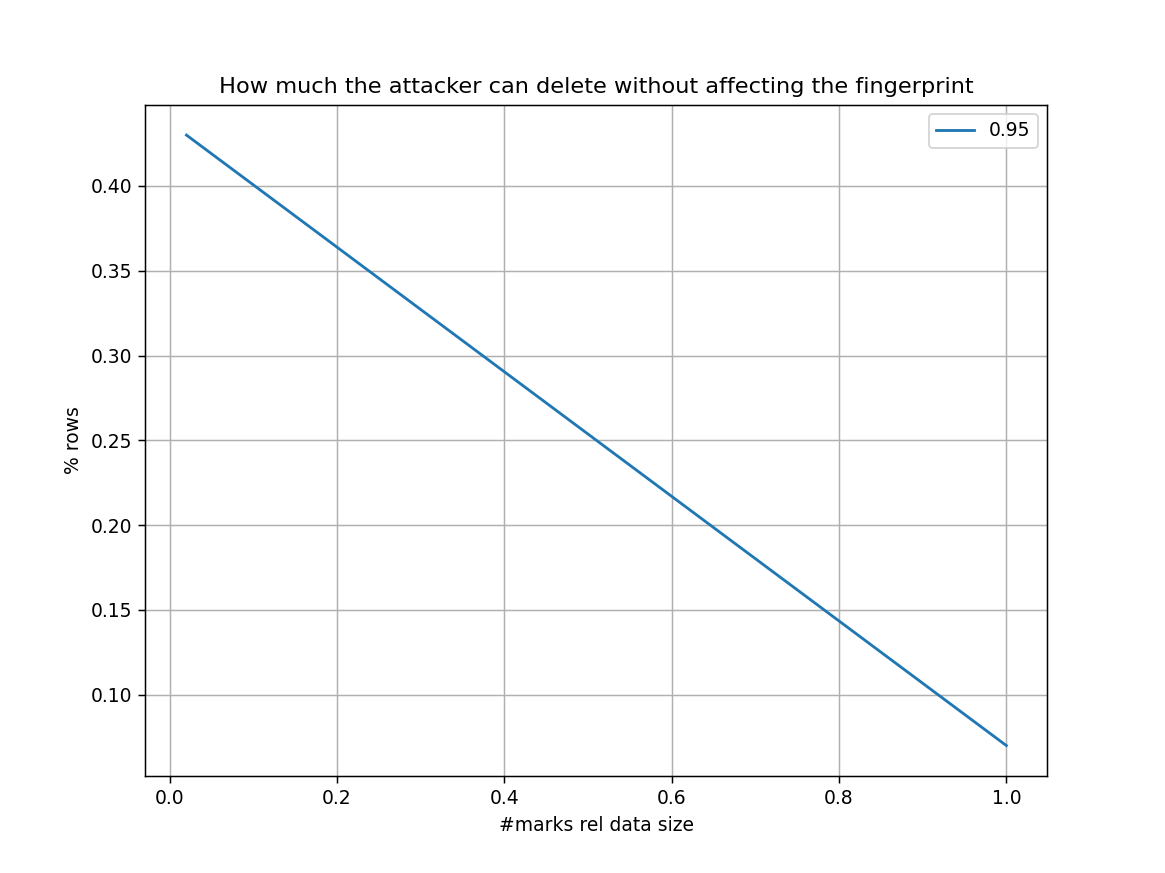

In [10]:
%matplotlib notebook
confidence_rates = [0.95]
n_experiments = 5
for confidence_rate in confidence_rates:
    file_string = 'inverse_robustness_vertical_universal_c{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

In [12]:
resutls

{1: 0.93, 50: 0.57}

## 2. Attack utility decrease

In [15]:
results = {}
attack_granularity = 0.05
n_folds = 5
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
# check if results exist
# ---------------------- #
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # returns estimated utility drop for each attack strength
    attack_utility_knn = attack_utility_knn(Adult().preprocessed(), target, attack, attack_granularity=attack_granularity, 
                                            n_folds=n_folds)


    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(attack_utility_knn, outfile)
else:
    print('Results already exist. Not taking any action.')
# ---------------------- #

Results already exist. Not taking any action.


In [71]:
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    attack_utility_knn = pickle.load(infile)
attack_utility_knn = dict(sorted(attack_utility_knn.items()))

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


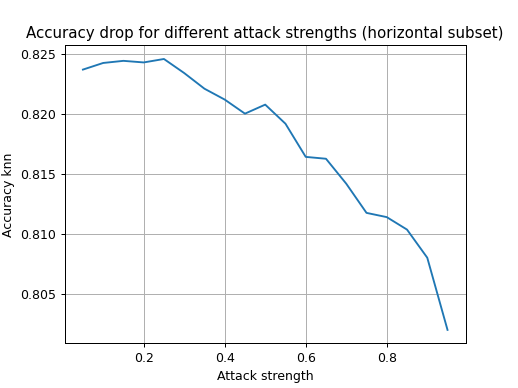

Text(0.5, 1.0, 'Accuracy drop for different attack strengths (horizontal subset)')

In [72]:
%matplotlib
plt.plot(attack_utility_knn.keys(), [np.mean(acc) for acc in attack_utility_knn.values()])
plt.xlabel('Attack strength')
plt.ylabel('Accuracy knn')
plt.title('Accuracy drop for different attack strengths (horizontal subset)')

In [18]:
# original accuracy
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # from how much remaining data can the fingerprint still be extracted?
    original_utility_knn = original_utility_knn(Adult().preprocessed(), target, n_folds=n_folds)

    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(original_utility_knn, outfile)
else:
    print('Results already exist. Not taking any action.')

Results already exist. Not taking any action.


In [19]:
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    original_utility_knn = pickle.load(infile)

In [20]:
#acceptable_utility_drop = 0.01
#utility_preserving_attack_strength = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=acceptable_utility_drop])
# alternative
# attacks that yield at least 1% of accuracy loss
#attacks_1p = max([strength for strength in attack_utility_knn 
#                  if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.01])
# attacks that yield at least 2% of accuracy loss
#attacks_2p = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.02])
#
#attacks_3p = max([strength for strength in attack_utility_knn
#                 if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.03])

In [21]:
#max_utility_drop = np.mean(original_utility_knn) - min(np.mean(acc) for acc in attack_utility_knn.values())

In [75]:
# retruns a list [attack_with_1%_loss, attack_with_2%_loss, ... , max_abs_utility_loss]
att_utility_bounds = attack_utility_bounds(original_utility_knn, attack_utility_knn) 

<IPython.core.display.Javascript object>


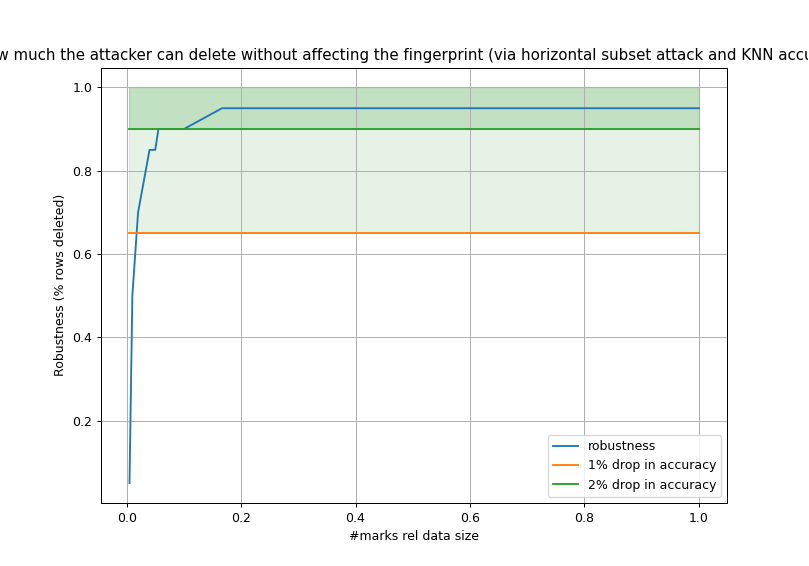

In [76]:
%matplotlib notebook
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)
fig, ax = plt.subplots(figsize=(10, 7))

lines = []
fill = []

lines.append(ax.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], label='robustness'))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], 1.0, color='green', alpha=0.1))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], 1.0, color='green', alpha=0.15))

plt.title('How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN accuracy)')
plt.xlabel('#marks rel data size') 
plt.ylabel('Robustness (% rows deleted)')

legend = plt.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]]
graphs[line_legends[1]] = [lines[1][0], fill[0]]
graphs[line_legends[2]] = [lines[2][0], fill[1]]
   
def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()
    
plt.connect('pick_event', on_pick)
plt.show()

## 3. Utility after fingerprinting

### 3.1. KNN 

In [86]:
#gammae = [1, 3, 6, 12, 25, 50, 100]
fp_utility_results = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results = pickle.load(infile)
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    fp_utility_knn = fingerprint_utility_knn(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results[gamma] = fp_utility_knn
    
fp_utility_results =  dict(sorted(fp_utility_results.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results, outfile)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


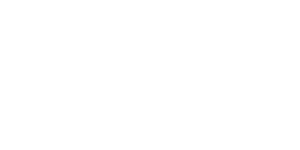

Text(0, 0.5, 'Accuracy knn')

In [87]:
%matplotlib
file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[gamma]]) for gamma in fp_utility_results.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')

### 3.2. Decision Tree

In [88]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_DT = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_DT = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_DT.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_DT.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_dt = fingerprint_utility_dt(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_DT[gamma] = fp_utility_dt
    
fp_utility_results_DT =  dict(sorted(fp_utility_results_DT.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_DT, outfile)

Updating results for gamma=1
Updating results for gamma=2
Updating results for gamma=3
Updating results for gamma=4
Updating results for gamma=5
Updating results for gamma=6
Updating results for gamma=10
Updating results for gamma=12
Updating results for gamma=15
Updating results for gamma=18
Updating results for gamma=20
Updating results for gamma=25
Updating results for gamma=30
Updating results for gamma=50
Updating results for gamma=100
Updating results for gamma=200


<IPython.core.display.Javascript object>


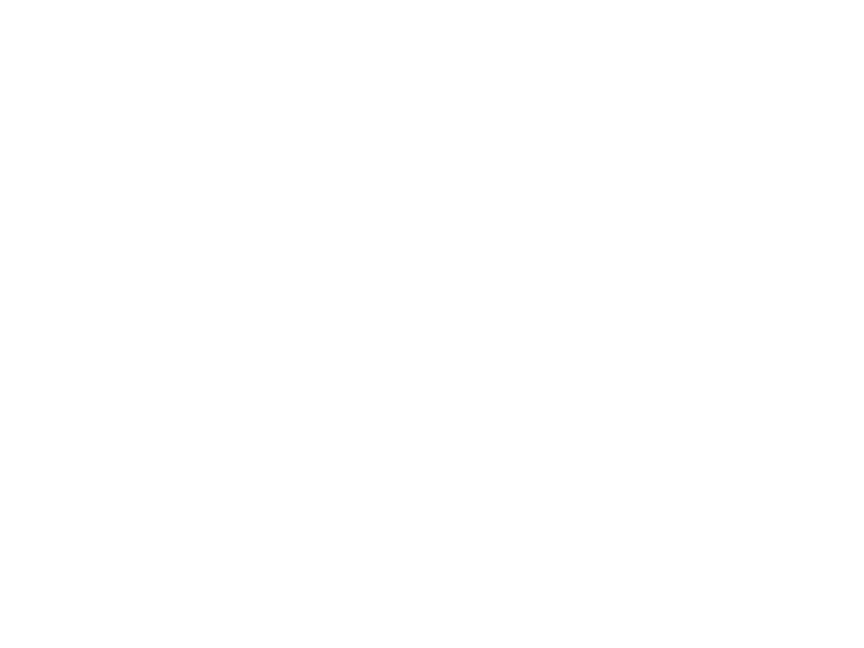

In [89]:
%matplotlib notebook
file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_DT = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_DT.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[gamma]]) for gamma in fp_utility_results_DT.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

### 3.3 Gradient Boosting

In [90]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_GB = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_GB = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_GB.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_GB.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_gb = fingerprint_utility_gb(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_GB[gamma] = fp_utility_gb
    
fp_utility_results_GB =  dict(sorted(fp_utility_results_GB.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_GB, outfile)

Updating results for gamma=1
Updating results for gamma=2
Updating results for gamma=3
Updating results for gamma=4
Updating results for gamma=5
Updating results for gamma=6
Updating results for gamma=10
Updating results for gamma=12
Updating results for gamma=15
Updating results for gamma=18
Updating results for gamma=20
Updating results for gamma=25
Updating results for gamma=30
Updating results for gamma=50
Updating results for gamma=100
Updating results for gamma=200


<IPython.core.display.Javascript object>


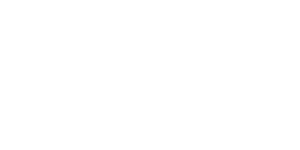

In [91]:
%matplotlib notebook
file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_GB = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_GB.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[gamma]]) for gamma in fp_utility_results_GB.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

## COMBINED RESULTS

In [36]:
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)

In [37]:
# interceptions
x_intercept_0 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[0]]))
x_intercept_1 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[1]]))

<IPython.core.display.Javascript object>


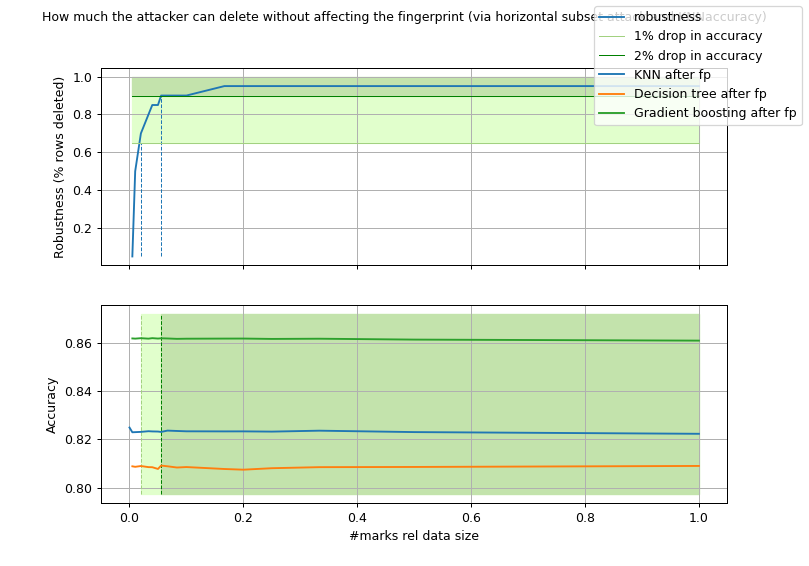

In [98]:
# incorporate in the full analysis
%matplotlib notebook
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7)) # sharey=True

lines = []
fill = []
helpers = []

x_axis = [1.0/g for g in gammae]

# ---------------------------- #
# robustness
# ---------------------------- #
y_robustness = [1 - inv_robustness for inv_robustness in resutls.values()]
lines.append(ax[0].plot(x_axis, y_robustness, label='robustness'))

# --------------------------- #
# utility (start)
# --------------------------- #
y_utility = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[g]])
             for g in fp_utility_results.keys()] + [np.mean(original_utility_knn)]
y_utility_DT = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[g]])
                for g in fp_utility_results_DT.keys()]
y_utility_GB = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[g]])
                for g in fp_utility_results_GB.keys()]
y_utility_all = y_utility + y_utility_DT + y_utility_GB

# --------------------------- #
# attack utility
# --------------------------- #
lw = 0.8
bound_patch = 0.01

lines.append(ax[0].plot(x_axis, [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy', linewidth=lw, 
                        color='#a2d180'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[0] for x in resutls], 1.0, color='#e1ffcc'))
helpers.append(ax[0].vlines(x=x_intercept_0, ymin=min(y_robustness), ymax=att_utility_bounds[0], linewidth=lw, 
                            linestyles='dashed'))
helpers.append(ax[1].vlines(x=x_intercept_0, ymin=min(y_utility_all)-bound_patch, ymax=max(y_utility_all)+bound_patch, 
                            linewidth=lw, linestyles='dashed', color='#a2d180'))
fill.append(ax[1].fill_between([x for x in x_axis if x>=x_intercept_0], min(y_utility_all)-bound_patch,
                               max(y_utility_all)+bound_patch, color='#e1ffcc'))

lines.append(ax[0].plot(x_axis, [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy', linewidth=lw, 
                        color='green'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[1] for x in resutls], 1.0, color='#c3e3ac'))
helpers.append(ax[0].vlines(x=x_intercept_1, ymin=min(y_robustness), ymax=att_utility_bounds[1], linewidth=lw, 
                            linestyles='dashed'))
helpers.append(ax[1].vlines(x=x_intercept_1, ymin=min(y_utility_all)-bound_patch, ymax=max(y_utility_all)+bound_patch, 
                            linewidth=lw, linestyles='dashed', color='green'))
fill.append(ax[1].fill_between([x for x in x_axis if x>=x_intercept_1], min(y_utility_all)-bound_patch,
                               max(y_utility_all)+bound_patch, color='#c3e3ac'))

# todo: mark on the first subplot (ax[0]) when the utility gets way too low; eg. -1%, -2% etc

# ---------------------------- #
# utility
# ---------------------------- #
# KNN
y_utility = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[g]]) 
                                    for g in fp_utility_results.keys()] + [np.mean(original_utility_knn)]
lines.append(ax[1].plot(x_axis+[0.0], y_utility, label='KNN after fp'))
# Decision Tree
lines.append(ax[1].plot(x_axis, y_utility_DT, label='Decision tree after fp'))
# Gradient Boosting
lines.append(ax[1].plot(x_axis, y_utility_GB, label='Gradient boosting after fp'))
ax[1].set_ylabel('Accuracy')
# ---------------------------- #

fig.suptitle('How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN' + 
             'accuracy)', size=10)
plt.xlabel('#marks rel data size') 
ax[0].set_ylabel('Robustness (% rows deleted)')

plt.rcParams['axes.grid'] = True

legend = fig.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]] # -> robustness
graphs[line_legends[1]] = [lines[1][0], fill[0], helpers[0], fill[1], helpers[1]] # -> attack utility 
graphs[line_legends[2]] = [lines[2][0], fill[2], helpers[2], fill[3], helpers[3]]
graphs[line_legends[3]] = [lines[3][0]] # -> utility
graphs[line_legends[4]] = [lines[4][0]]
graphs[line_legends[5]] = [lines[5][0]]

   
def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()
    
plt.connect('pick_event', on_pick)
plt.show()

Robustness plot (above):
- in the dark green area, the utility of the attacker's data is expected to drop at least 2% for the observed attacks, in addition to the increased robustness for that area. This helps determining the lower boundary on what is considered a robust scheme. Therefore, on the one hand, while choosing the number of marks (x axis), the user can say "if the attacker needs to modify at least 50% of data (i.e. robustness=50%), the scheme is robust", or on the other hand "if the attacker loses more than 2% of accuracy by modifying the data, the scheme is considered robust", or a combination of both. 
- the light green area represents where the utility is expected to drop at least 1% due to the attack strength

Utility plot (below):
- the dark and light green areas are transposed to help find the lower boundary of number of marks that the user wants to chose
- users wants to choose the #marks (x axis) with the highest accuracy
- the idea for the alternative plot regarding utility might be to plot relative delta accuracy (real_acc-original_acc)/original_acc -> for each classifier and cumulative